In [362]:
import pandas as pd
import json
import requests
import pickle

In [363]:
from bs4 import BeautifulSoup
import requests

exotic_cocktails_url = 'https://www.pubclub.com/lifestyle/8-exotic-cocktails-from-around-the-world-that-you-must-try-at-your-next-party/'
cocktails_filepath = 'cocktail_recipe_sources/'
exotic_cocktails_filename = '8%20Exotic%20Cocktails%20From%20Around%20The%20World%20That%20You%20Must%20Try%20At%20Your%20Next%20Party.html'
#exotic_cocktails_response = requests.get(exotic_cocktails_url)
#print( exotic_cocktails_response.status_code )
#exotic_cocktails_page = exotic_cocktails_response.text
#soup = BeautifulSoup(exotic_cocktails_page, "lxml")


with open(cocktails_filepath + '8_exotic_cocktail_recipies.html') as fp:
    soup = BeautifulSoup(fp, "lxml")

In [364]:
cocktail_names = soup.find_all('h3', class_='western')
#cocktails = soup.find_all('h4', class_='western')
#for c in cocktails:
cocktail_dict = {}
for c_name in cocktail_names:
    cocktail_name = c_name.text
    #print(cocktail_name)
    c = c_name.find_next_sibling('p').find_next_sibling('h4', class_='western')
    
    if c.text =='Ingredients':
        #print( c )
        ul = c.find_next_sibling('p').find_next_sibling('ul')
        ing_list = ul.find_all('li')
        list_of_ingredients = []
        for ing in ing_list:
            #print( ing )
            list_of_ingredients.append(ing.text.strip())
    cocktail_dict[cocktail_name] = list_of_ingredients    
            
print( cocktail_dict )   

{'1.Rosé All Day Cocktail': ['Bottle Rosé', 'Vodka', 'Blackberries', 'Lime Juice', 'Honey', 'Lime', 'Raspberries', 'Strawberries', 'Ice'], '2.Lychee Martini': ['Ice cubes', 'vodka', 'lychee juice', 'orange bitters', 'lychees', 'lemon juice'], 'Preparation': ['rhubarb stalks', 'frozen raspberries', 'raw sugar cane', 'lemon juice'], '3.Raspberry-Rhubarb Collins Punch': ['rhubarb stalks', 'frozen raspberries', 'raw sugar cane', 'lemon juice'], '4.Turmeric Colada': ['Ice', 'white rum', 'turmeric cordial', 'coconut milk', 'pineapple juice', 'lime juice', 'simple syrup', 'pineapple.'], '5.PINA COLADA': ['Ice', 'white rum', 'dark rum', 'coconut cream', 'double cream or whipping cream', 'pineapple juice', 'Dash of angostura bitters', 'Maraschino cherries', 'Pineapple slices'], '6.Fruity Margarita Punch': ['fruit punch', 'tequila', 'triple sec (Cointreau)', 'lime juice', 'Oranges', 'limes'], '7.Watermelon Lemonade Margarita': ['tequila', 'triple sec', 'Midori', 'watermelon juice', 'lemonade']}


In [365]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

In [366]:
exotic_c_word_list = []

for ct in cocktail_dict:
     exotic_c_word_list.extend( cocktail_dict[ct] )

In [367]:
exotic_c_word_list = [lemmatizer.lemmatize(s.lower()) for s in exotic_c_word_list]
exotic_c_word_list

['bottle rosé',
 'vodka',
 'blackberry',
 'lime juice',
 'honey',
 'lime',
 'raspberry',
 'strawberry',
 'ice',
 'ice cubes',
 'vodka',
 'lychee juice',
 'orange bitters',
 'lychee',
 'lemon juice',
 'rhubarb stalks',
 'frozen raspberries',
 'raw sugar cane',
 'lemon juice',
 'rhubarb stalks',
 'frozen raspberries',
 'raw sugar cane',
 'lemon juice',
 'ice',
 'white rum',
 'turmeric cordial',
 'coconut milk',
 'pineapple juice',
 'lime juice',
 'simple syrup',
 'pineapple.',
 'ice',
 'white rum',
 'dark rum',
 'coconut cream',
 'double cream or whipping cream',
 'pineapple juice',
 'dash of angostura bitters',
 'maraschino cherries',
 'pineapple slices',
 'fruit punch',
 'tequila',
 'triple sec (cointreau)',
 'lime juice',
 'orange',
 'lime',
 'tequila',
 'triple sec',
 'midori',
 'watermelon juice',
 'lemonade']

In [368]:
with open("data/" + "exotic_c_word_list.pickle", 'wb') as to_write:
    pickle.dump(exotic_c_word_list, to_write)

In [369]:
drink_url_stem ='https://www.thecocktaildb.com/api/json/v2/9973533/lookup.php?i='
alcohol_api_url = 'https://www.thecocktaildb.com/api/json/v2/9973533/filter.php?a=Alcoholic'

In [370]:
drink_url_stem ='https://www.thecocktaildb.com/api/json/v2/9973533/lookup.php?i='

def cocktail_list_from_cocktail_db():
    f=alcohol_api_url
    data = requests.get(f)    
    parsed_json = json.loads(data.text)   
    drink_dict_list = []
    
    for i in (parsed_json["drinks"]):
        drink_id = i["idDrink"]
        drink_url = drink_url_stem + drink_id
        r_data = requests.get(drink_url)
        drink_dict = r_data.json()['drinks'][0]
        drink_dict_list.append(drink_dict)
    return( drink_dict_list )

cocktail_db_list = cocktail_list_from_cocktail_db() 
#print( cocktail_db_list )  

with open("data/" + "cocktail_db_list.pickle", 'wb') as to_write:
    pickle.dump(cocktail_db_list, to_write)

In [371]:
with open("data/" + "cocktail_dict.pickle", 'wb') as to_write:
    pickle.dump(cocktail_dict, to_write)

## Read in previously collected data

In [372]:
#import pickle
with open("data/" + "cocktail_db_list.pickle", 'rb') as to_read:
    cocktail_db_list =  pickle.load(to_read)

In [373]:
with open("data/" + "exotic_c_word_list.pickle", 'rb') as to_read:
    exotic_c_word_list =  pickle.load(to_read)


In [374]:
cocktail_db_list

[{'idDrink': '14029',
  'strDrink': "'57 Chevy with a White License Plate",
  'strDrinkAlternate': None,
  'strDrinkES': None,
  'strDrinkDE': None,
  'strDrinkFR': None,
  'strDrinkZH-HANS': None,
  'strDrinkZH-HANT': None,
  'strTags': None,
  'strVideo': None,
  'strCategory': 'Cocktail',
  'strIBA': None,
  'strAlcoholic': 'Alcoholic',
  'strGlass': 'Highball glass',
  'strInstructions': '1. Fill a rocks glass with ice 2.add white creme de cacao and vodka 3.stir',
  'strInstructionsES': None,
  'strInstructionsDE': '1. Füllen Sie ein Rocks Glas mit Eis 2. Geben Sie weiße Creme de Kakao und Wodka hinzu. 3. Umrühren.',
  'strInstructionsFR': None,
  'strInstructionsZH-HANS': None,
  'strInstructionsZH-HANT': None,
  'strDrinkThumb': 'https://www.thecocktaildb.com/images/media/drink/qyyvtu1468878544.jpg',
  'strIngredient1': 'Creme de Cacao',
  'strIngredient2': 'Vodka',
  'strIngredient3': None,
  'strIngredient4': None,
  'strIngredient5': None,
  'strIngredient6': None,
  'strIngre

In [375]:
cocktail_db_df = pd.DataFrame(cocktail_db_list)

In [376]:
cocktail_db_df.columns

Index(['idDrink', 'strDrink', 'strDrinkAlternate', 'strDrinkES', 'strDrinkDE',
       'strDrinkFR', 'strDrinkZH-HANS', 'strDrinkZH-HANT', 'strTags',
       'strVideo', 'strCategory', 'strIBA', 'strAlcoholic', 'strGlass',
       'strInstructions', 'strInstructionsES', 'strInstructionsDE',
       'strInstructionsFR', 'strInstructionsZH-HANS', 'strInstructionsZH-HANT',
       'strDrinkThumb', 'strIngredient1', 'strIngredient2', 'strIngredient3',
       'strIngredient4', 'strIngredient5', 'strIngredient6', 'strIngredient7',
       'strIngredient8', 'strIngredient9', 'strIngredient10',
       'strIngredient11', 'strIngredient12', 'strIngredient13',
       'strIngredient14', 'strIngredient15', 'strMeasure1', 'strMeasure2',
       'strMeasure3', 'strMeasure4', 'strMeasure5', 'strMeasure6',
       'strMeasure7', 'strMeasure8', 'strMeasure9', 'strMeasure10',
       'strMeasure11', 'strMeasure12', 'strMeasure13', 'strMeasure14',
       'strMeasure15', 'strImageSource', 'strImageAttribution',
   

In [377]:
import copy
reordered_cols = copy.deepcopy(cocktail_db_df.columns)
reordered_cols = [cocktail_db_df.columns[1],cocktail_db_df.columns[0]]
reordered_cols.extend(cocktail_db_df.columns[2:])
reordered_cols
cocktail_db_df = cocktail_db_df[reordered_cols]
cocktail_db_df

strDrink idDrink strDrinkAlternate  \
0    '57 Chevy with a White License Plate   14029              None   
1                          1-900-FUK-MEUP   15395              None   
2                        110 in the shade   15423              None   
3                  151 Florida Bushwacker   14588              None   
4                             155 Belmont   15346              None   
..                                    ...     ...               ...   
540                        Zizi Coin-coin   14594              None   
541                                Zoksel   15691              None   
542                                Zombie   17241              None   
543                             Zorbatini   16963              None   
544                                 Zorro   15328              None   

    strDrinkES strDrinkDE strDrinkFR strDrinkZH-HANS strDrinkZH-HANT strTags  \
0         None       None       None            None            None    None   
1         None       None       None            None            None    None   
2         None       None       None            None            None    None   
3         None       None       None            None            None    None   
4         None       None       None            None            None    None   
..         ...        ...        ...             ...             ...     ...   
540       None       None       None            None            None    None   
541       None       None       None            None            None    None   
542       None       None       None            None            None    None   
543       None       None       None            None            None    None   
544       None       None       None            None            None    None   

    strVideo  ... strMeasure10 strMeasure11 strMeasure12 strMeasure13  \
0       None  ...         None         None         None         None   
1       None  ...         None         None         None         None   
2       None  ...         None         None         None         None   
3       None  ...         None         None         None         None   
4       None  ...         None         None         None         None   
..       ...  ...          ...          ...          ...          ...   
540     None  ...         None         None         None         None   
541     None  ...         None         None         None         None   
542     None  ...         None         None         None         None   
543     None  ...         None         None         None         None   
544     None  ...         None         None         None         None   

    strMeasure14 strMeasure15 strImageSource strImageAttribution  \
0           None         None           None                None   
1           None         None           None                None   
2           None         None           None                None   
3           None         None           None                None   
4           None         None           None                None   
..           ...          ...            ...                 ...   
540         None         None           None                None   
541         None         None           None                None   
542         None         None           None                None   
543         None         None           None                None   
544         None         None           None                None   

    strCreativeCommonsConfirmed         dateModified  
0                            No  2016-07-18 22:49:04  
1                            No  2016-07-18 22:27:04  
2                            No  2016-02-03 14:51:57  
3                            No  2016-07-18 22:28:43  
4                            No  2016-10-05 12:36:28  
..                          ...                  ...  
540                          No  2017-01-28 16:25:52  
541                          No  2017-01-28 16:28:50  
542                          N

In [378]:
cocktail_db_df[cocktail_db_df['strDrink'] == '11001']

Empty DataFrame
Columns: [strDrink, idDrink, strDrinkAlternate, strDrinkES, strDrinkDE, strDrinkFR, strDrinkZH-HANS, strDrinkZH-HANT, strTags, strVideo, strCategory, strIBA, strAlcoholic, strGlass, strInstructions, strInstructionsES, strInstructionsDE, strInstructionsFR, strInstructionsZH-HANS, strInstructionsZH-HANT, strDrinkThumb, strIngredient1, strIngredient2, strIngredient3, strIngredient4, strIngredient5, strIngredient6, strIngredient7, strIngredient8, strIngredient9, strIngredient10, strIngredient11, strIngredient12, strIngredient13, strIngredient14, strIngredient15, strMeasure1, strMeasure2, strMeasure3, strMeasure4, strMeasure5, strMeasure6, strMeasure7, strMeasure8, strMeasure9, strMeasure10, strMeasure11, strMeasure12, strMeasure13, strMeasure14, strMeasure15, strImageSource, strImageAttribution, strCreativeCommonsConfirmed, dateModified]
Index: []

[0 rows x 55 columns]

In [379]:
ingr_cols=['strIngredient' + str(i) for i in range(1, 16)]
ct_ing_df = cocktail_db_df[['strDrink', *ingr_cols]]
#ct_ing_df[ct_ing_df.apply(lambda r: r.str.contains('elk', case=False).any(), axis=1)]
ct_ing_df

strDrink  strIngredient1  \
0    '57 Chevy with a White License Plate  Creme de Cacao   
1                          1-900-FUK-MEUP  Absolut Kurant   
2                        110 in the shade           Lager   
3                  151 Florida Bushwacker      Malibu rum   
4                             155 Belmont        Dark rum   
..                                    ...             ...   
540                        Zizi Coin-coin       Cointreau   
541                                Zoksel            Beer   
542                                Zombie             Rum   
543                             Zorbatini           Vodka   
544                                 Zorro         Sambuca   

          strIngredient2              strIngredient3        strIngredient4  \
0                  Vodka                        None                  None   
1          Grand Marnier  Chambord raspberry liqueur  Midori melon liqueur   
2                Tequila                        None                  None   
3              Light rum               151 proof rum   Dark Creme de Cacao   
4              Light rum                       Vodka          Orange juice   
..                   ...                         ...                   ...   
540          Lemon juice                         Ice                 Lemon   
541            Root beer                    Lemonade             Coca-Cola   
542             Gold rum               151 proof rum                Pernod   
543                 Ouzo                        None                  None   
544  Baileys irish cream       White Creme de Menthe                  None   

    strIngredient5   strIngredient6     strIngredient7     strIngredient8  \
0             None             None               None               None   
1       Malibu rum         Amaretto    Cranberry juice    Pineapple juice   
2             None             None               None               None   
3        Cointreau             Milk    Coconut liqueur  Vanilla ice-cream   
4             None             None               None               None   
..             ...              ...                ...                ...   
540           None             None               None               None   
541           7-Up  Creme de Cassis              Lemon               None   
542      Grenadine       Lime Juice  Angostura Bitters               None   
543           None             None               None               None   
544           None             None               None               None   

    strIngredient9 strIngredient10 strIngredient11 strIngredient12  \
0             None            None            None            None   
1             None            None            None            None   
2             None            None            None            None   
3             None            None            None            None   
4             None            None            None            None   
..             ...             ...             ...             ...   
540           None            None            None            None   
541           None            None            None            None   
542           None            None            None            None   
543           None            None            None            None   
544           None            None            None            None   

    strIngredient13 strIngredient14 strIngredient15  
0              None            None            None  
1              None            None            None  
2              None            None            None  
3              None            None            None  
4              None            None            None  
..              ...             ...             ...  
540            None            None            None  
541            None            None            None  
542            None            None            None  
543            None            None            None  
544

In [380]:
cocktail_db_df[cocktail_db_df.apply(lambda r: r.str.contains(' elk ', case=False).any(), axis=1)] 

Empty DataFrame
Columns: [strDrink, idDrink, strDrinkAlternate, strDrinkES, strDrinkDE, strDrinkFR, strDrinkZH-HANS, strDrinkZH-HANT, strTags, strVideo, strCategory, strIBA, strAlcoholic, strGlass, strInstructions, strInstructionsES, strInstructionsDE, strInstructionsFR, strInstructionsZH-HANS, strInstructionsZH-HANT, strDrinkThumb, strIngredient1, strIngredient2, strIngredient3, strIngredient4, strIngredient5, strIngredient6, strIngredient7, strIngredient8, strIngredient9, strIngredient10, strIngredient11, strIngredient12, strIngredient13, strIngredient14, strIngredient15, strMeasure1, strMeasure2, strMeasure3, strMeasure4, strMeasure5, strMeasure6, strMeasure7, strMeasure8, strMeasure9, strMeasure10, strMeasure11, strMeasure12, strMeasure13, strMeasure14, strMeasure15, strImageSource, strImageAttribution, strCreativeCommonsConfirmed, dateModified]
Index: []

[0 rows x 55 columns]

In [381]:
ingredient_columns = ['strIngredient' + str(num) for num in range(1,16)]
cocktail_db_df_melt = cocktail_db_df.melt(id_vars='strDrink', value_vars=ingredient_columns)
cocktail_db_df_melt 

strDrink         variable           value
0     '57 Chevy with a White License Plate   strIngredient1  Creme de Cacao
1                           1-900-FUK-MEUP   strIngredient1  Absolut Kurant
2                         110 in the shade   strIngredient1           Lager
3                   151 Florida Bushwacker   strIngredient1      Malibu rum
4                              155 Belmont   strIngredient1        Dark rum
...                                    ...              ...             ...
8170                        Zizi Coin-coin  strIngredient15            None
8171                                Zoksel  strIngredient15            None
8172                                Zombie  strIngredient15            None
8173                             Zorbatini  strIngredient15            None
8174                                 Zorro  strIngredient15            None

[8175 rows x 3 columns]

In [382]:
cocktail_db_df_melt[cocktail_db_df_melt['value'].str.contains('elk',na=False)]

strDrink        variable      value
876  Kiss me Quick  strIngredient2  Apfelkorn

In [383]:
cocktail_db_df_melt = cocktail_db_df_melt[~pd.isnull(cocktail_db_df_melt['value'])]
cocktail_db_df_melt = cocktail_db_df_melt[cocktail_db_df_melt['value']!='']
cocktail_db_df_melt.drop(['variable'], axis=1).reindex()

strDrink           value
0     '57 Chevy with a White License Plate  Creme de Cacao
1                           1-900-FUK-MEUP  Absolut Kurant
2                         110 in the shade           Lager
3                   151 Florida Bushwacker      Malibu rum
4                              155 Belmont        Dark rum
...                                    ...             ...
4977                      Amaretto Liqueur   Food coloring
4991                      Angelica Liqueur           Water
5522                      Amaretto Liqueur       Glycerine
5536                      Angelica Liqueur   Food coloring
6081                      Angelica Liqueur   Food coloring

[2148 rows x 2 columns]

In [384]:
cocktail_ingredients = cocktail_db_df_melt['value'].value_counts()
cocktail_ingredients_df = pd.DataFrame(cocktail_db_df_melt['value'].value_counts()).reset_index()

In [385]:
cocktail_ingredients_df['in_cocktail'] = True
cocktail_ingredients_df.rename(columns={'index':'name'}, inplace=True)

### Curate the generic word list below

In [386]:
generic_words = list({' and ', ' de ', ' of', ' sour', 'bitters', 'black ', 'blended', 'brown ', 'coloring', \
                       'cordial', 'creme', 'dry','extract', 'flakes', 'flavoring', 'food', 'fresh', \
                       'green', 'juice','leaf', 'leaves', 'light', 'liqueur', 'mix', 'nectar',\
                       ' of ', 'blended', 'peel', 'pink', 'powdered', 'raw', 'red ', 'root', 'sauce', 'seeds', \
                       'sirup', 'soda', 'sour', 'st.', 'sweetened', 'syrup',  ' water', 'whipped', \
                       'whipped', 'white '})

generic_words = [word.lower() for word in generic_words]


In [387]:
generic_words = sorted(generic_words)
generic_words

[' and ',
 ' de ',
 ' of',
 ' of ',
 ' sour',
 ' water',
 'bitters',
 'black ',
 'blended',
 'brown ',
 'coloring',
 'cordial',
 'creme',
 'dry',
 'extract',
 'flakes',
 'flavoring',
 'food',
 'fresh',
 'green',
 'juice',
 'leaf',
 'leaves',
 'light',
 'liqueur',
 'mix',
 'nectar',
 'peel',
 'pink',
 'powdered',
 'raw',
 'red ',
 'root',
 'sauce',
 'seeds',
 'sirup',
 'soda',
 'sour',
 'st.',
 'sweetened',
 'syrup',
 'whipped',
 'white ']

In [388]:
cocktail_ingredients_df

name  value  in_cocktail
0                    Gin    101         True
1                  Vodka     94         True
2                  Sugar     51         True
3           Orange juice     50         True
4                  Lemon     44         True
..                   ...    ...          ...
361  Elderflower cordial      1         True
362        Licorice root      1         True
363     Salted Chocolate      1         True
364      Cranberry vodka      1         True
365          Brown sugar      1         True

[366 rows x 3 columns]

### 1. Write routine to extract generic words out of cocktail ingredients, and puts to lowercase

In [389]:
def remove_words( s, word_list ):
    s=s.lower()
    for word in word_list:
        s = s.replace(word.lower(), '')
    return s

# cleaned_string = remove_words("orange juice", generic_words)
# cleaned_string

In [390]:
exotic_cocktail_ingredients = [remove_words(drink_string, generic_words) for drink_string in exotic_c_word_list]
exotic_cocktail_ingredients

['bottle rosé',
 'vodka',
 'blackberry',
 'lime ',
 'honey',
 'lime',
 'raspberry',
 'stberry',
 'ice',
 'ice cubes',
 'vodka',
 'lychee ',
 'orange ',
 'lychee',
 'lemon ',
 'rhubarb stalks',
 'frozen raspberries',
 ' sugar cane',
 'lemon ',
 'rhubarb stalks',
 'frozen raspberries',
 ' sugar cane',
 'lemon ',
 'ice',
 'rum',
 'turmeric ',
 'coconut milk',
 'pineapple ',
 'lime ',
 'simple ',
 'pineapple.',
 'ice',
 'rum',
 'dark rum',
 'coconut cream',
 'double cream or whipping cream',
 'pineapple ',
 'dash angostura ',
 'maraschino cherries',
 'pineapple slices',
 'fruit punch',
 'tequila',
 'triple sec (cointreau)',
 'lime ',
 'orange',
 'lime',
 'tequila',
 'triple sec',
 'midori',
 'watermelon ',
 'lemonade']

In [391]:
cocktail_ingredients_df['ingredient'] = cocktail_ingredients_df['name'].apply(lambda s: remove_words(s, generic_words))

In [392]:
cocktail_ingredients_df['ingredient'] = cocktail_ingredients_df['ingredient'].str.strip()

In [393]:
cocktail_ingredients_df

name  value  in_cocktail        ingredient
0                    Gin    101         True               gin
1                  Vodka     94         True             vodka
2                  Sugar     51         True             sugar
3           Orange juice     50         True            orange
4                  Lemon     44         True             lemon
..                   ...    ...          ...               ...
361  Elderflower cordial      1         True       elderflower
362        Licorice root      1         True          licorice
363     Salted Chocolate      1         True  salted chocolate
364      Cranberry vodka      1         True   cranberry vodka
365          Brown sugar      1         True             sugar

[366 rows x 4 columns]

In [394]:
cocktail_ingredients_df[cocktail_ingredients_df['ingredient'].str.contains('cherry')]

name  value  in_cocktail         ingredient
26              Cherry     18         True             cherry
36   Maraschino cherry     15         True  maraschino cherry
78       Cherry brandy      6         True      cherry brandy
182  Maraschino Cherry      2         True  maraschino cherry
201     Cherry Heering      2         True     cherry heering
234   Cherry Grenadine      1         True   cherry grenadine
266       Cherry Juice      1         True             cherry
308     Cherry liqueur      1         True             cherry

In [395]:
cocktail_ingredients_df[cocktail_ingredients_df['ingredient'].str.contains('blueberry')]

name  value  in_cocktail          ingredient
257  Blueberry schnapps      1         True  blueberry schnapps

In [396]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

def alt_lemmatizer( string_ ):
    if len( string_ ) > 4:
        return lemmatizer.lemmatize(string_)
    else:
        return string_

#cocktail_ingredients_df['ingredient'] = cocktail_ingredients_df['ingredient'].apply(lambda w: lemmatizer.lemmatize(w))
cocktail_ingredients_df['ingredient'] = cocktail_ingredients_df['ingredient'].apply(alt_lemmatizer)
alt_lemmatizer('roses')

'rose'

In [397]:
cocktail_ingredients_df[cocktail_ingredients_df['ingredient']==' roses']

Empty DataFrame
Columns: [name, value, in_cocktail, ingredient]
Index: []

In [398]:
cocktail_ingredients_df[cocktail_ingredients_df['name']=='Sirup of roses']

name  value  in_cocktail ingredient
324  Sirup of roses      1         True       rose

In [399]:
exotic_cocktail_ingredients_df= pd.DataFrame({'in_cocktail': [True]*len(exotic_cocktail_ingredients),'ingredient': exotic_cocktail_ingredients})

In [400]:
cocktail_ingredients_df = cocktail_ingredients_df.merge(exotic_cocktail_ingredients_df, on=['in_cocktail', 'ingredient'], how='outer')

In [401]:
cocktail_ingredients_df

name  value in_cocktail              ingredient
0      Gin  101.0        True                     gin
1      gin    1.0        True                     gin
2    Vodka   94.0        True                   vodka
3    Vodka   94.0        True                   vodka
4    Sugar   51.0        True                   sugar
..     ...    ...         ...                     ...
406    NaN    NaN        True     maraschino cherries
407    NaN    NaN        True        pineapple slices
408    NaN    NaN        True  triple sec (cointreau)
409    NaN    NaN        True                  midori
410    NaN    NaN        True             watermelon 

[411 rows x 4 columns]

### misc data cleaning

In [402]:
cocktail_ingredients_df[cocktail_ingredients_df['ingredient'].str.contains('turkey')]    

name  value in_cocktail   ingredient
169  Wild Turkey    4.0        True  wild turkey

In [403]:
cocktail_ingredients_df = cocktail_ingredients_df[cocktail_ingredients_df['name'] !='Wild Turkey']

In [404]:
cocktail_ingredients_df.iloc[250:300,:]

name  value in_cocktail           ingredient
251                   Tia maria    2.0        True            tia maria
252         Passion fruit syrup    2.0        True        passion fruit
253         Passion fruit juice    1.0        True        passion fruit
254            Cream of coconut    2.0        True        cream coconut
255                Peach nectar    2.0        True                peach
256               Peach Bitters    2.0        True                peach
257                  Watermelon    2.0        True           watermelon
258                 Fruit punch    2.0        True          fruit punch
259              Cherry Heering    2.0        True       cherry heering
260             Raspberry syrup    2.0        True            raspberry
261           Raspberry Liqueur    1.0        True            raspberry
262              Johnnie Walker    2.0        True       johnnie walker
263              Orange Curacao    2.0        True       orange curacao
264                       Pisco    2.0        True                pisco
265                Bitter lemon    2.0        True         bitter lemon
266                   Applejack    2.0        True            applejack
267                    Jim Beam    2.0        True             jim beam
268                    Iced tea    2.0        True             iced tea
269                    Drambuie    2.0        True             drambuie
270               Angelica root    2.0        True             angelica
271                    Wormwood    2.0        True             wormwood
272                      Passoa    2.0        True               passoa
273            Almond flavoring    1.0        True               almond
274                      Almond    1.0        True               almond
275                Kiwi liqueur    1.0        True                 kiwi
276              blackstrap rum    1.0        True       blackstrap rum
277                 Coconut rum    1.0        True          coconut rum
278                 Olive Brine    1.0        True          olive brine
279                     Raisins    1.0        True               raisin
280                Gold tequila    1.0        True         gold tequila
281            Cherry Grenadine    1.0        True     cherry grenadine
282         Blackcurrant squash    1.0        True  blackcurrant squash
283                Rumple Minze    1.0        True         rumple minze
284                Fennel seeds    1.0        True               fennel
285               Coffee brandy    1.0        True        coffee brandy
286            Red Chili Flakes    1.0        True                chili
287                     Apricot    1.0        True              apricot
288              Apricot Nectar    1.0        True              apricot
289                        Figs    1.0        True                 figs
290           Pomegranate juice    1.0        True          pomegranate
291                      Whisky    1.0        True               whisky
292                 St. Germain    1.0        True              germain
293               Vanilla vodka    1.0        True        vanilla vodka
294                      Fresca    1.0        True               fresca
295        Worcestershire Sauce    1.0        True       worcestershire
296        Worcestershire sauce    1.0        True       worcestershire
297                Jagermeister    1.0        True         jagermeister
298  Roses sweetened lime juice    1.0        True          roses  lime
299                         Ale    1.0        True                  ale
300                   Tropicana    1.0        True            tropicana

In [405]:
lemmatizer.lemmatize('roses')

'rose'

In [406]:
cocktail_ingredients_df.tail(50)

name  value in_cocktail                      ingredient
361       Apple schnapps    1.0        True                  apple schnapps
362             Espresso    1.0        True                        espresso
363         Peach brandy    1.0        True                    peach brandy
364          Oreo cookie    1.0        True                     oreo cookie
365         Coconut milk    1.0        True                    coconut milk
366       Absolut Peppar    1.0        True                  absolut peppar
367               Kummel    1.0        True                          kummel
368               Lillet    1.0        True                          lillet
369              Curacao    1.0        True                         curacao
370      Raspberry vodka    1.0        True                 raspberry vodka
371            Soy Sauce    1.0        True                             soy
372             Falernum    1.0        True                        falernum
373          Lemon vodka    1.0        True                     lemon vodka
374           Yukon Jack    1.0        True                      yukon jack
375               Ricard    1.0        True                          ricard
376         Sarsaparilla    1.0        True                    sarsaparilla
377  Elderflower cordial    1.0        True                     elderflower
378        Licorice root    1.0        True                        licorice
379     Salted Chocolate    1.0        True                salted chocolate
380      Cranberry vodka    1.0        True                 cranberry vodka
381                  NaN    NaN        True                     bottle rosé
382                  NaN    NaN        True                           lime 
383                  NaN    NaN        True                           lime 
384                  NaN    NaN        True                           lime 
385                  NaN    NaN        True                       ice cubes
386                  NaN    NaN        True                         lychee 
387                  NaN    NaN        True                         orange 
388                  NaN    NaN        True                          lychee
389                  NaN    NaN        True                          lemon 
390                  NaN    NaN        True                          lemon 
391                  NaN    NaN        True                          lemon 
392                  NaN    NaN        True                  rhubarb stalks
393                  NaN    NaN        True                  rhubarb stalks
394                  NaN    NaN        True              frozen raspberries
395                  NaN    NaN        True              frozen raspberries
396                  NaN    NaN        True                      sugar cane
397                  NaN    NaN        True                      sugar cane
398                  NaN    NaN        True                       turmeric 
399                  NaN    NaN        True                      pineapple 
400                  NaN    NaN        True                      pineapple 
401                  NaN    NaN        True                         simple 
402                  NaN    NaN        True                      pineapple.
403                  NaN    NaN        True                   coconut cream
404                  NaN    NaN        True  double cream or whipping cream
405                  NaN    NaN        True                 dash angostura 
406                  NaN    NaN        True             maraschino cherries
407                  NaN    NaN        True                pineapple slices
408                  NaN    NaN        True          triple sec (cointreau)
409                  NaN    NaN        True                          midori
410                  NaN    NaN        True                     watermelon

In [407]:
cocktail_ingredients_df.loc[cocktail_ingredients_df['ingredient']=='', 'ingredient'] = cocktail_ingredients_df['name'].str.lower()

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [408]:
cocktail_ingredients_df.sort_values(by='ingredient', inplace=True)
cocktail_ingredients_df

<ipython-input-408-ebc28a40c319>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocktail_ingredients_df.sort_values(by='ingredient', inplace=True)


name  value in_cocktail         ingredient
396                   NaN    NaN        True         sugar cane
397                   NaN    NaN        True         sugar cane
90          151 proof rum   15.0        True      151 proof rum
143                  7-Up    6.0        True               7-up
144                  7-up    1.0        True               7-up
..                    ...    ...         ...                ...
296  Worcestershire sauce    1.0        True     worcestershire
271              Wormwood    2.0        True           wormwood
246     Yellow Chartreuse    2.0        True  yellow chartreuse
374            Yukon Jack    1.0        True         yukon jack
230                  Zima    2.0        True               zima

[410 rows x 4 columns]

In [409]:

cocktail_ingredients_df=cocktail_ingredients_df.loc[cocktail_ingredients_df['ingredient'].shift() != cocktail_ingredients_df['ingredient']]
cocktail_ingredients_df.iloc[250:300, :]


name  value in_cocktail              ingredient
73               Sour mix    9.0        True                sour mix
123      Southern Comfort    8.0        True        southern comfort
371             Soy Sauce    1.0        True                     soy
211            Spiced rum    3.0        True              spiced rum
147                Sprite    6.0        True                  sprite
141          Strawberries    6.0        True               stberries
224    Strawberry liqueur    2.0        True                 stberry
189   Strawberry schnapps    3.0        True        stberry schnapps
7             Sugar syrup    6.0        True                   sugar
204                 Surge    3.0        True                   surge
98         Sweet and Sour    2.0        True                   sweet
59         Sweet Vermouth   25.0        True          sweet vermouth
152         Tabasco sauce    5.0        True                 tabasco
172                   Tea    4.0        True                     tea
312     Tennessee whiskey    1.0        True       tennessee whiskey
56                Tequila   28.0        True                 tequila
326                 Thyme    1.0        True                   thyme
251             Tia maria    2.0        True               tia maria
227          Tomato juice    2.0        True                  tomato
153           Tonic water    5.0        True                   tonic
39             Triple sec   36.0        True              triple sec
408                   NaN    NaN        True  triple sec (cointreau)
300             Tropicana    1.0        True               tropicana
398                   NaN    NaN        True               turmeric 
176       Vanilla extract    4.0        True                 vanilla
158     Vanilla Ice-Cream    2.0        True       vanilla ice-cream
293         Vanilla vodka    1.0        True           vanilla vodka
58               Vermouth    3.0        True                vermouth
3                   Vodka   94.0        True                   vodka
60                  Water   24.0        True                   water
257            Watermelon    2.0        True              watermelon
410                   NaN    NaN        True             watermelon 
128       Blended whiskey    8.0        True                 whiskey
291                Whisky    1.0        True                  whisky
114                  Wine    5.0        True                    wine
295  Worcestershire Sauce    1.0        True          worcestershire
271              Wormwood    2.0        True                wormwood
246     Yellow Chartreuse    2.0        True       yellow chartreuse
374            Yukon Jack    1.0        True              yukon jack
230                  Zima    2.0        True                    zima

In [410]:
cocktail_ingredients_df.to_csv('cocktail_ingredients.csv')

### Load food dataframe 

In [411]:


foods_df = pd.read_csv('food_sources/foodb_2020_04_07_csv/Food.csv')
foods_df['name']=foods_df['name'].str.lower()
foods_df.head()

id           name                 name_scientific  \
0   1       angelica                Angelica keiskei   
1   2  savoy cabbage  Brassica oleracea var. sabauda   
2   3  silver linden                  Tilia argentea   
3   4           kiwi             Actinidia chinensis   
4   5         allium                          Allium   

                                         description   itis_id  \
0  Angelica is a genus of about 60 species of tal...       NaN   
1  Savoy cabbage (Brassica oleracea convar. capit...       NaN   
2  Tilia tomentosa (Silver Lime in the UK and Sil...  845789.0   
3  The kiwifruit, often shortened to kiwi in many...  506775.0   
4  Allium haematochiton is a species of wild onio...   42634.0   

           wikipedia_id picture_file_name picture_content_type  \
0              Angelica             1.jpg           image/jpeg   
1         Savoy cabbage             2.jpg           image/jpeg   
2       Tilia tomentosa             3.jpg           image/jpeg   
3             Kiwifruit             4.jpg           image/jpeg   
4  Allium haematochiton             5.jpg           image/jpeg   

   picture_file_size       picture_updated_at  ...  food_type  \
0           111325.0  2012-04-20 09:29:57 UTC  ...     Type 1   
1           155178.0  2012-04-20 09:39:54 UTC  ...     Type 1   
2            56367.0  2012-04-20 09:41:25 UTC  ...     Type 1   
3           110661.0  2012-04-20 09:32:21 UTC  ...     Type 1   
4           341911.0  2012-04-20 09:37:44 UTC  ...     Type 1   

                created_at               updated_at creator_id updater_id  \
0  2011-02-09 00:37:14 UTC  2019-05-14 18:04:13 UTC        NaN        2.0   
1  2011-02-09 00:37:15 UTC  2019-05-14 18:04:13 UTC        NaN        NaN   
2  2011-02-09 00:37:15 UTC  2019-05-17 16:19:45 UTC        NaN        NaN   
3  2011-02-09 00:37:15 UTC  2019-05-14 18:04:13 UTC        NaN        NaN   
4  2011-02-09 00:37:15 UTC  2019-05-14 18:04:13 UTC        NaN        NaN   

  export_to_afcdb  category  ncbi_taxonomy_id  export_to_foodb  public_id  
0           False  specific          357850.0             True  FOOD00001  
1           False  specific         1216010.0             True  FOOD00002  
2           False  specific               NaN             True  FOOD00003  
3           False  specific            3625.0             True  FOOD00004  
4           False  specific            4678.0             True  FOOD00005  

[5 rows x 23 columns]

### 2. As done with cocktail ingredients, write a routine that streamlines the names of foods in the foods dataframe 

Other than converting to lowercase, this is probably not necessary

In [412]:
foods_df['name']=foods_df['name'].str.lower()
foods_df.sample(50)

id                           name                  name_scientific  \
382   388          pacific jack mackerel            Trachurus symmetricus   
25     26                         borage               Borago officinalis   
325   331                      cherimoya                 Annona cherimola   
984  1017                       hawthorn                        Crataegus   
134   135                           date              Phoenix dactylifera   
213   214                       celeriac   Apium graveolens var. rapaceum   
79     80              tartary buckwheat              Fagopyrum tataricum   
917   950                    sour orange               Citrus × aurantium   
850   881                        cabbage  Brassica oleracea var. capitata   
486   498                      swordfish                  Xiphias gladius   
928   961                         crosne                  Stachys affinis   
671   694  unclassified food or beverage                              NaN   
769   795                       cold cut                              NaN   
394   400                 leather chiton               Katharina tunicata   
443   454                  rainbow trout              Oncorhynchus mykiss   
20     21                      asparagus            Asparagus officinalis   
123   124                 common oregano                 Origanum vulgare   
184   185              small-leaf linden                    Tilia cordata   
784   810                 ice cream cone                              NaN   
326   332                        chervil            Anthriscus cerefolium   
583   598                 clawed lobster                      Nephropidae   
901   934                 asparagus fern               Asparagus setaceus   
841   871                 condensed milk                              NaN   
669   692                           soup                              NaN   
716   742                       egg roll                              NaN   
352   358                   mallard duck               Anas platyrhynchos   
509   521                         yautia         Xanthosoma sagittifolium   
899   932            asparagus racemosus              Asparagus racemosus   
81     82                         fennel               Foeniculum vulgare   
903   936   tropical highland blackberry               Rubus adenotrichos   
713   738                 dulce de leche                              NaN   
250   251                      komatsuna    Brassica rapa var. perviridis   
953   986              whole wheat bread                              NaN   
764   790            other fruit product                              NaN   
605   620                        thistle                          Cirsium   
714   739                        topping                              NaN   
57     58                         coffee                           Coffea   
276   278                 fortified wine                              NaN   
96     97                      sweet bay                   Laurus nobilis   
507   519                            yam                        Dioscorea   
946   979                     sesame oil                              NaN   
275   277                         spirit                              NaN   
391   397                  king mackerel            Scomberomorus cavalla   
427   436         pepper (c. frutescens)      Capsicum annuum var. annuum   
144   145                   sweet cherry                     Prunus avium   
80     81                            fig                     Ficus carica   
919   952                      rosé wine                              NaN   
236   237                    swiss chard         Beta vulgaris ssp. cicla   
155   156                     redcurrant                     Ribes rubrum   
729   755                        lasagna                              NaN   

                                           description   itis_id  \
382  The Pa

In [413]:
foods_df.shape

(992, 23)

In [414]:
foods_df.sort_values('id').head(50)

id              name                    name_scientific  \
0    1          angelica                   Angelica keiskei   
1    2     savoy cabbage     Brassica oleracea var. sabauda   
2    3     silver linden                     Tilia argentea   
3    4              kiwi                Actinidia chinensis   
4    5            allium                             Allium   
5    6      garden onion                        Allium cepa   
6    7              leek                      Allium porrum   
7    8            garlic                     Allium sativum   
8    9            chives               Allium schoenoprasum   
9   10     lemon verbena                  Aloysia triphylla   
10  11        cashew nut             Anacardium occidentale   
11  12         pineapple                     Ananas comosus   
12  13              dill                 Anethum graveolens   
13  14     custard apple                  Annona reticulata   
14  15       wild celery                   Apium graveolens   
15  16            peanut                   Arachis hypogaea   
16  17           burdock                      Arctium lappa   
17  18       horseradish                Armoracia rusticana   
18  19          tarragon              Artemisia dracunculus   
19  20           mugwort                 Artemisia vulgaris   
20  21         asparagus              Asparagus officinalis   
21  22               oat                       Avena sativa   
22  23        star fruit                 Averrhoa carambola   
23  24        brazil nut               Bertholletia excelsa   
24  25       common beet                      Beta vulgaris   
25  26            borage                 Borago officinalis   
26  27   chinese mustard                    Brassica juncea   
27  28             swede                     Brassica napus   
28  29              rape          Brassica napus var. napus   
29  30    common cabbage                  Brassica oleracea   
30  31       cauliflower    Brassica oleracea var. botrytis   
31  32   brussel sprouts   Brassica oleracea var. gemmifera   
32  33          kohlrabi  Brassica oleracea var. gongylodes   
33  34          broccoli     Brassica oleracea var. italica   
34  35   chinese cabbage                      Brassica rapa   
35  36            turnip            Brassica rapa var. rapa   
36  37        pigeon pea                      Cajanus cajan   
37  38               tea                  Camellia sinensis   
38  39            capers                   Capparis spinosa   
39  40            pepper                    Capsicum annuum   
40  41            papaya                      Carica papaya   
41  42         safflower               Carthamus tinctorius   
42  43           caraway                        Carum carvi   
43  44         pecan nut                Carya illinoinensis   
44  45          chestnut                           Castanea   
45  46    roman camomile                 Chamaemelum nobile   
46  47          chickpea                    Cicer arietinum   
47  48            endive                  Cichorium endivia   
48  49           chicory                  Cichorium intybus   
49  50  chinese cinnamon              Cinnamomum aromaticum   

                                          description   itis_id  \
0   Angelica is a genus of about 60 species of tal...       NaN   
1   Savoy cabbage (Brassica oleracea convar. capit...       NaN   
2   Tilia tomentosa (Silver Lime in the UK and Sil...  845789.0   
3   The kiwifruit, often shortened to kiwi in many...  506775.0   
4   Allium haematochiton is a species of wild onio...   42634.0   
5   The onion (Allium cepa) (Latin 'cepa' = onion)...   42720.0   
6   The leek is a vegetable that belongs, along wi...   42659.0   
7   With a history of human use of over 7,000 year...   42652.0   
8   Chives is the common name of Allium schoenopra...   42636.0   
9   Aloysia citrodora is a species of flowering pl...   32135.0   
10  The cashew, or caju, is a small tree native to...

### Merge with the 8K-column food table

In [415]:
with open("data/" + "foods_recomb_df.pickle", 'rb') as to_read:
    foods_recomb_df =  pickle.load(to_read)

In [416]:
foods_recomb_df.head()

orig_food_common_name  (E)-2-HEPTENAL_in_Calyx  \
food_id                                                     
1                angelica, fresh                      NaN   
2             savoy cabbage, raw                      NaN   
3           silver linden, dried                      NaN   
4               kiwi, pure juice                      NaN   
5        onions, yellow, sauteed                      NaN   

         (E)-2-HEXENAL_in_Calyx  (Z)-3-HEXENOL_in_Calyx  1,4-CINEOLE_in_Calyx  \
food_id                                                                         
1                           NaN                     NaN                   NaN   
2                           NaN                     NaN                   NaN   
3                           NaN                     NaN                   NaN   
4                           NaN                     NaN                   NaN   
5                           NaN                     NaN                   NaN   

         1,8-CINEOLE_in_Calyx  1-HEXANOL_in_Calyx  \
food_id                                             
1                         NaN                 NaN   
2                         NaN                 NaN   
3                         NaN                 NaN   
4                         NaN                 NaN   
5                         NaN                 NaN   

         2,2-DIMETHYL-HEXANAL_in_Calyx  2-ETHYL-FURAN_in_Calyx  \
food_id                                                          
1                                  NaN                     NaN   
2                                  NaN                     NaN   
3                                  NaN                     NaN   
4                                  NaN                     NaN   
5                                  NaN                     NaN   

         2-PENTYL-FURAN_in_Calyx  ...  VIT-E_in_Sprout Seedling  \
food_id                           ...                             
1                            NaN  ...                       NaN   
2                            NaN  ...                       NaN   
3                            NaN  ...                       NaN   
4                            NaN  ...                       NaN   
5                            NaN  ...                       NaN   

         ALLANTOIC-ACID_in_Sprout Seedling  \
food_id                                      
1                                      NaN   
2                                      NaN   
3                                      NaN   
4                                      NaN   
5                                      NaN   

         HOMOGENTISINIC-ACID_in_Sprout Seedling  PIPECOLIC-ACID_in_Stem  \
food_id                                                                   
1                                           NaN                     NaN   
2                                           NaN                     NaN   
3                                           NaN                     NaN   
4                                           NaN                     NaN   
5                                           NaN                     NaN   

         NEOGLUCOBRASSICIN_in_Seed  TETRACOSANOIC-ACID_in_Seed Oil  \
food_id                                                              
1                              NaN                             NaN   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                              NaN                             NaN   
5                              NaN                             NaN   

         DIOSCIN_in_Root  ADENINE_in_Tuber  PHYTIN_in_Tuber  SUGARS_in_Tuber  
food_id                                                                       
1                    NaN               NaN              NaN              NaN  
2                    NaN               NaN              NaN              NaN  
3                    NaN               NaN            

In [417]:
foods_recomb_df.shape

(907, 15598)

In [418]:
foods_df = pd.merge(foods_df, foods_recomb_df, left_on='id', right_on='food_id', how='outer')

In [419]:
foods_df.shape

(997, 15621)

In [420]:
foods_df.sort_values('food_group').tail(50).iloc[:, :60]

id                      name  \
852   883.0                 mushrooms   
153   154.0            garden rhubarb   
854   885.0   onion-family vegetables   
94     95.0                   lettuce   
232   233.0         pepper (capsicum)   
876   909.0         green bell pepper   
878   911.0        orange bell pepper   
436   445.0         american pokeweed   
899   932.0       asparagus racemosus   
438   448.0            prairie turnip   
331   337.0    chinese water chestnut   
456   467.0            common salsify   
76     77.0       rocket salad (ssp.)   
332   338.0     garland chrysanthemum   
468   479.0           sesbania flower   
225   226.0       garden onion (var.)   
230   231.0      pepper (c. baccatum)   
70     71.0           globe artichoke   
670   693.0   other vegetable product   
487   499.0                      taro   
490   502.0      mexican groundcherry   
71     72.0               wild carrot   
90     91.0             swamp cabbage   
895   928.0         albizia gummifera   
894   927.0        juniperus communis   
879   912.0           red bell pepper   
880   913.0  italian sweet red pepper   
730   756.0         morchella (morel)   
796   823.0                 tree fern   
339   345.0                corn salad   
213   214.0                  celeriac   
91     92.0              sweet potato   
886   919.0             white cabbage   
887   920.0           romaine lettuce   
415   423.0                     nopal   
419   427.0                      okra   
427   436.0    pepper (c. frutescens)   
214   215.0             celery stalks   
892   925.0   castanospermum australe   
893   926.0            gentiana lutea   
877   910.0        yellow bell pepper   
289   291.0                 arrowroot   
989  1022.0                  fish oil   
990  1023.0                taco shell   
991  1024.0             tostada shell   
992     NaN                       NaN   
993     NaN                       NaN   
994     NaN                       NaN   
995     NaN                       NaN   
996     NaN                       NaN   

                                       name_scientific  \
852                                                NaN   
153                                  Rheum rhabarbarum   
854                                                NaN   
94                                      Lactuca sativa   
232                                           Capsicum   
876                                    Capsicum annuum   
878                                    Capsicum annuum   
436                               Phytolacca americana   
899                                Asparagus racemosus   
438                              Pediomelum esculentum   
331                                  Eleocharis dulcis   
456                             Tragopogon porrifolius   
76                         Eruca vesicaria ssp. sativa   
332                           Chrysanthemum coronarium   
468                                 Sesbania bispinosa   
225                              Allium cepa var. cepa   
230                    Capsicum baccatum var. baccatum   
70                                     Cynara scolymus   
670                                                NaN   
487                                Colocasia esculenta   
490             Physalis philadelphica var. immaculata   
71                                       Daucus carota   
90                                    Ipomoea aquatica   
895                                  Albizia gummifera   
894                                 Juniperus communis   
879                                    Capsicum annuum   
880                                    Capsicum annuum   
730                                      Morchellaceae   
796                                            Cyathea   
339                               Valerianella locusta   
213                     Apium graveolens var. rapaceum   
91                                     Ipomoea batatas   
886

In [421]:
foods_df = foods_df[foods_df['id'].notnull()]
#foods_df

### 3. Write a function that can check if any of the words in a string are in the pared down cocktail ingredients word list. It should also mark in the cocktail ingredient ingredients dataframe whether an ingredient is found to match the other dataframe

#### With a better fuzzy word matching algorithm, the following food-item categories would be matched as cocktail ingredients

For now we'll simply link to them if they are included in the food-item

In [422]:
contain_list = ['cinnamon', 'coffee', 'cocoa', 'cow milk',  'milk (cow)', 'liquor', 'blueberry']	

In [423]:
ing_list = ['citrus', 'cloves', 'cocktail', 'common grape', 'eggs', 'grape', 'fruit juice', 'fruit-flavor drink', \
            'fruits', 'garden tomato (var.)', ' horchata', 'horseradish', 'ice cream', 'lichee', \
            'mandarin orange (clementine, tangerine)', 'mango', 'mentha', 'milk (cow)', 'pepper (spice)', \
            'rose hip', 'sake', 'soft drink', 'star anise', 'star fruit', 'strawberry', 'syrup']

In [424]:
exclude_list = ['corn', 'rye', 'sour cream','elk','pea','common pea']

In [425]:
from fuzzywuzzy import fuzz
#def fuzzy_matches()

def is_ingredient( food_item ):
    ## 'corn' and 'rye' arrive here only because 'syrup' and 'whiskey' were systematically removed from 
    ## all ingredient strings at an earlier stage. Additionally 'sour' would below be removed from 'sour cream'
    ## creating another false match. The following 'if' statement avoids all these.
    #if ((food_item == 'corn') | (food_item == 'rye') | (food_item == 'sour cream')|(food_item == 'red rice')):
    if any(s == food_item for s in exclude_list):    
        return False
    
    colors = ['red ', 'black ', 'pink ', 'blue ', 'white ' ]
    for c in colors:
        food_item=food_item.replace(c, '')
    qualifiers  = ['sweet ', 'sour ', 'bitter ']
    for q in qualifiers:
        food_item=food_item.replace(q, '')

    
    
    found = False
    #if (cocktail_ingredients_df['ingredient']).str.eq(food_item).any():
    #if (lemmatizer.lemmatize(cocktail_ingredients_df['ingredient'].str).eq(lemmatizer.lemmatize(food_item)).any()):
    if (cocktail_ingredients_df['ingredient']==food_item).any():
        found = True
    #elif ('cocktail_ingredients_df['ingredient']).str.contains(' ' + food_item).any():
    elif (cocktail_ingredients_df['ingredient']).str.contains(' ' + food_item).any():
        found = True
    elif ('common ' + cocktail_ingredients_df['ingredient']).str.contains(food_item).any():
        found = True
    elif ('garden ' + cocktail_ingredients_df['ingredient']).str.contains(food_item).any():
        found = True
    elif (cocktail_ingredients_df['ingredient']).str.contains(food_item + ' ').any():
        found = True
    elif (cocktail_ingredients_df['ingredient']).str.startswith(food_item).any():
        found = True
    elif (fuzz.ratio(food_item, (cocktail_ingredients_df['ingredient']).any()) > 60):
        found = True
    elif any(s in food_item for s in contain_list):
        found = True
    elif any(s == food_item for s in ing_list):
        found = True
    
#   elif fuzz.ratio(cocktail_ingredients_df['ingredient']).str.any(), food_item) > 90)
#   elif cocktail_ingredients_df['ingredient'].any() in food_item:
#         found = True                  
    return found

#is_ingredient(foods_df.iloc[11, :]['name'])
#is_ingredient('passion fruit')

In [426]:
is_ingredient('common thyme')

True

In [427]:
#def is_wikipedia_id( wikipedia_id ):
#    if(type(wikipedia_id) is float ):
#        return False
#    #print(type(food_group))
#    #print(food_group.split())
#    elif (cocktail_ingredients_df['ingredient'].isin(wikipedia_id.replace('_', ' ').split()).any()):
#        return True
#    #return False

## 4. Apply this function to populate a new `in_cocktail` column in the foods dataframe

In [428]:
foods_df['in_some_cocktail'] = foods_df['name'].apply(is_ingredient)

#foods_df['in_some_cocktail'] = foods_df['name'].apply(lambda name_string: is_ingredient(name_string))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [429]:
foods_df[foods_df['in_some_cocktail']==True]

id             name      name_scientific  \
0       1.0         angelica     Angelica keiskei   
3       4.0             kiwi  Actinidia chinensis   
11     12.0        pineapple       Ananas comosus   
17     18.0      horseradish  Armoracia rusticana   
22     23.0       star fruit   Averrhoa carambola   
..      ...              ...                  ...   
924   957.0          red tea                  NaN   
925   958.0  white champagne                  NaN   
937   970.0     coconut milk                  NaN   
964   997.0        red grape                  NaN   
967  1000.0     black raisin                  NaN   

                                           description   itis_id  \
0    Angelica is a genus of about 60 species of tal...       NaN   
3    The kiwifruit, often shortened to kiwi in many...  506775.0   
11   The Pineapple (Ananas comosus), named for its ...   42335.0   
17   Horseradish (Armoracia rusticana, syn. Cochlea...   23044.0   
22   Averrhoa carambola is a species of woody plant...  506371.0   
..                                                 ...       ...   
924  Rooibos tea is also known as red tea or red bu...       NaN   
925  The white champagne is produced from grape jui...       NaN   
937  Coconut milk is an opaque, milky-white liquid ...       NaN   
964  Red seedless grapes are small to medium in siz...       NaN   
967  Black raisins are made by drying out black Cor...       NaN   

           wikipedia_id picture_file_name picture_content_type  \
0              Angelica             1.jpg           image/jpeg   
3             Kiwifruit             4.jpg           image/jpeg   
11            Pineapple            12.jpg           image/jpeg   
17          Horseradish            18.jpg           image/jpeg   
22   Averrhoa carambola            23.jpg           image/jpeg   
..                  ...               ...                  ...   
924                 NaN               NaN                  NaN   
925                 NaN               NaN                  NaN   
937                 NaN               NaN                  NaN   
964                 NaN               NaN                  NaN   
967                 NaN               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
0             111325.0  2012-04-20 09:29:57 UTC  ...   
3             110661.0  2012-04-20 09:32:21 UTC  ...   
11             46902.0  2012-04-20 09:38:46 UTC  ...   
17            133514.0  2012-04-20 09:33:47 UTC  ...   
22             69876.0  2012-04-20 09:29:11 UTC  ...   
..                 ...                      ...  ...   
924                NaN                      NaN  ...   
925                NaN                      NaN  ...   
937                NaN                      NaN  ...   
964                NaN                      NaN  ...   
967                NaN                      NaN  ...   

     ALLANTOIC-ACID_in_Sprout Seedling HOMOGENTISINIC-ACID_in_Sprout Seedling  \
0                                  NaN                                    NaN   
3                                  NaN                                    NaN   
11                                 NaN                                    NaN   
17                                 NaN                                    NaN   
22                                 NaN                                    NaN   
..                                 ...                                    ...   
924                                NaN                                    NaN   
925                                NaN                                    NaN   
937                                NaN                                    NaN   
964                                NaN                                    NaN   
967                                NaN                                    NaN   

    PIPECOLIC-ACID_in_Stem NEOGLUCOBRASSICIN_in_Seed  \
0                      NaN                       NaN   
3   

In [430]:
non_cocktail_foods = foods_df[foods_df['in_some_cocktail']==False]
non_cocktail_foods.sample(50)

id                name                    name_scientific  \
218   219.0             ginseng                              Panax   
588   603.0      norway lobster                Nephrops norvegicus   
514   526.0  gadus (common cod)                              Gadus   
949   982.0      cottage cheese                                NaN   
912   945.0        rapeseed oil                                NaN   
264   265.0    sweet rowanberry        Grataegosorbus mitschurinii   
811   840.0           cornbread                                NaN   
380   386.0       hyacinth bean                   Lablab purpureus   
945   978.0       grapeseed oil                                NaN   
566   581.0        blue whiting           Micromesistius poutassou   
807   836.0         wheat bread                                NaN   
394   400.0      leather chiton                 Katharina tunicata   
960   993.0         white onion                                NaN   
839   869.0               fudge                                NaN   
352   358.0        mallard duck                 Anas platyrhynchos   
242   243.0             shallot                 Allium ascalonicum   
292   294.0   atlantic mackerel                   Scomber scombrus   
261   262.0        black radish        Raphanus sativus var. niger   
726   752.0             falafel                                NaN   
713   738.0      dulce de leche                                NaN   
222   223.0     red huckleberry              Vaccinium parvifolium   
850   881.0             cabbage    Brassica oleracea var. capitata   
752   778.0      egg substitute                                NaN   
174   175.0              potato                  Solanum tuberosum   
318   323.0             cardoon                 Cynara cardunculus   
38     39.0              capers                   Capparis spinosa   
160   161.0          cloudberry                  Rubus chamaemorus   
963   996.0         green grape                                NaN   
165   166.0    black elderberry                     Sambucus nigra   
412   420.0       white mustard                       Sinapis alba   
282   284.0       winter squash                   Cucurbita maxima   
805   834.0          piki bread                                NaN   
442   453.0       rainbow smelt                     Osmerus mordax   
593   608.0           persimmon                          Diospyros   
596   611.0      rock ptarmigan                       Lagopus muta   
638   657.0    other snack food                                NaN   
613   628.0          other wine                                NaN   
536   550.0              walrus                  Odobenus rosmarus   
660   682.0     leavening agent                                NaN   
987  1020.0     cape gooseberry                 Physalis peruviana   
420   428.0            tunicate                           Tunicata   
986  1019.0         white bread                                NaN   
498   510.0           wax gourd                  Benincasa hispida   
405   411.0   purple mangosteen                Garcinia mangostana   
10     11.0          cashew nut             Anacardium occidentale   
556   571.0        spot croaker               Leiostomus xanthurus   
66     67.0               cumin                    Cuminum cyminum   
819   849.0     greenthread tea                        Thelesperma   
257   258.0             kai-lan  Brassica oleracea var. alboglabra   
696   721.0            zwieback                                NaN   

                                           description   itis_id  \
218  Ginseng is any one of 11 species of slow-growi...   29398.0   
588  Nephrops norvegicus, known variously as the No...   97317.0   
514  Gadus is a genus of demersal fish in the famil...  164710.0   
949  Cottage cheese is a fresh cheese curd product ...       NaN   
912  Rapeseed oil is produced from the bright yello...       NaN   
264                           

#### Add `wine` and `alcohonic beverages` to items that can go in a cocktail.

In [431]:
non_cocktail_foods[non_cocktail_foods['name'].str.contains('alcoholic')]

id                      name name_scientific  \
277  279.0  other alcoholic beverage             NaN   
853  884.0       alcoholic beverages             NaN   

                                           description  itis_id  \
277                                                NaN      NaN   
853  An alcoholic beverage is a drink that typicall...      NaN   

            wikipedia_id picture_file_name picture_content_type  \
277   Alcoholic_beverage           279.jpg           image/jpeg   
853  Alcoholic_beverages               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
277            73939.0  2012-04-20 09:43:36 UTC  ...   
853                NaN                      NaN  ...   

     ALLANTOIC-ACID_in_Sprout Seedling HOMOGENTISINIC-ACID_in_Sprout Seedling  \
277                                NaN                                    NaN   
853                                NaN                                    NaN   

    PIPECOLIC-ACID_in_Stem NEOGLUCOBRASSICIN_in_Seed  \
277                    NaN                       NaN   
853                    NaN                       NaN   

    TETRACOSANOIC-ACID_in_Seed Oil DIOSCIN_in_Root  ADENINE_in_Tuber  \
277                            NaN             NaN               NaN   
853                            NaN             NaN               NaN   

     PHYTIN_in_Tuber SUGARS_in_Tuber in_some_cocktail  
277              NaN             NaN            False  
853              NaN             NaN            False  

[2 rows x 15622 columns]

In [432]:
foods_df.loc[foods_df['name'].str.contains('alcoholic'),'in_some_cocktail']=True

In [433]:
foods_df[foods_df['name'].str.contains('alcoholic')]

id                      name name_scientific  \
277  279.0  other alcoholic beverage             NaN   
853  884.0       alcoholic beverages             NaN   

                                           description  itis_id  \
277                                                NaN      NaN   
853  An alcoholic beverage is a drink that typicall...      NaN   

            wikipedia_id picture_file_name picture_content_type  \
277   Alcoholic_beverage           279.jpg           image/jpeg   
853  Alcoholic_beverages               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
277            73939.0  2012-04-20 09:43:36 UTC  ...   
853                NaN                      NaN  ...   

     ALLANTOIC-ACID_in_Sprout Seedling HOMOGENTISINIC-ACID_in_Sprout Seedling  \
277                                NaN                                    NaN   
853                                NaN                                    NaN   

    PIPECOLIC-ACID_in_Stem NEOGLUCOBRASSICIN_in_Seed  \
277                    NaN                       NaN   
853                    NaN                       NaN   

    TETRACOSANOIC-ACID_in_Seed Oil DIOSCIN_in_Root  ADENINE_in_Tuber  \
277                            NaN             NaN               NaN   
853                            NaN             NaN               NaN   

     PHYTIN_in_Tuber SUGARS_in_Tuber in_some_cocktail  
277              NaN             NaN             True  
853              NaN             NaN             True  

[2 rows x 15622 columns]

In [434]:
foods_df.loc[foods_df['name'].str.contains('fermented'), 'in_some_cocktail'] = True

In [435]:
foods_df.loc[foods_df['food_subgroup'].str.contains('Distilled', na=False), 'in_some_cocktail'] = True

In [436]:
foods_df.loc[foods_df['name'].str.contains('fermented'),'in_some_cocktail']=True

In [437]:
foods_df[foods_df['in_some_cocktail']==True]

id             name      name_scientific  \
0       1.0         angelica     Angelica keiskei   
3       4.0             kiwi  Actinidia chinensis   
11     12.0        pineapple       Ananas comosus   
17     18.0      horseradish  Armoracia rusticana   
22     23.0       star fruit   Averrhoa carambola   
..      ...              ...                  ...   
924   957.0          red tea                  NaN   
925   958.0  white champagne                  NaN   
937   970.0     coconut milk                  NaN   
964   997.0        red grape                  NaN   
967  1000.0     black raisin                  NaN   

                                           description   itis_id  \
0    Angelica is a genus of about 60 species of tal...       NaN   
3    The kiwifruit, often shortened to kiwi in many...  506775.0   
11   The Pineapple (Ananas comosus), named for its ...   42335.0   
17   Horseradish (Armoracia rusticana, syn. Cochlea...   23044.0   
22   Averrhoa carambola is a species of woody plant...  506371.0   
..                                                 ...       ...   
924  Rooibos tea is also known as red tea or red bu...       NaN   
925  The white champagne is produced from grape jui...       NaN   
937  Coconut milk is an opaque, milky-white liquid ...       NaN   
964  Red seedless grapes are small to medium in siz...       NaN   
967  Black raisins are made by drying out black Cor...       NaN   

           wikipedia_id picture_file_name picture_content_type  \
0              Angelica             1.jpg           image/jpeg   
3             Kiwifruit             4.jpg           image/jpeg   
11            Pineapple            12.jpg           image/jpeg   
17          Horseradish            18.jpg           image/jpeg   
22   Averrhoa carambola            23.jpg           image/jpeg   
..                  ...               ...                  ...   
924                 NaN               NaN                  NaN   
925                 NaN               NaN                  NaN   
937                 NaN               NaN                  NaN   
964                 NaN               NaN                  NaN   
967                 NaN               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
0             111325.0  2012-04-20 09:29:57 UTC  ...   
3             110661.0  2012-04-20 09:32:21 UTC  ...   
11             46902.0  2012-04-20 09:38:46 UTC  ...   
17            133514.0  2012-04-20 09:33:47 UTC  ...   
22             69876.0  2012-04-20 09:29:11 UTC  ...   
..                 ...                      ...  ...   
924                NaN                      NaN  ...   
925                NaN                      NaN  ...   
937                NaN                      NaN  ...   
964                NaN                      NaN  ...   
967                NaN                      NaN  ...   

     ALLANTOIC-ACID_in_Sprout Seedling HOMOGENTISINIC-ACID_in_Sprout Seedling  \
0                                  NaN                                    NaN   
3                                  NaN                                    NaN   
11                                 NaN                                    NaN   
17                                 NaN                                    NaN   
22                                 NaN                                    NaN   
..                                 ...                                    ...   
924                                NaN                                    NaN   
925                                NaN                                    NaN   
937                                NaN                                    NaN   
964                                NaN                                    NaN   
967                                NaN                                    NaN   

    PIPECOLIC-ACID_in_Stem NEOGLUCOBRASSICIN_in_Seed  \
0                      NaN                       NaN   
3   

In [438]:
foods_df.loc[foods_df['name'].str.contains('wine'),'in_some_cocktail']=True
foods_df[foods_df['name'].str.contains('wine')]

id            name name_scientific  \
276  278.0  fortified wine             NaN   
611  626.0      grape wine             NaN   
612  627.0      berry wine             NaN   
613  628.0      other wine             NaN   
629  647.0       port wine             NaN   
632  650.0    madeira wine             NaN   
910  943.0        red wine             NaN   
916  949.0      white wine             NaN   
919  952.0       rosé wine             NaN   
922  955.0    dessert wine             NaN   

                                           description  itis_id  \
276  Fortified wine is wine with an added distilled...      NaN   
611  Wine is an alcoholic beverage made from fermen...      NaN   
612                                                NaN      NaN   
613                                                NaN      NaN   
629  Port wine (also known as Vinho do Porto, Portu...      NaN   
632  Madeira is a fortified Portuguese wine made in...      NaN   
910  Red wine is a type of wine made from dark-colo...      NaN   
916  White wine is a wine that is fermented without...      NaN   
919  Rosé wine is a kind of wine. It is made from r...      NaN   
922  Dessert wines, sometimes called pudding wines,...      NaN   

       wikipedia_id picture_file_name picture_content_type  picture_file_size  \
276  Fortified wine           278.jpg           image/jpeg            40686.0   
611      Grape_wine           626.jpg           image/jpeg            24988.0   
612             NaN           627.jpg           image/jpeg            16358.0   
613             NaN           628.jpg           image/jpeg            55077.0   
629       Port_wine           647.jpg           image/jpeg            66694.0   
632    Madeira_wine           650.jpg           image/jpeg            46719.0   
910             NaN               NaN                  NaN                NaN   
916             NaN               NaN                  NaN                NaN   
919             NaN               NaN                  NaN                NaN   
922             NaN               NaN                  NaN                NaN   

          picture_updated_at  ...  ALLANTOIC-ACID_in_Sprout Seedling  \
276  2012-04-20 09:33:36 UTC  ...                                NaN   
611  2012-04-20 09:29:56 UTC  ...                                NaN   
612  2012-04-20 09:34:03 UTC  ...                                NaN   
613  2012-04-20 09:37:43 UTC  ...                                NaN   
629  2012-04-20 09:35:39 UTC  ...                                NaN   
632  2012-04-20 09:41:52 UTC  ...                                NaN   
910                      NaN  ...                                NaN   
916                      NaN  ...                                NaN   
919                      NaN  ...                                NaN   
922                      NaN  ...                                NaN   

    HOMOGENTISINIC-ACID_in_Sprout Seedling PIPECOLIC-ACID_in_Stem  \
276                                    NaN                    NaN   
611                                    NaN                    NaN   
612                                    NaN                    NaN   
613                                    NaN                    NaN   
629                                    NaN                    NaN   
632                                    NaN                    NaN   
910                                    NaN                    NaN   
916                                    NaN                    NaN   
919                                    NaN                    NaN   
922                                    NaN                    NaN   

    NEOGLUCOBRASSICIN_in_Seed TETRACOSANOIC-ACID_in_Seed Oil DIOSCIN_in_Root  \
276                       NaN                            NaN             NaN   
611                       NaN                            NaN             NaN   
612                       NaN                            NaN             NaN  

In [439]:
foods_df[foods_df['in_some_cocktail']==True]

id             name      name_scientific  \
0       1.0         angelica     Angelica keiskei   
3       4.0             kiwi  Actinidia chinensis   
11     12.0        pineapple       Ananas comosus   
17     18.0      horseradish  Armoracia rusticana   
22     23.0       star fruit   Averrhoa carambola   
..      ...              ...                  ...   
924   957.0          red tea                  NaN   
925   958.0  white champagne                  NaN   
937   970.0     coconut milk                  NaN   
964   997.0        red grape                  NaN   
967  1000.0     black raisin                  NaN   

                                           description   itis_id  \
0    Angelica is a genus of about 60 species of tal...       NaN   
3    The kiwifruit, often shortened to kiwi in many...  506775.0   
11   The Pineapple (Ananas comosus), named for its ...   42335.0   
17   Horseradish (Armoracia rusticana, syn. Cochlea...   23044.0   
22   Averrhoa carambola is a species of woody plant...  506371.0   
..                                                 ...       ...   
924  Rooibos tea is also known as red tea or red bu...       NaN   
925  The white champagne is produced from grape jui...       NaN   
937  Coconut milk is an opaque, milky-white liquid ...       NaN   
964  Red seedless grapes are small to medium in siz...       NaN   
967  Black raisins are made by drying out black Cor...       NaN   

           wikipedia_id picture_file_name picture_content_type  \
0              Angelica             1.jpg           image/jpeg   
3             Kiwifruit             4.jpg           image/jpeg   
11            Pineapple            12.jpg           image/jpeg   
17          Horseradish            18.jpg           image/jpeg   
22   Averrhoa carambola            23.jpg           image/jpeg   
..                  ...               ...                  ...   
924                 NaN               NaN                  NaN   
925                 NaN               NaN                  NaN   
937                 NaN               NaN                  NaN   
964                 NaN               NaN                  NaN   
967                 NaN               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
0             111325.0  2012-04-20 09:29:57 UTC  ...   
3             110661.0  2012-04-20 09:32:21 UTC  ...   
11             46902.0  2012-04-20 09:38:46 UTC  ...   
17            133514.0  2012-04-20 09:33:47 UTC  ...   
22             69876.0  2012-04-20 09:29:11 UTC  ...   
..                 ...                      ...  ...   
924                NaN                      NaN  ...   
925                NaN                      NaN  ...   
937                NaN                      NaN  ...   
964                NaN                      NaN  ...   
967                NaN                      NaN  ...   

     ALLANTOIC-ACID_in_Sprout Seedling HOMOGENTISINIC-ACID_in_Sprout Seedling  \
0                                  NaN                                    NaN   
3                                  NaN                                    NaN   
11                                 NaN                                    NaN   
17                                 NaN                                    NaN   
22                                 NaN                                    NaN   
..                                 ...                                    ...   
924                                NaN                                    NaN   
925                                NaN                                    NaN   
937                                NaN                                    NaN   
964                                NaN                                    NaN   
967                                NaN                                    NaN   

    PIPECOLIC-ACID_in_Stem NEOGLUCOBRASSICIN_in_Seed  \
0                      NaN                       NaN   
3   

In [440]:
foods_df[foods_df['name'].str.contains('extract')]

Empty DataFrame
Columns: [id, name, name_scientific, description, itis_id, wikipedia_id, picture_file_name, picture_content_type, picture_file_size, picture_updated_at, legacy_id, food_group, food_subgroup, food_type, created_at, updated_at, creator_id, updater_id, export_to_afcdb, category, ncbi_taxonomy_id, export_to_foodb, public_id, orig_food_common_name, (E)-2-HEPTENAL_in_Calyx, (E)-2-HEXENAL_in_Calyx, (Z)-3-HEXENOL_in_Calyx, 1,4-CINEOLE_in_Calyx, 1,8-CINEOLE_in_Calyx, 1-HEXANOL_in_Calyx, 2,2-DIMETHYL-HEXANAL_in_Calyx, 2-ETHYL-FURAN_in_Calyx, 2-PENTYL-FURAN_in_Calyx, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Fruit, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Leaf, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Seed, 6,10,14-TRIMETHYL-2-PENTADECANONE_in_Calyx, ACETIC-ACID_in_Calyx, ACETIC-ACID_in_Fruit, ACETIC-ACID_in_Seed, ACIDS_in_Flower, ALPHA-FARNESENE_in_Calyx, ALPHA-TERPINEOL_in_Calyx, ALPHA-TERPINYL-ACETATE_in_Calyx, ALPHA-TERPINYL-ACETATE_in_Fruit, ALPHA-TERPINYL-ACETATE_in_Leaf, ALPHA-TERPINYL-ACETATE_in_Seed, ALPHA-TOCOPHEROL_in_Seed, ALUMINUM_in_Flower, ANISALDEHYDE_in_Fruit, ANISALDEHYDE_in_Leaf, ANTHOCYANINS_in_Calyx, ASCORBIC-ACID_in_Flower, ASCORBIC-ACID_in_Fruit, ASH_in_Flower, ASH_in_Leaf, ASPARTIC-ACID_in_Plant, BENZALDEHYDE_in_Fruit, BENZYL-ALCOHOL_in_Fruit, BENZYL-ALCOHOL_in_Leaf, BETA-CAROTENE_in_Flower, BETA-CAROTENE_in_Leaf, BETA-SITOSTEROL_in_Seed, BUTYRIC-ACID_in_Fruit, CALCIUM-OXALATE_in_Fruit, CALCIUM_in_Flower, CALCIUM_in_Leaf, CALCIUM_in_Seed, CAMPESTEROL_in_Seed, CAPRYLIC-ACID_in_Fruit, CAPRYLIC-ACID_in_Seed, CARBOHYDRATES_in_Flower, CARBOHYDRATES_in_Leaf, CARBOHYDRATES_in_Seed, CARYOPHYLLENE_in_Calyx, CELLULOSE_in_Seed, CHOLESTEROL_in_Seed, CHROMIUM_in_Flower, CITRIC-ACID_in_Flower, CITRIC-ACID_in_Fruit, CLEROSTEROL_in_Seed, COBALT_in_Flower, COPPER_in_Flower, CYANIDIN-3,5-DIGLUCOSIDE_in_Flower, CYANIDIN-3-GLUCOSIDE_in_Calyx, CYANIDIN-3-SAMBUBIOSIDE_in_Calyx, CYANIDIN-3-SAMBUBIOSIDE_in_Flower, DELPHINIDIN-3-GLUCOSIDE_in_Calyx, DELPHINIDIN_in_Calyx, DELPHININ_in_Flower, DELTA-5-AVENASTEROL_in_Seed, DELTA-TOCOPHEROL_in_Seed, ERGOSTEROL_in_Seed, ETHANOL_in_Fruit, ETHANOL_in_Leaf, ETHANOL_in_Seed, EUGENOL_in_Calyx, FAT_in_Flower, FAT_in_Leaf, FAT_in_Seed, ...]
Index: []

[0 rows x 15622 columns]

In [441]:
foods_df.to_csv('foods_df.csv')

### Alternative approach, using a fuzzy merge

### Attempt to use difflib

In [442]:
### end of attempt to use difflib

### 5. Recode the content of the `food_group` and `food_subgroup` columns

In [443]:
foods_df.shape

(992, 15622)

In [444]:
foods_df[foods_df['name'].str.contains('vegetable')]

id                     name name_scientific  \
670  693.0  other vegetable product             NaN   
821  851.0          vegetable juice             NaN   
854  885.0  onion-family vegetables             NaN   
871  904.0         green vegetables             NaN   
872  905.0          root vegetables             NaN   

                                           description  itis_id  \
670                                                NaN      NaN   
821  Vegetable juice is a drink made primarily of b...      NaN   
854                                                NaN      NaN   
871  Leaf vegetables, also called potherbs, greens,...      NaN   
872  Root vegetables are plant roots used as vegeta...      NaN   

         wikipedia_id picture_file_name picture_content_type  \
670               NaN           693.jpg           image/jpeg   
821   Vegetable juice           851.jpg           image/jpeg   
854               NaN               NaN                  NaN   
871  Green_vegetables               NaN                  NaN   
872   Root_vegetables               NaN                  NaN   

     picture_file_size       picture_updated_at  ...  \
670             3855.0  2012-04-20 09:32:35 UTC  ...   
821           134878.0  2012-04-20 09:32:02 UTC  ...   
854                NaN                      NaN  ...   
871                NaN                      NaN  ...   
872                NaN                      NaN  ...   

     ALLANTOIC-ACID_in_Sprout Seedling HOMOGENTISINIC-ACID_in_Sprout Seedling  \
670                                NaN                                    NaN   
821                                NaN                                    NaN   
854                                NaN                                    NaN   
871                                NaN                                    NaN   
872                                NaN                                    NaN   

    PIPECOLIC-ACID_in_Stem NEOGLUCOBRASSICIN_in_Seed  \
670                    NaN                       NaN   
821                    NaN                       NaN   
854                    NaN                       NaN   
871                    NaN                       NaN   
872                    NaN                       NaN   

    TETRACOSANOIC-ACID_in_Seed Oil DIOSCIN_in_Root  ADENINE_in_Tuber  \
670                            NaN             NaN               NaN   
821                            NaN             NaN               NaN   
854                            NaN             NaN               NaN   
871                            NaN             NaN               NaN   
872                            NaN             NaN               NaN   

     PHYTIN_in_Tuber SUGARS_in_Tuber in_some_cocktail  
670              NaN             NaN            False  
821              NaN             NaN            False  
854              NaN             NaN            False  
871              NaN             NaN            False  
872              NaN             NaN            False  

[5 rows x 15622 columns]

In [445]:
foods_df.columns

Index(['id', 'name', 'name_scientific', 'description', 'itis_id',
       'wikipedia_id', 'picture_file_name', 'picture_content_type',
       'picture_file_size', 'picture_updated_at',
       ...
       'ALLANTOIC-ACID_in_Sprout Seedling',
       'HOMOGENTISINIC-ACID_in_Sprout Seedling', 'PIPECOLIC-ACID_in_Stem',
       'NEOGLUCOBRASSICIN_in_Seed', 'TETRACOSANOIC-ACID_in_Seed Oil',
       'DIOSCIN_in_Root', 'ADENINE_in_Tuber', 'PHYTIN_in_Tuber',
       'SUGARS_in_Tuber', 'in_some_cocktail'],
      dtype='object', length=15622)

In [446]:
food_and_cat_feature_columns = ['id','name', 'food_group', 'food_subgroup', 'food_type','in_some_cocktail']

In [447]:
food_and_feature_columns = food_and_cat_feature_columns

In [448]:
foods_df[food_and_feature_columns].sample(20) 

id                                     name        food_group  \
290  292.0                               asian pear            Fruits   
55    56.0  mandarin orange (clementine, tangerine)            Fruits   
332  338.0                    garland chrysanthemum        Vegetables   
265  266.0                          pineappple sage  Herbs and Spices   
163  164.0                                   sorrel  Herbs and Spices   
929  962.0                               red clover  Herbs and Spices   
357  363.0                               elderberry            Fruits   
19    20.0                                  mugwort  Herbs and Spices   
951  984.0                                     clam     Aquatic foods   
338  344.0                           common octopus     Aquatic foods   
604  619.0                                  catfish     Aquatic foods   
121  122.0                           sweet marjoram  Herbs and Spices   
149  150.0                                    guava            Fruits   
592  607.0                                sago palm  Herbs and Spices   
543  558.0                                   feijoa            Fruits   
133  134.0                              common bean            Pulses   
71    72.0                              wild carrot        Vegetables   
655  676.0                         sugar substitute      Baking goods   
715  740.0                            sweet custard   Confectioneries   
284  286.0                            red king crab     Aquatic foods   

       food_subgroup food_type  in_some_cocktail  
290            Pomes    Type 1             False  
55            Citrus    Type 1              True  
332  Leaf vegetables    Type 1             False  
265            Herbs    Type 1             False  
163            Herbs    Type 1             False  
929            Herbs    Type 1             False  
357          Berries    Type 1             False  
19             Herbs    Type 1             False  
951         Bivalvia    Type 1             False  
338         Mollusks    Type 1             False  
604           Fishes    Type 1             False  
121            Herbs    Type 1              True  
149  Tropical fruits    Type 1             False  
592    Oilseed crops    Type 1             False  
543  Tropical fruits    Type 1             False  
133            Beans    Type 1             False  
71   Root vegetables    Type 1             False  
655      Substitutes    Type 2             False  
715    Milk desserts    Type 2             False  
284      Crustaceans    Type 1             False

In [449]:
foods_df[foods_df['food_subgroup'].isnull() ][['name', 'food_group','food_subgroup', 'food_type']]

name  food_group food_subgroup food_type
892  castanospermum australe  Vegetables           NaN    Type 1
893           gentiana lutea  Vegetables           NaN    Type 1
894       juniperus communis  Vegetables           NaN    Type 1
895        albizia gummifera  Vegetables           NaN    Type 1
989                 fish oil         NaN           NaN    Type 1
990               taco shell         NaN           NaN    Type 2
991            tostada shell         NaN           NaN    Type 2

In [450]:
foods_df[foods_df['name'].str.contains('oil')][food_and_feature_columns]

id               name        food_group  food_subgroup food_type  \
590   605.0           oil palm  Herbs and Spices  Oilseed crops    Type 1   
775   801.0  oil-seed camellia  Herbs and Spices  Oilseed crops    Type 1   
778   804.0        cooking oil      Baking goods   Baking goods    Type 2   
863   894.0      fats and oils     Fats and oils  Fats and oils   Unknown   
908   941.0          olive oil  Herbs and Spices  Oilseed crops    Type 2   
911   944.0        linseed oil  Herbs and Spices  Oilseed crops    Type 2   
912   945.0       rapeseed oil  Herbs and Spices  Oilseed crops    Type 2   
913   946.0        soybean oil  Herbs and Spices  Oilseed crops    Type 2   
921   954.0         canola oil  Herbs and Spices  Oilseed crops    Type 2   
939   972.0      sunflower oil  Herbs and Spices  Oilseed crops    Type 2   
940   973.0        coconut oil  Herbs and Spices  Oilseed crops    Type 2   
941   974.0         peanut oil  Herbs and Spices  Oilseed crops    Type 2   
942   975.0     cottonseed oil  Herbs and Spices  Oilseed crops    Type 2   
943   976.0           corn oil  Herbs and Spices  Oilseed crops    Type 2   
944   977.0        avocado oil  Herbs and Spices  Oilseed crops    Type 2   
945   978.0      grapeseed oil  Herbs and Spices  Oilseed crops    Type 2   
946   979.0         sesame oil  Herbs and Spices  Oilseed crops    Type 2   
989  1022.0           fish oil               NaN            NaN    Type 1   

     in_some_cocktail  
590             False  
775             False  
778             False  
863             False  
908             False  
911             False  
912             False  
913             False  
921             False  
939             False  
940             False  
941             False  
942             False  
943             False  
944             False  
945             False  
946             False  
989             False

In [451]:
foods_df.loc[foods_df['food_group']=='Vegetables', 'food_subgroup'] = 'Vegetables'

In [452]:
foods_df.loc[foods_df['name']=='fish oil', 'food_subgroup'] = 'Fats and oils'
foods_df.loc[foods_df['name']=='fish oil', 'food_group'] = 'Fats and oils'

In [453]:
foods_df[foods_df['name'].str.contains('tortilla')][food_and_feature_columns]

id           name                   food_group food_subgroup  \
708  733.0       tortilla  Cereals and cereal products   Flat breads   
720  746.0  tortilla chip                  Snack foods   Snack foods   

    food_type  in_some_cocktail  
708    Type 2             False  
720    Type 2             False

In [454]:
foods_df.loc[foods_df['name']=='taco shell', 'food_group'] = 'Cereals and cereal products'
foods_df.loc[foods_df['name']=='tostada shell', 'food_group'] = 'Cereals and cereal products'
foods_df.loc[foods_df['name']=='taco shell', 'food_subgroup'] = 'Flat breads'
foods_df.loc[foods_df['name']=='tostada shell', 'food_subgroup'] = 'Flat breads'

In [455]:
foods_df[food_and_feature_columns]

id             name                   food_group    food_subgroup  \
0       1.0         angelica             Herbs and Spices            Herbs   
1       2.0    savoy cabbage                   Vegetables       Vegetables   
2       3.0    silver linden             Herbs and Spices            Herbs   
3       4.0             kiwi                       Fruits  Tropical fruits   
4       5.0           allium                   Vegetables       Vegetables   
..      ...              ...                          ...              ...   
987  1020.0  cape gooseberry                       Fruits          Berries   
988  1021.0       herbal tea                         Teas             Teas   
989  1022.0         fish oil                Fats and oils    Fats and oils   
990  1023.0       taco shell  Cereals and cereal products      Flat breads   
991  1024.0    tostada shell  Cereals and cereal products      Flat breads   

    food_type  in_some_cocktail  
0      Type 1              True  
1      Type 1             False  
2      Type 1             False  
3      Type 1              True  
4      Type 1             False  
..        ...               ...  
987    Type 1             False  
988    Type 1             False  
989    Type 1             False  
990    Type 2             False  
991    Type 2             False  

[992 rows x 6 columns]

In [456]:
df_foods_cat = foods_df[food_and_feature_columns]
df_foods_cat.sample(50)

id                               name                   food_group  \
663   685.0                              water                    Beverages   
496   508.0                     alaska pollock                Aquatic foods   
338   344.0                     common octopus                Aquatic foods   
126   127.0                              poppy             Herbs and Spices   
76     77.0                rocket salad (ssp.)                   Vegetables   
915   948.0                               mate             Herbs and Spices   
904   937.0                  andean blackberry                       Fruits   
512   524.0                            pollock                Aquatic foods   
364   370.0                           fireweed             Herbs and Spices   
611   626.0                         grape wine                    Beverages   
461   472.0                            scallop                Aquatic foods   
673   696.0                             tallow                Fats and oils   
53     54.0                              lemon                       Fruits   
627   645.0                            vinegar                 Baking goods   
506   518.0                        winged bean                       Pulses   
89     90.0                         star anise             Herbs and Spices   
216   217.0                 european cranberry                       Fruits   
984  1017.0                           hawthorn                       Fruits   
453   464.0                     chinook salmon                Aquatic foods   
433   442.0                            pitanga                       Fruits   
189   190.0                       sparkleberry                       Fruits   
766   792.0                         soy yogurt                          Soy   
234   235.0                           red rice  Cereals and cereal products   
18     19.0                           tarragon             Herbs and Spices   
634   653.0                             toffee              Confectioneries   
134   135.0                               date                       Fruits   
873   906.0  sunburst squash (pattypan squash)                       Gourds   
498   510.0                          wax gourd                       Gourds   
467   478.0                          sea trout                Aquatic foods   
197   198.0                        adzuki bean                       Pulses   
358   364.0                                elk                 Animal foods   
531   545.0                              squid                Aquatic foods   
809   838.0                          oat bread  Cereals and cereal products   
792   818.0                   other pasta dish                       Dishes   
377   383.0                              horse                 Animal foods   
563   578.0                 narrowleaf cattail                   Vegetables   
727   753.0                           frybread                       Dishes   
81     82.0                             fennel             Herbs and Spices   
257   258.0                            kai-lan                   Vegetables   
491   503.0                        towel gourd                       Gourds   
862   893.0             milk and milk products       Milk and milk products   
559   574.0                  atlantic menhaden                Aquatic foods   
288   290.0                          arrowhead                   Vegetables   
629   647.0                          port wine                    Beverages   
600   615.0                          red algae                Aquatic foods   
682   705.0                other cocoa product     Cocoa and cocoa products   
93     94.0                      common walnut                         Nuts   
385   391.0                          java plum                       Fruits   
486   498.0                          swordfish                Aquatic foods   
508   520.0                             jicama             

In [457]:
foods_in_cocktails=df_foods_cat[df_foods_cat['in_some_cocktail']==True]
foods_in_cocktails

id             name              food_group        food_subgroup  \
0       1.0         angelica        Herbs and Spices                Herbs   
3       4.0             kiwi                  Fruits      Tropical fruits   
11     12.0        pineapple                  Fruits      Tropical fruits   
17     18.0      horseradish        Herbs and Spices               Spices   
22     23.0       star fruit                  Fruits      Tropical fruits   
..      ...              ...                     ...                  ...   
924   957.0          red tea                    Teas                 Teas   
925   958.0  white champagne               Beverages  Alcoholic beverages   
937   970.0     coconut milk  Milk and milk products  Other milk products   
964   997.0        red grape                  Fruits              Berries   
967  1000.0     black raisin                  Fruits              Berries   

    food_type  in_some_cocktail  
0      Type 1              True  
3      Type 1              True  
11     Type 1              True  
17     Type 1              True  
22     Type 1              True  
..        ...               ...  
924    Type 1              True  
925    Type 1              True  
937    Type 1              True  
964    Type 1              True  
967    Type 1              True  

[143 rows x 6 columns]

In [458]:
foods_in_cocktails.to_csv('data/foods_in_cocktails.csv')

In [459]:
df_foods_cat[df_foods_cat['food_group']=='Fruits'].iloc[:50]

id                                           name food_group  \
3      4.0                                           kiwi     Fruits   
11    12.0                                      pineapple     Fruits   
13    14.0                                  custard apple     Fruits   
22    23.0                                     star fruit     Fruits   
40    41.0                                         papaya     Fruits   
52    53.0                                           lime     Fruits   
53    54.0                                          lemon     Fruits   
54    55.0                                        pummelo     Fruits   
55    56.0        mandarin orange (clementine, tangerine)     Fruits   
56    57.0                                   sweet orange     Fruits   
68    69.0                                         quince     Fruits   
72    73.0                             japanese persimmon     Fruits   
74    75.0                                black crowberry     Fruits   
75    76.0                                         loquat     Fruits   
77    78.0                                      wax apple     Fruits   
80    81.0                                            fig     Fruits   
82    83.0                                     strawberry     Fruits   
83    84.0                              black huckleberry     Fruits   
86    87.0                             sea-buckthornberry     Fruits   
102  103.0                                         lichee     Fruits   
104  105.0                                          apple     Fruits   
105  106.0                                          mango     Fruits   
113  114.0                                         medlar     Fruits   
115  116.0                                       mulberry     Fruits   
116  117.0                                 black mulberry     Fruits   
127  128.0                                  passion fruit     Fruits   
134  135.0                                           date     Fruits   
135  136.0                               black chokeberry     Fruits   
142  143.0                          prunus (cherry, plum)     Fruits   
143  144.0                                        apricot     Fruits   
144  145.0                                   sweet cherry     Fruits   
145  146.0                                    sour cherry     Fruits   
146  147.0                                  european plum     Fruits   
148  149.0                                          peach     Fruits   
149  150.0                                          guava     Fruits   
150  151.0                                    pomegranate     Fruits   
151  152.0                                           pear     Fruits   
154  155.0                                   blackcurrant     Fruits   
155  156.0                                     redcurrant     Fruits   
156  157.0                                     gooseberry     Fruits   
159  160.0                  rubus (blackberry, raspberry)     Fruits   
160  161.0                                     cloudberry     Fruits   
161  162.0                                  red raspberry     Fruits   
162  163.0                                black raspberry     Fruits   
165  166.0                               black elderberry     Fruits   
175  176.0                                     rowanberry     Fruits   
179  180.0                                       tamarind     Fruits   
187  188.0  vaccinium (blueberry, cranberry, huckleberry)     Fruits   
188  189.0                              lowbush blueberry     Fruits   
189  190.0                                   sparkleberry     Fruits   

       food_subgroup food_type  in_some_cocktail  
3    Tropical fruits    Type 1              True  
11   Tropical fruits    Type 1              True  
13   Tropical fruits    Type 1             False  
22   Tropical fruits    Type 1              True  
40   Tropical fruits    Type 1             False  
52            Citrus    Type 

###  6. Train-test-split the food dataframe

# Major question whether to use the fuzzy_merge_df dataset


In [460]:
# df_foods = fuzzy_merged_df

In [461]:
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 4)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)


from sklearn.model_selection import train_test_split

In [462]:
df_foods_cat.loc[:, 'in_some_cocktail'] = df_foods_cat['in_some_cocktail'].astype('category')

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [463]:
df_train_val, df_test = train_test_split(df_foods_cat,
                                     test_size=0.2, 
                                     random_state=42, stratify=df_foods_cat['in_some_cocktail'])

In [464]:
df_foods_cat.shape

(992, 6)

False    0.856242
True     0.143758
Name: in_some_cocktail, dtype: float64


<AxesSubplot:>

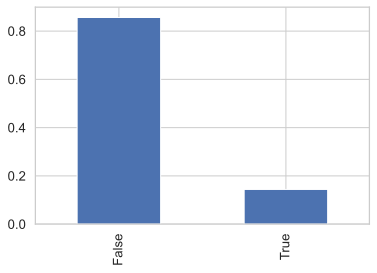

In [465]:
target_pcts = df_train_val['in_some_cocktail'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

False    0.854271
True     0.145729
Name: in_some_cocktail, dtype: float64


<AxesSubplot:>

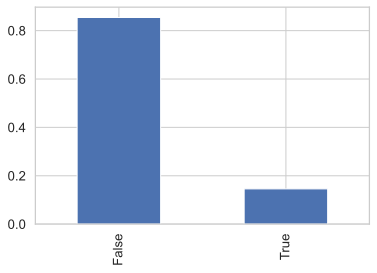

In [466]:
target_pcts = df_test['in_some_cocktail'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

In [467]:
df_tr, df_val = train_test_split(df_train_val,
                                     test_size=0.2, 
                                     stratify=df_train_val['in_some_cocktail'])

In [468]:
df_tr.shape

(634, 6)

In [469]:
foods_df.columns[:10]

Index(['id', 'name', 'name_scientific', 'description', 'itis_id',
       'wikipedia_id', 'picture_file_name', 'picture_content_type',
       'picture_file_size', 'picture_updated_at'],
      dtype='object')

In [470]:
### 7. Apply one-hot-encoding on food group and subgroup columns 

In [471]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [472]:
cat_feature_columns = ['food_group', 'food_subgroup', 'food_type']

In [473]:
ohe.fit(df_tr[cat_feature_columns])
X_tr = ohe.transform(df_tr[cat_feature_columns])
X_val = ohe.transform(df_val[cat_feature_columns])
X_te  = ohe.transform(df_test[cat_feature_columns])

In [474]:
df_val

id               name        food_group    food_subgroup food_type  \
714  739.0            topping      Baking goods     Baking goods    Type 2   
345  351.0               cusk     Aquatic foods           Fishes    Type 1   
821  851.0    vegetable juice         Beverages  Other beverages    Type 2   
329  335.0   chinese broccoli        Vegetables       Vegetables    Type 1   
32    33.0           kohlrabi        Vegetables       Vegetables    Type 1   
..     ...                ...               ...              ...       ...   
580  595.0      mountain hare      Animal foods       Lagomorphs    Type 1   
141  142.0           purslane  Herbs and Spices            Herbs    Type 1   
876  909.0  green bell pepper        Vegetables       Vegetables    Type 1   
675  698.0   chocolate spread   Confectioneries          Spreads    Type 2   
333  339.0              cisco     Aquatic foods           Fishes    Type 1   

    in_some_cocktail  
714            False  
345            False  
821            False  
329            False  
32             False  
..               ...  
580            False  
141            False  
876            False  
675            False  
333            False  

[159 rows x 6 columns]

In [475]:
ohe_column_names= ohe.get_feature_names()
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Eggs', 'x0_Fats and oils',
       'x0_Fruits', 'x0_Gourds', 'x0_Herbs and Spices',
       'x0_Herbs and spices', 'x0_Milk and milk products', 'x0_Nuts',
       'x0_Pulses', 'x0_Snack foods', 'x0_Soy', 'x0_Teas',
       'x0_Unclassified', 'x0_Vegetables', 'x1_Alcoholic beverages',
       'x1_American cuisine', 'x1_Animal fats', 'x1_Asian cuisine',
       'x1_Baking goods', 'x1_Beans', 'x1_Berber cuisine', 'x1_Berries',
       'x1_Beverages', 'x1_Bovines', 'x1_Candies', 'x1_Caprae',
       'x1_Cereal products', 'x1_Cereals',
       'x1_Cereals and cereal products', 'x1_Cetaceans', 'x1_Citrus',
       'x1_Cocoa', 'x1_Cocoa products', 'x1_Coffee', 'x1_Condiments',
       'x1_Crustaceans', 'x1_Desserts', 'x1_Distilled beverages',
       'x1_Doughs', 'x1_Dr

In [476]:
len(ohe_column_names)

115

In [477]:
X_tr.shape

(634, 115)

In [478]:
X_val.shape

(159, 115)

In [479]:
X_te.shape

(199, 115)

In [480]:
X_tr[:10, :10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [481]:
X_tr[:10, -10:]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [482]:
ohe_column_names[20]

'x0_Teas'

In [483]:
X_tr[:, 20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Delete the column (`x0_Unclassified`) of the first ohe categorical feature
and delete it in the column name list

In [484]:
import numpy as np
try:
    x0_delete_item_index = np.argwhere(ohe_column_names=='x0_Unclassified')[0]
except:
    x0_delete_item_index = np.argwhere(ohe_column_names=='x0_Dishes')[0]
x0_delete_item_index

array([21])

In [485]:
x0_delete_item_index = x0_delete_item_index[0].astype(int)
type(x0_delete_item_index)

numpy.int64

In [486]:
import numpy as np
X_tr= np.delete(X_tr, x0_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x0_delete_item_index], ohe_column_names[x0_delete_item_index+1:]) )

In [487]:
X_val= np.delete(X_val, x0_delete_item_index,  axis=1)
X_te= np.delete(X_te, x0_delete_item_index,  axis=1)

In [488]:
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Eggs', 'x0_Fats and oils',
       'x0_Fruits', 'x0_Gourds', 'x0_Herbs and Spices',
       'x0_Herbs and spices', 'x0_Milk and milk products', 'x0_Nuts',
       'x0_Pulses', 'x0_Snack foods', 'x0_Soy', 'x0_Teas',
       'x0_Vegetables', 'x1_Alcoholic beverages', 'x1_American cuisine',
       'x1_Animal fats', 'x1_Asian cuisine', 'x1_Baking goods',
       'x1_Beans', 'x1_Berber cuisine', 'x1_Berries', 'x1_Beverages',
       'x1_Bovines', 'x1_Candies', 'x1_Caprae', 'x1_Cereal products',
       'x1_Cereals', 'x1_Cereals and cereal products', 'x1_Cetaceans',
       'x1_Citrus', 'x1_Cocoa', 'x1_Cocoa products', 'x1_Coffee',
       'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Doughs', 'x1_Dressings', 'x1_Drupes',
   

Delete the column (`x1_Unclassified`) of the second ohe categorical feature
and delete it in the column name list

In [489]:
try:
    x1_delete_item_index = np.argwhere(ohe_column_names=='x1_Unclassified')[0]
except:
    x1_delete_item_index = np.argwhere(ohe_column_names=='x1_Other dishes')[0]
x1_delete_item_index = x1_delete_item_index[0].astype(int)
x1_delete_item_index

104

In [490]:
ohe_column_names[x1_delete_item_index]

'x1_Unclassified'

In [491]:
X_tr= np.delete(X_tr, x1_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x1_delete_item_index], ohe_column_names[x1_delete_item_index+1:]) )

In [492]:
X_val= np.delete(X_val, x1_delete_item_index,  axis=1)
X_te= np.delete(X_te, x1_delete_item_index,  axis=1)

In [493]:
ohe_column_names[x1_delete_item_index]

'x1_Unfermented milks'

Delete the column (`x2_Unknown`) of the third ohe categorical feature
and delete it in the column name list

In [494]:
try:
    x2_delete_item_index = np.argwhere(ohe_column_names=='x2_Unknown')[0]
except:
    x2_delete_item_index = np.argwhere(ohe_column_names=='x2_Type 2')[0]
x2_delete_item_index = x2_delete_item_index[0].astype(int)
x2_delete_item_index

112

In [495]:
X_tr= np.delete(X_tr, x2_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x2_delete_item_index], ohe_column_names[x2_delete_item_index+1:]) )
#ohe_column_names =ohe_column_names[:-1]

In [496]:
X_val= np.delete(X_val, x2_delete_item_index,  axis=1)
X_te= np.delete(X_te, x2_delete_item_index,  axis=1)

In [497]:
assert X_tr.shape[1] == X_val.shape[1] == X_te.shape[1] == len(ohe_column_names)

In [498]:
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Eggs', 'x0_Fats and oils',
       'x0_Fruits', 'x0_Gourds', 'x0_Herbs and Spices',
       'x0_Herbs and spices', 'x0_Milk and milk products', 'x0_Nuts',
       'x0_Pulses', 'x0_Snack foods', 'x0_Soy', 'x0_Teas',
       'x0_Vegetables', 'x1_Alcoholic beverages', 'x1_American cuisine',
       'x1_Animal fats', 'x1_Asian cuisine', 'x1_Baking goods',
       'x1_Beans', 'x1_Berber cuisine', 'x1_Berries', 'x1_Beverages',
       'x1_Bovines', 'x1_Candies', 'x1_Caprae', 'x1_Cereal products',
       'x1_Cereals', 'x1_Cereals and cereal products', 'x1_Cetaceans',
       'x1_Citrus', 'x1_Cocoa', 'x1_Cocoa products', 'x1_Coffee',
       'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Doughs', 'x1_Dressings', 'x1_Drupes',
   

In [499]:
label_tr = pd.get_dummies(df_tr['in_some_cocktail'],drop_first=True)
label_val = pd.get_dummies(df_val['in_some_cocktail'],drop_first=True)
label_te = pd.get_dummies(df_test['in_some_cocktail'],drop_first=True)

In [500]:
label_tr.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
label_val.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
label_te.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
#y_tr

In [501]:
X_tr

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

### Utility functions

In [502]:
def quick_test(model, X, y):
    xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(xtrain, ytrain)
    return model.score(xtest, ytest)

def quick_test_afew_times(model, X, y, n=10):
    return np.mean([quick_test(model, X, y) for j in range(n)])

### 8. Do logistic regression on train set

In [503]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

from sklearn.metrics import confusion_matrix

In [504]:
X_tr

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [505]:
label_tr

Cocktail_ingredient
376                    0
517                    0
746                    0
485                    0
367                    0
..                   ...
861                    0
7                      0
842                    0
438                    0
451                    0

[634 rows x 1 columns]

In [506]:
logit = LogisticRegression(C = 0.1)
logit.fit(X_tr, label_tr)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_val, label_val)))

The score for logistic regression is
Training:  87.07%
Validation set:  86.16%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [507]:
logit.predict_proba(X_tr)

array([[0.8879565 , 0.1120435 ],
       [0.94713944, 0.05286056],
       [0.87973678, 0.12026322],
       ...,
       [0.85167767, 0.14832233],
       [0.92233763, 0.07766237],
       [0.94713944, 0.05286056]])

In [508]:
thresh = .20

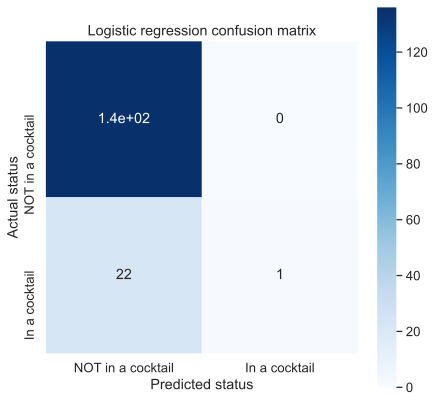

In [509]:
plt.rcParams['figure.figsize']=7,7

status = ['NOT in a cocktail', 'In a cocktail']

# Print confusion matrix for logistic regression
logit_confusion = confusion_matrix(label_val, logit.predict(X_val))
plt.figure(dpi=150)
sns.heatmap(logit_confusion, cmap=plt.cm.Blues, annot=True, square=True,
           xticklabels=status,
           yticklabels=status)

plt.xlabel('Predicted status')
plt.ylabel('Actual status')
plt.title('Logistic regression confusion matrix');

plt.savefig("confusion_matrix_logit_cocktail_ingredient")

In [510]:
lm_weak_reg = LogisticRegression(C = 25)  # C = regularization strength; smaller numbers are stronger
lm_weak_reg.fit(X_tr, label_tr)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=25)

In [511]:
#def make_confusion_matrix(model, threshold=0.06, model_type="Logistic Regression"):
def make_confusion_matrix(model, threshold=0.25, model_type="Logistic Regression"):
#def make_confusion_matrix(model, threshold=0.5, model_type="Logistic Regression"):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    label_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    cocktail_confusion = confusion_matrix(label_val, label_predict)
    plt.figure(dpi=80)
    sns.heatmap(cocktail_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=status,
           yticklabels=status);
    plt.title(model_type)
    plt.xlabel('prediction')
    plt.ylabel('actual')

In [512]:
print("The score for logistic regression (weak regularization) is")
print("Training: {:6.2f}%".format(100*lm_weak_reg.score(X_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*lm_weak_reg.score(X_val, label_val)))

The score for logistic regression (weak regularization) is
Training:  91.80%
Validation set:  89.31%


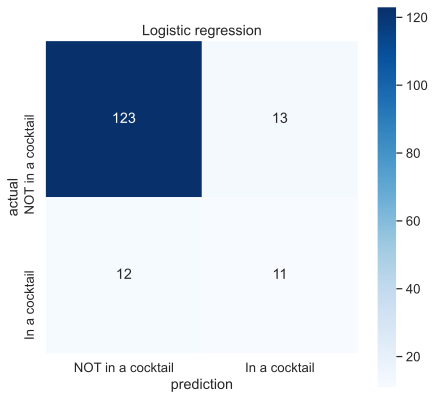

In [513]:
make_confusion_matrix(logit, thresh, model_type="Logistic regression")

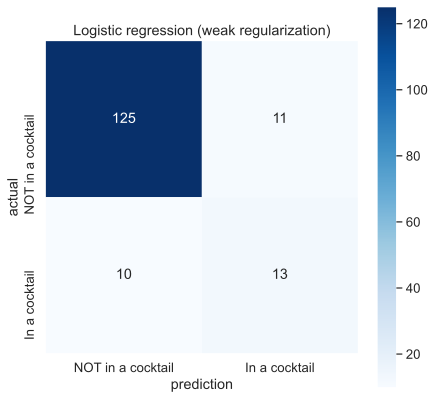

In [514]:

make_confusion_matrix(lm_weak_reg, thresh, model_type="Logistic regression (weak regularization)")

In [515]:
df_val

id               name        food_group    food_subgroup food_type  \
714  739.0            topping      Baking goods     Baking goods    Type 2   
345  351.0               cusk     Aquatic foods           Fishes    Type 1   
821  851.0    vegetable juice         Beverages  Other beverages    Type 2   
329  335.0   chinese broccoli        Vegetables       Vegetables    Type 1   
32    33.0           kohlrabi        Vegetables       Vegetables    Type 1   
..     ...                ...               ...              ...       ...   
580  595.0      mountain hare      Animal foods       Lagomorphs    Type 1   
141  142.0           purslane  Herbs and Spices            Herbs    Type 1   
876  909.0  green bell pepper        Vegetables       Vegetables    Type 1   
675  698.0   chocolate spread   Confectioneries          Spreads    Type 2   
333  339.0              cisco     Aquatic foods           Fishes    Type 1   

    in_some_cocktail  
714            False  
345            False  
821            False  
329            False  
32             False  
..               ...  
580            False  
141            False  
876            False  
675            False  
333            False  

[159 rows x 6 columns]

In [516]:
label_predict = logit.predict(X_val)> thresh

In [517]:
compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-517-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


Empty DataFrame
Columns: [id, name, food_group, food_subgroup, food_type, in_some_cocktail, predicted]
Index: []

In [518]:
false_neg = misclassified[misclassified['predicted'] == False]
false_neg

id                                               name  \
255  256.0                                         grapefruit   
626  644.0                                          liquorice   
172  173.0                               garden tomato (var.)   
368  374.0                                              grape   
445  456.0                                           rose hip   
17    18.0                                        horseradish   
379  385.0                                   alaska blueberry   
859  890.0                           cocoa and cocoa products   
650  670.0                                              sugar   
207  208.0                                             banana   
937  970.0                                       coconut milk   
50    51.0                                    ceylon cinnamon   
649  669.0                                              cream   
632  650.0                                       madeira wine   
889  922.0  cow milk, pasteurized, vitamin a + d added, 1%...   
630  648.0                                           vermouth   
631  649.0                                             sherry   
888  921.0  cow milk, pasteurized, vitamin a + d added, 0%...   
646  666.0                                               salt   
684  707.0                                       cocoa powder   
22    23.0                                         star fruit   
182  183.0                                       common thyme   

                   food_group             food_subgroup food_type  \
255                    Fruits                    Citrus    Type 1   
626           Confectioneries                   Candies    Type 2   
172                Vegetables                Vegetables    Type 1   
368                    Fruits                   Berries    Type 1   
445          Herbs and Spices                     Herbs    Type 1   
17           Herbs and Spices                    Spices    Type 1   
379                    Fruits                   Berries    Type 1   
859  Cocoa and cocoa products  Cocoa and cocoa products   Unknown   
650              Baking goods                    Sugars    Type 2   
207                    Fruits           Tropical fruits    Type 1   
937    Milk and milk products       Other milk products    Type 1   
50           Herbs and Spices                    Spices    Type 1   
649    Milk and milk products       Other milk products    Type 2   
632                 Beverages           Fortified wines    Type 2   
889    Milk and milk products         Unfermented milks    Type 2   
630                 Beverages           Fortified wines    Type 2   
631                 Beverages           Fortified wines    Type 2   
888    Milk and milk products         Unfermented milks    Type 2   
646              Baking goods                Seasonings    Type 2   
684  Cocoa and cocoa products            Cocoa products    Type 2   
22                     Fruits           Tropical fruits    Type 1   
182          Herbs and Spices                     Herbs    Type 1   

    in_some_cocktail  predicted  
255             True      False  
626             True      False  
172             True      False  
368             True      False  
445             True      False  
17              True      False  
379             True      False  
859             True      False  
650             True      False  
207             True      False  
937             True      False  
50              True      False  
649             True      False  
632             True      False  
889             True      False  
630             True      False  
631             True      False  
888             True      False  
646             True      False  
684             True      False  
22              True      False  
182             True      False

In [519]:
feature_dict = dict(zip(ohe_column_names, *logit.coef_))
feature_dict
#ranked_features =sorted(feature_dict, key=feature_dict.__getitem__)
#ranked_features

{'x0_Animal foods': -0.22463828694353088,
 'x0_Aquatic foods': -0.6321599020352257,
 'x0_Baking goods': -0.07529978804669156,
 'x0_Beverages': 1.1822463835205472,
 'x0_Cereals and cereal products': -0.2517603498950901,
 'x0_Cocoa and cocoa products': 0.3064321042062309,
 'x0_Coffee and coffee products': 0.16464323693068256,
 'x0_Confectioneries': -0.1188195078604092,
 'x0_Dishes': -0.3238419629173756,
 'x0_Eggs': 0.08188558086333544,
 'x0_Fats and oils': -0.08813586917162555,
 'x0_Fruits': 0.5154504476483742,
 'x0_Gourds': -0.010426914831455069,
 'x0_Herbs and Spices': 0.219698560442734,
 'x0_Herbs and spices': -0.012892369956909618,
 'x0_Milk and milk products': -0.044234000244875185,
 'x0_Nuts': -0.10166049021143236,
 'x0_Pulses': -0.19161722233501718,
 'x0_Snack foods': -0.05929268042917205,
 'x0_Soy': -0.0850924659281344,
 'x0_Teas': 0.0698167820890621,
 'x0_Vegetables': -0.30391301587933517,
 'x1_Alcoholic beverages': 0.17689761888990915,
 'x1_American cuisine': -0.012280548632009

In [520]:
category_coef_df = pd.DataFrame(pd.Series(feature_dict).sort_values(ascending = False)).reset_index()
category_coef_df.rename(columns ={'index':'Category / subcategory', 0: 'Coefficient'}, inplace = True)


In [521]:
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Beverages', 'Category / subcategory'] = 'x1_Beverages (nonspecific)'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Cocoa and cocoa products', 'Category / subcategory'] = 'x1_Cocoa & cocoa products subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Coffee and coffee products', 'Category / subcategory'] = 'x1_Coffee & coffee products subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Teas', 'Category / subcategory'] = 'x1_Teas subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Herbs and Spices', 'Category / subcategory'] = 'x1_Herbs & Spices subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Soy', 'Category / subcategory'] = 'x1_Soy subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Fats and oils', 'Category / subcategory'] = 'x1_Fats & oils subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Cereals and cereal products', 'Category / subcategory'] = 'x1_Cereal & cereal products subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Pulses', 'Category / subcategory'] = 'x1_Pulses subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Baking goods', 'Category / subcategory'] = 'x1_Baking goods subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Other beverages', 'Category / subcategory'] = 'x1_Other beverages subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Vegetables', 'Category / subcategory'] = 'x1_Vegetables subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Fruits', 'Category / subcategory'] = 'x1_Fruits subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Milk and other milk products', 'Category / subcategory'] = 'x1_Milk & other milk products subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Nuts', 'Category / subcategory'] = 'x1_Nuts subcategory'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x1_Eggs', 'Category / subcategory'] = 'x1_Eggs subcategory'



In [522]:
category_coef_df.loc[category_coef_df['Category / subcategory']=='x2_Type 1', 'Category / subcategory'] = 'x1_Type 1 (Unprocessed food)'
category_coef_df.loc[category_coef_df['Category / subcategory']=='x2_Type 2', 'Category / subcategory'] = 'x1_Type 2 (Processed food)'

In [523]:

category_coef_df.replace({'Category / subcategory':r'x[012]_'}, {'Category / subcategory':''}, regex=True, inplace=True)

In [524]:
category_coef_df.tail(50)

Category / subcategory  Coefficient
62               Tex-Mex cuisine    -0.024303
63                        Doughs    -0.025851
64                Vegetable fats    -0.029665
65               Fermented milks    -0.030775
66                       Bovines    -0.032052
67       Beverages (nonspecific)    -0.032826
68                    Sandwiches    -0.036078
69                  Pasta dishes    -0.036078
70                   Ground meat    -0.036078
71               Mexican cuisine    -0.036078
72        Latin American cuisine    -0.036078
73         Nutritional beverages    -0.038111
74                         Herbs    -0.040154
75                          Peas    -0.043562
76                   Animal fats    -0.043956
77        Milk and milk products    -0.044234
78                    Condiments    -0.044434
79                       Seaweed    -0.050717
80                   Crustaceans    -0.052081
81                   Snack foods    -0.059293
82                   Snack foods    -0.059293
83               Cereal products    -0.062583
84                      Mollusks    -0.064384
85                       Candies    -0.069810
86                  Other dishes    -0.070027
87                Fruit products    -0.070280
88                  Baking goods    -0.075300
89                      Desserts    -0.082835
90                           Soy    -0.085092
91                  Soy products    -0.085092
92                   Flat breads    -0.085846
93               Leavened breads    -0.085846
94                 Fats and oils    -0.088136
95              Nuts subcategory    -0.101660
96                          Nuts    -0.101660
97                         Beans    -0.112603
98               Confectioneries    -0.118820
99               Tropical fruits    -0.122025
100                      Poultry    -0.127463
101      Fermented milk products    -0.152504
102                       Pulses    -0.191617
103    Type 1 (Unprocessed food)    -0.195802
104                 Animal foods    -0.224638
105  Cereals and cereal products    -0.251760
106                Oilseed crops    -0.267264
107                   Vegetables    -0.303913
108       Vegetables subcategory    -0.303913
109                       Dishes    -0.323842
110                       Fishes    -0.386914
111                Aquatic foods    -0.632160

In [525]:
category_coef_df[category_coef_df['Category / subcategory'] =='Cocoa and cocoa products']

Category / subcategory  Coefficient
5  Cocoa and cocoa products     0.306432

<AxesSubplot:xlabel='Coefficient', ylabel='Category / subcategory'>

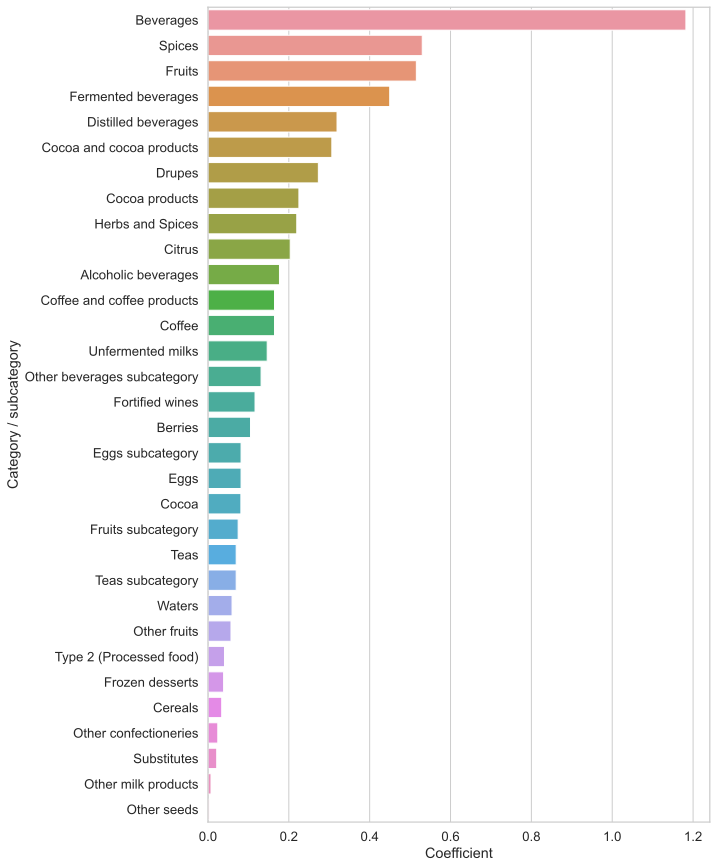

In [526]:
contributors = category_coef_df[category_coef_df['Coefficient'] > 0]
plt.rcParams['figure.figsize']=9,15
sns.barplot(data=contributors, x='Coefficient', y='Category / subcategory', ci=None)

<BarContainer object of 32 artists>

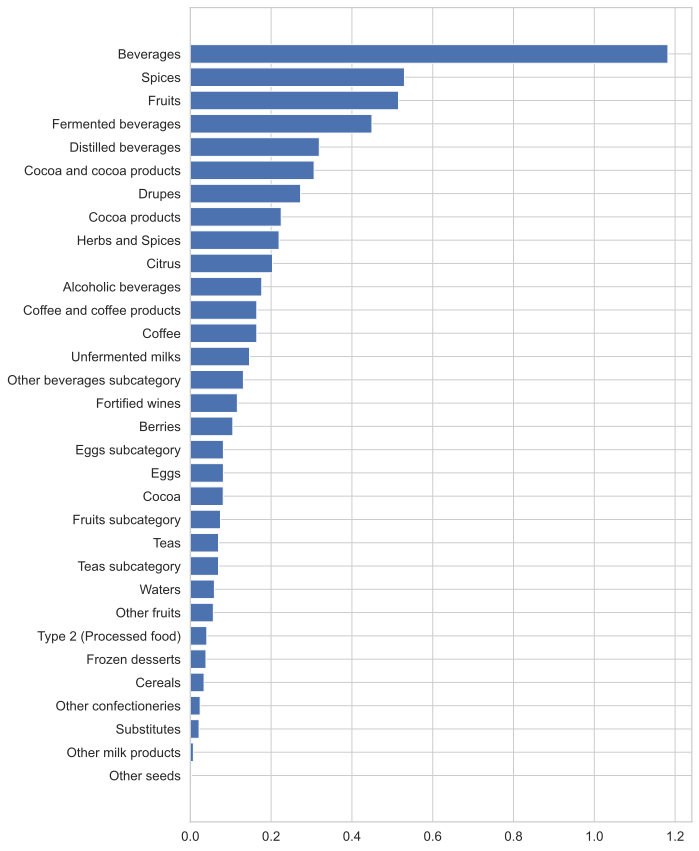

In [527]:
data= contributors.sort_values(by = 'Coefficient')
plt.barh(data['Category / subcategory'],data['Coefficient'])

<AxesSubplot:xlabel='Coefficient', ylabel='Category / subcategory'>

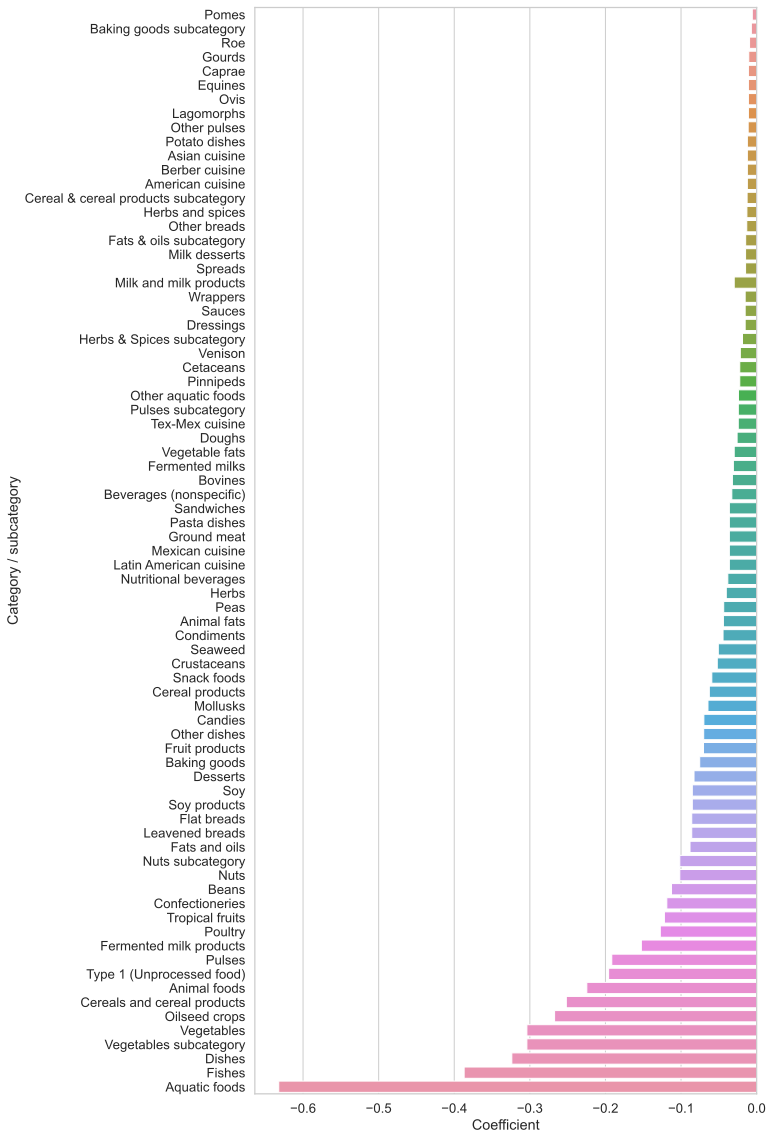

In [528]:
detractors = category_coef_df[category_coef_df['Coefficient'] < 0]
plt.rcParams['figure.figsize']=9,20
sns.barplot(data=detractors , x='Coefficient', y='Category / subcategory', ci=None)

#### KNN

In [529]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

In [530]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_tr, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_val, label_val)))

The score for kNN is
Training:  90.85%
Validation set:  88.05%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


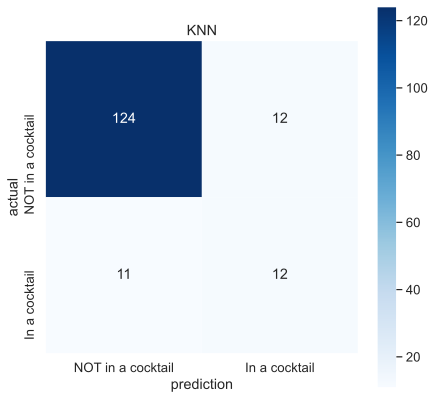

In [531]:
plt.rcParams['figure.figsize']=7,7
make_confusion_matrix(knn, model_type="KNN")

### Precision and Recall

#### Logistic

In [532]:
label_predict = logit.predict(X_val)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 1.0000,   Recall: 0.0435


In [533]:
thresh = 0.2
label_predict = (logit.predict_proba(X_val)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.2
Precision: 0.4583,   Recall: 0.4783


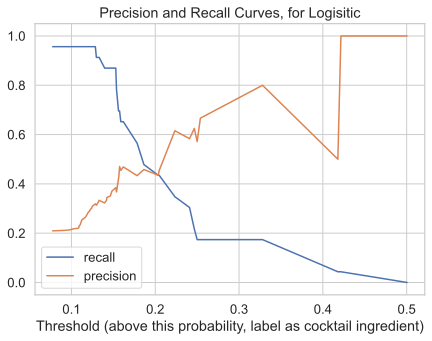

In [534]:
plt.rcParams['figure.figsize']=7,5

# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

### KNN

In [535]:
label_predict = knn.predict(X_val)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.6667,   Recall: 0.3478


In [536]:
thresh = 0.2
label_predict = (knn.predict_proba(X_val)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.2
Precision: 0.5000,   Recall: 0.5217


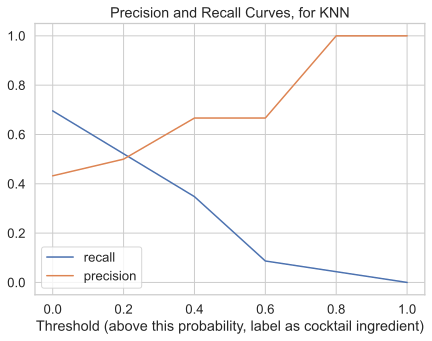

In [537]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

### F1 score

#### Logistic

In [538]:
label_predict = logit.predict(X_val)
f1_score(label_val, label_predict)

0.08333333333333333

In [539]:
label_predict = (logit.predict_proba(X_val)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.4680851063829787

#### KNN

In [540]:

label_predict = knn.predict(X_val)
f1_score(label_val, label_predict)

0.4571428571428571

In [541]:
label_predict = (knn.predict_proba(X_val)[:, 1] > 0.17)
f1_score(label_val, label_predict)

0.5333333333333333

### ROC curve

In [542]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_val)[:,1])

ROC AUC score, for Logistic =  0.8618925831202046


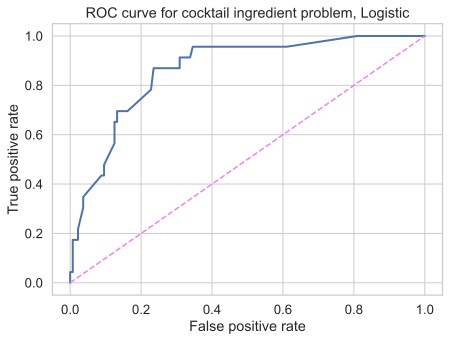

In [543]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_val)[:,1]))

In [544]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_val)[:,1])

ROC AUC score, for KNN =  0.7880434782608696


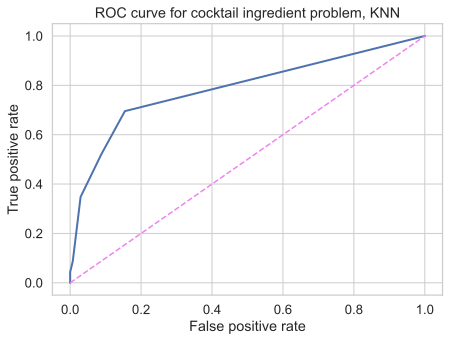

In [545]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_val)[:,1]))

### Uilitity function:   Log Loss Report

In [546]:
from sklearn.metrics import log_loss
def log_loss_report(model_names, lab_tr, X_tr, lab_val, X_val):
    print('\n')
    for m in model_names:
        tr_log_loss =  log_loss(lab_tr,  eval(m).predict_proba(X_tr))
        val_log_loss = log_loss(lab_val, eval(m).predict_proba(X_val))
        diff = val_log_loss - tr_log_loss 
        print("Log-loss:\t{0:6.4f}\t{1:6.4f}\t\tdiff =\t{2:6.4f}\t{3}\n".format(tr_log_loss, val_log_loss, diff, m))


### Log Loss Cross-Entropy

In [547]:
# print("Logistic")
# print("Log-loss on logit: {:6.4f}".format(log_loss(label_val, logit.predict_proba(X_val))))

# print("Logistic (weak regulurization)")
# print("Log-loss on logit: {:6.4f}".format(log_loss(label_val, lm.predict_proba(X_val))))

# print("KNN")
# print("Log-loss on logit: {:6.4f}".format(log_loss(label_val, knn.predict_proba(X_val)[:, 1])))


In [548]:
log_loss_report(['logit',  'knn'], label_tr, X_tr, label_val, X_val)



Log-loss:	0.3210	0.3382		diff =	0.0172	logit

Log-loss:	1.1241	1.6705		diff =	0.5464	knn



## Consider the full set of 15000+ features

In [549]:
df_train_val, df_test = train_test_split(foods_df,
                                     test_size=0.2, 
                                     random_state=42, stratify=foods_df['in_some_cocktail'])

False    0.856242
True     0.143758
Name: in_some_cocktail, dtype: float64


<AxesSubplot:>

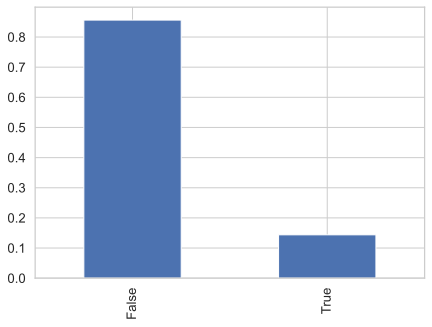

In [550]:
plt.rcParams['figure.figsize']=7,5
target_pcts = df_train_val['in_some_cocktail'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

False    0.854271
True     0.145729
Name: in_some_cocktail, dtype: float64


<AxesSubplot:>

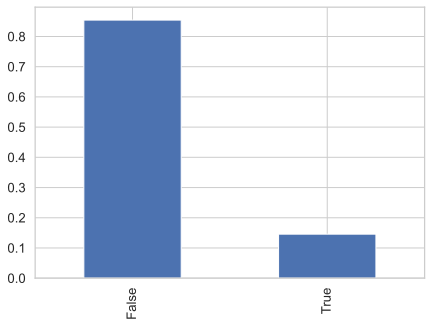

In [551]:
target_pcts = df_test['in_some_cocktail'].value_counts(normalize=True) 
print(target_pcts)

target_pcts.plot(kind='bar')

In [552]:
df_tr, df_val = train_test_split(df_train_val,
                                     test_size=0.2, 
                                     stratify=df_train_val['in_some_cocktail'])

In [553]:
label_tr = df_tr['in_some_cocktail']
label_val = df_val['in_some_cocktail']
label_test = df_test['in_some_cocktail']

In [554]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [555]:
cat_feature_columns = ['food_group', 'food_subgroup', 'food_type']

In [556]:
ohe.fit(df_tr[cat_feature_columns])
X_cat_tr = ohe.transform(df_tr[cat_feature_columns])
X_cat_val = ohe.transform(df_val[cat_feature_columns])
X_cat_test  = ohe.transform(df_test[cat_feature_columns])

In [557]:
ohe_column_names= ohe.get_feature_names()
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Eggs', 'x0_Fats and oils',
       'x0_Fruits', 'x0_Gourds', 'x0_Herbs and Spices',
       'x0_Herbs and spices', 'x0_Milk and milk products', 'x0_Nuts',
       'x0_Pulses', 'x0_Snack foods', 'x0_Soy', 'x0_Teas',
       'x0_Unclassified', 'x0_Vegetables', 'x1_Alcoholic beverages',
       'x1_American cuisine', 'x1_Animal fats', 'x1_Asian cuisine',
       'x1_Baking goods', 'x1_Beans', 'x1_Berries', 'x1_Beverages',
       'x1_Bovines', 'x1_Bread products', 'x1_Candies',
       'x1_Cereal products', 'x1_Cereals', 'x1_Cetaceans', 'x1_Citrus',
       'x1_Cocoa', 'x1_Cocoa and cocoa products', 'x1_Cocoa products',
       'x1_Coffee', 'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Doughs', 'x1_Dressings', 'x1_Drupes',


In [558]:
len(ohe_column_names)

112

Delete the column (`x0_Unclassified`) of the first ohe categorical feature
and delete it in the column name list

In [559]:
try:
    x0_delete_item_index = np.argwhere(ohe_column_names=='x0_Unclassified')[0]
except:
    x0_delete_item_index = np.argwhere(ohe_column_names=='x0_Dishes')[0]
x0_delete_item_index

array([21])

In [560]:
x0_delete_item_index = x0_delete_item_index[0].astype(int)
type(x0_delete_item_index)

numpy.int64

In [561]:
X_cat_tr= np.delete(X_cat_tr, x0_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x0_delete_item_index], ohe_column_names[x0_delete_item_index+1:]) )

In [562]:
X_cat_val= np.delete(X_cat_val, x0_delete_item_index,  axis=1)
X_cat_test= np.delete(X_cat_test, x0_delete_item_index,  axis=1)

In [563]:
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Eggs', 'x0_Fats and oils',
       'x0_Fruits', 'x0_Gourds', 'x0_Herbs and Spices',
       'x0_Herbs and spices', 'x0_Milk and milk products', 'x0_Nuts',
       'x0_Pulses', 'x0_Snack foods', 'x0_Soy', 'x0_Teas',
       'x0_Vegetables', 'x1_Alcoholic beverages', 'x1_American cuisine',
       'x1_Animal fats', 'x1_Asian cuisine', 'x1_Baking goods',
       'x1_Beans', 'x1_Berries', 'x1_Beverages', 'x1_Bovines',
       'x1_Bread products', 'x1_Candies', 'x1_Cereal products',
       'x1_Cereals', 'x1_Cetaceans', 'x1_Citrus', 'x1_Cocoa',
       'x1_Cocoa and cocoa products', 'x1_Cocoa products', 'x1_Coffee',
       'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Doughs', 'x1_Dressings', 'x1_Drupes',
       'x1_Eggs', '

In [564]:
assert X_cat_tr.shape[1] == X_cat_val.shape[1] == X_cat_test.shape[1] == len(ohe_column_names)

Delete the column (x1_Unclassified) of the second ohe categorical feature and delete it in the column name list

In [565]:
try:
    x1_delete_item_index = np.argwhere(ohe_column_names=='x1_Unclassified')[0]
except:
    x1_delete_item_index = np.argwhere(ohe_column_names=='x1_Other dishes')[0]
x1_delete_item_index = x1_delete_item_index[0].astype(int)
x1_delete_item_index

102

In [566]:
ohe_column_names[x1_delete_item_index]

'x1_Unclassified'

In [567]:
X_cat_tr= np.delete(X_cat_tr, x1_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x1_delete_item_index], ohe_column_names[x1_delete_item_index+1:]) )

In [568]:
X_cat_val= np.delete(X_cat_val, x1_delete_item_index,  axis=1)
X_cat_test= np.delete(X_cat_test, x1_delete_item_index,  axis=1)

In [569]:
ohe_column_names[x1_delete_item_index]

'x1_Unfermented milks'

In [570]:
assert X_cat_tr.shape[1] == X_cat_val.shape[1] == X_cat_test.shape[1] == len(ohe_column_names)

Delete the column (`x2_Unknown`) of the third ohe categorical feature
and delete it in the column name list

In [571]:
try:
    x2_delete_item_index = np.argwhere(ohe_column_names=='x2_Unknown')[0]
except:
    x2_delete_item_index = np.argwhere(ohe_column_names=='x2_Type 2')[0]
x2_delete_item_index = x2_delete_item_index[0].astype(int)
x2_delete_item_index

109

In [572]:
len(ohe_column_names)

110

In [573]:
ohe_column_names[x2_delete_item_index]

'x2_Unknown'

In [574]:
X_cat_tr= np.delete(X_cat_tr, x2_delete_item_index,  axis=1)
ohe_column_names = np.concatenate((ohe_column_names[:x2_delete_item_index], ohe_column_names[x2_delete_item_index+1:]) )
#ohe_column_names =ohe_column_names[:-1]

In [575]:
X_cat_val= np.delete(X_cat_val, x2_delete_item_index,  axis=1)
X_cat_test= np.delete(X_cat_test, x2_delete_item_index,  axis=1)

In [576]:
X_cat_tr.shape[1]

109

In [577]:
X_cat_val.shape[1]

109

In [578]:
X_cat_test.shape[1]

109

In [579]:
len(ohe_column_names)

109

In [580]:
assert X_cat_tr.shape[1] == X_cat_val.shape[1] == X_cat_test.shape[1] == len(ohe_column_names)

In [581]:
ohe_column_names

array(['x0_Animal foods', 'x0_Aquatic foods', 'x0_Baking goods',
       'x0_Beverages', 'x0_Cereals and cereal products',
       'x0_Cocoa and cocoa products', 'x0_Coffee and coffee products',
       'x0_Confectioneries', 'x0_Dishes', 'x0_Eggs', 'x0_Fats and oils',
       'x0_Fruits', 'x0_Gourds', 'x0_Herbs and Spices',
       'x0_Herbs and spices', 'x0_Milk and milk products', 'x0_Nuts',
       'x0_Pulses', 'x0_Snack foods', 'x0_Soy', 'x0_Teas',
       'x0_Vegetables', 'x1_Alcoholic beverages', 'x1_American cuisine',
       'x1_Animal fats', 'x1_Asian cuisine', 'x1_Baking goods',
       'x1_Beans', 'x1_Berries', 'x1_Beverages', 'x1_Bovines',
       'x1_Bread products', 'x1_Candies', 'x1_Cereal products',
       'x1_Cereals', 'x1_Cetaceans', 'x1_Citrus', 'x1_Cocoa',
       'x1_Cocoa and cocoa products', 'x1_Cocoa products', 'x1_Coffee',
       'x1_Condiments', 'x1_Crustaceans', 'x1_Desserts',
       'x1_Distilled beverages', 'x1_Doughs', 'x1_Dressings', 'x1_Drupes',
       'x1_Eggs', '

In [582]:
label_tr = pd.get_dummies(df_tr['in_some_cocktail'],drop_first=True)
label_val = pd.get_dummies(df_val['in_some_cocktail'],drop_first=True)
label_test = pd.get_dummies(df_test['in_some_cocktail'],drop_first=True)

In [583]:
label_tr.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
label_val.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)
label_test.rename({True: 'Cocktail_ingredient'},axis='columns', inplace=True)

In [584]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [585]:
cont_feature_columns = foods_df.iloc[:, foods_df.columns.get_loc('orig_food_common_name')+1: -1].columns

In [586]:
cont_feature_columns

Index(['(E)-2-HEPTENAL_in_Calyx', '(E)-2-HEXENAL_in_Calyx',
       '(Z)-3-HEXENOL_in_Calyx', '1,4-CINEOLE_in_Calyx',
       '1,8-CINEOLE_in_Calyx', '1-HEXANOL_in_Calyx',
       '2,2-DIMETHYL-HEXANAL_in_Calyx', '2-ETHYL-FURAN_in_Calyx',
       '2-PENTYL-FURAN_in_Calyx',
       '3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Fruit',
       ...
       'VIT-E_in_Sprout Seedling', 'ALLANTOIC-ACID_in_Sprout Seedling',
       'HOMOGENTISINIC-ACID_in_Sprout Seedling', 'PIPECOLIC-ACID_in_Stem',
       'NEOGLUCOBRASSICIN_in_Seed', 'TETRACOSANOIC-ACID_in_Seed Oil',
       'DIOSCIN_in_Root', 'ADENINE_in_Tuber', 'PHYTIN_in_Tuber',
       'SUGARS_in_Tuber'],
      dtype='object', length=15597)

In [587]:
df_tr.shape

(634, 15622)

In [588]:
df_tr[cont_feature_columns].fillna(0, inplace=True)
df_val[cont_feature_columns].fillna(0, inplace=True)
df_test[cont_feature_columns].fillna(0, inplace=True)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/pandas/core/frame.py:4459: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [589]:
ss.fit(df_tr[cont_feature_columns])
X_scaled_tr = ss.transform(df_tr[cont_feature_columns])
X_scaled_val = ss.transform(df_val[cont_feature_columns])
X_scaled_test = ss.transform(df_test[cont_feature_columns])

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)


In [590]:
X_combo_tr = pd.concat([pd.DataFrame(X_cat_tr), pd.DataFrame(X_scaled_tr)], axis='columns')

In [591]:
X_combo_val = pd.concat([pd.DataFrame(X_cat_val), pd.DataFrame(X_scaled_val)], axis='columns')

In [592]:
X_combo_test = pd.concat([pd.DataFrame(X_cat_test), pd.DataFrame(X_scaled_test)], axis='columns')

In [593]:
X_combo_tr.fillna(0, inplace=True)
X_combo_val.fillna(0, inplace=True)
X_combo_test.fillna(0, inplace=True)

In [594]:
df_tr.head()

id                 name        name_scientific  \
225  226.0  garden onion (var.)  Allium cepa var. cepa   
493  505.0               turkey    Meleagris gallopavo   
437  447.0          opium poppy     Papaver somniferum   
847  878.0      milk substitute                    NaN   
684  707.0         cocoa powder                    NaN   

                                           description   itis_id  \
225                                                NaN  182638.0   
493  "The wild turkey (Meleagris gallopavo) is nati...  176136.0   
437  Papaver somniferum, the Opium poppy, is the sp...   18894.0   
847  A milk substitute is a liquid that replaces mi...       NaN   
684  Cocoa solids are the low-fat component of choc...       NaN   

            wikipedia_id picture_file_name picture_content_type  \
225                  NaN           226.jpg           image/jpeg   
493  Meleagris_gallopavo           505.jpg           image/jpeg   
437          Opium_poppy           447.jpg           image/jpeg   
847      Milk_substitute           878.jpg           image/jpeg   
684         Cocoa_solids           707.jpg           image/jpeg   

     picture_file_size       picture_updated_at  ...  \
225           138437.0  2012-04-23 10:45:33 UTC  ...   
493           191689.0                      NaN  ...   
437            72650.0  2012-04-20 09:32:23 UTC  ...   
847            42023.0  2012-04-20 09:34:20 UTC  ...   
684            41587.0  2012-04-20 09:37:45 UTC  ...   

     ALLANTOIC-ACID_in_Sprout Seedling HOMOGENTISINIC-ACID_in_Sprout Seedling  \
225                                NaN                                    NaN   
493                                NaN                                    NaN   
437                                NaN                                    NaN   
847                                NaN                                    NaN   
684                                NaN                                    NaN   

    PIPECOLIC-ACID_in_Stem NEOGLUCOBRASSICIN_in_Seed  \
225                    NaN                       NaN   
493                    NaN                       NaN   
437                    NaN                       NaN   
847                    NaN                       NaN   
684                    NaN                       NaN   

    TETRACOSANOIC-ACID_in_Seed Oil DIOSCIN_in_Root  ADENINE_in_Tuber  \
225                            NaN             NaN               NaN   
493                            NaN             NaN               NaN   
437                            NaN             NaN               NaN   
847                            NaN             NaN               NaN   
684                            NaN             NaN               NaN   

     PHYTIN_in_Tuber SUGARS_in_Tuber in_some_cocktail  
225              NaN             NaN            False  
493              NaN             NaN            False  
437              NaN             NaN            False  
847              NaN             NaN            False  
684              NaN             NaN             True  

[5 rows x 15622 columns]

In [595]:
X_combo_tr.shape

(634, 15706)

In [596]:
np.isnan(X_combo_tr).count()

0        634
1        634
2        634
3        634
4        634
        ... 
15592    634
15593    634
15594    634
15595    634
15596    634
Length: 15706, dtype: int64

In [597]:
#X_combo_tr

### Logistic

In [598]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_combo_tr, label_tr)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.0001, max_iter=10000)

In [599]:
logit.coef_.shape

(1, 15706)

In [600]:
logit.coef_[len(ohe_column_names):len(ohe_column_names)+50]

array([], shape=(0, 15706), dtype=float64)

In [601]:
#logit_combo_tr_predictions = logit.predict_proba(X_combo_tr)

In [602]:
#logit_combo_val_predictions = logit.predict_proba(X_combo_val)

In [603]:
#select_df_columns = ['name','description','in_some_cocktail', 'CALCIUM_in_Fruit', 'IRON_in_Fruit','WATER_in_Leaf', 'PHOSPHORUS_in_Fruit']
#select_df_val = df_val[select_df_columns].fillna(0) 
#select_df_val
#select_val_proba_df = pd.concat([select_df_val, pd.DataFrame(logit_combo_tr_predictions)], axis = 1)
#select_val_proba_df = select_df_val.join(pd.DataFrame(logit_combo_val_predictions))


In [604]:
#select_val_proba_df

In [605]:
#combo_val_pred_df = pd.DataFrame(logit_combo_val_predictions).reset_index(drop=True)
#combo_val_pred_df = pd.concat([select_val_proba_df, combo_val_pred_df], axis=1, ignore_index=True)

In [606]:
#select_val_proba_df.to_csv('data/'+'select_val_proba_df.csv')

In [607]:
#combo_val_pred_df.to_csv('data/'+'combo_val_pred_df.csv')

In [608]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_combo_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_combo_val, label_val)))

The score for logistic regression is
Training:  85.65%
Validation set:  85.53%


In [609]:
#def make_confusion_matrix(model, threshold=0.06, model_type="Logistic Regression"):
def make_confusion_matrix_custom(model, X_val, label_val,  threshold=0.25, model_type="Logistic Regression"):
#def make_confusion_matrix(model, threshold=0.5, model_type="Logistic Regression"):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    label_predict = (model.predict_proba(X_val)[:, 1] >= threshold)
    cocktail_confusion = confusion_matrix(label_val, label_predict)
    plt.figure(dpi=80)
    sns.heatmap(cocktail_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=status,
           yticklabels=status);
    plt.title(model_type)
    plt.xlabel('prediction')
    plt.ylabel('actual')

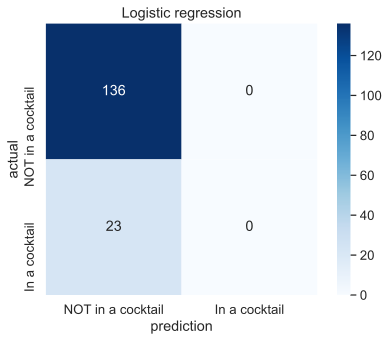

In [610]:
thresh = .22
make_confusion_matrix_custom(logit, X_combo_val, label_val, thresh, model_type="Logistic regression")

### KNN

In [611]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_combo_tr, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_combo_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_combo_val, label_val)))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The score for kNN is
Training:  91.17%
Validation set:  86.79%


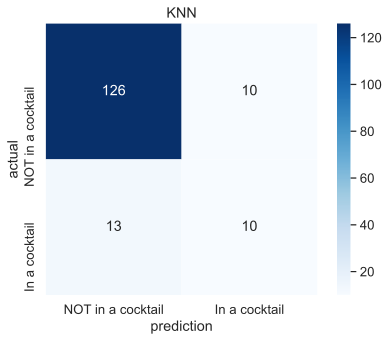

In [612]:
make_confusion_matrix_custom(knn, X_combo_val, label_val, thresh, model_type="KNN")

### Logistic

In [613]:
label_predict = logit.predict(X_combo_val)
f1_score(label_val, label_predict)

0.0

In [614]:
label_predict = (logit.predict_proba(X_combo_val)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.0

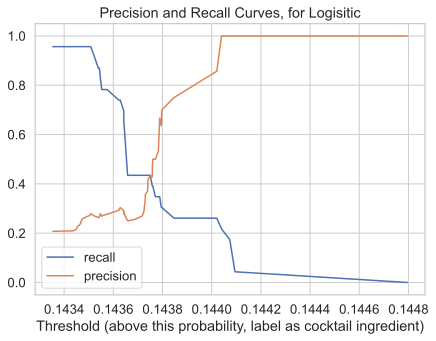

In [615]:
plt.rcParams['figure.figsize']=7,5
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_combo_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

### KNN

In [616]:
label_predict = knn.predict(X_combo_val)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.5714,   Recall: 0.3478


In [617]:
thresh = 0.1
label_predict = (knn.predict_proba(X_combo_val)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.1
Precision: 0.3396,   Recall: 0.7826


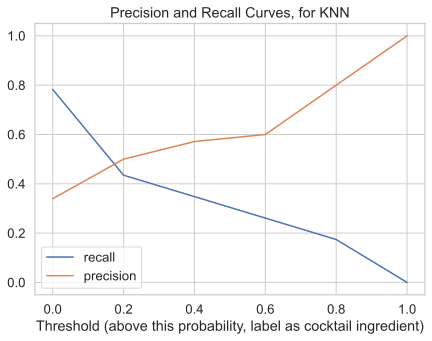

In [618]:
plt.rcParams['figure.figsize']=7,5
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_combo_val)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

### F1 score

#### Logistic

In [619]:
label_predict = logit.predict(X_combo_val)
f1_score(label_val, label_predict)

0.0

In [620]:
label_predict = (logit.predict_proba(X_combo_val)[:, 1] > 0.22)
f1_score(label_val, label_predict)

0.0

#### KNN

In [621]:
label_predict = knn.predict(X_combo_val)
f1_score(label_val, label_predict)

0.4324324324324324

In [622]:
label_predict = (knn.predict_proba(X_combo_val)[:, 1] > 0.1)
f1_score(label_val, label_predict)

0.47368421052631576

### Logistic

In [623]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_combo_val)[:,1])

ROC AUC score, for Logistic =  0.8019501278772379


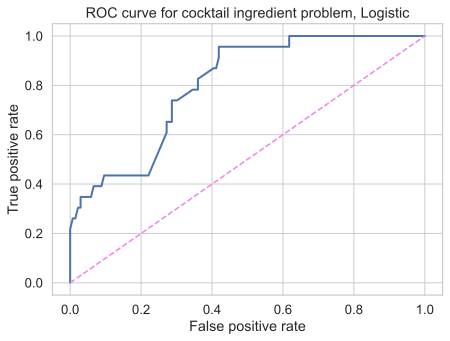

In [624]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_combo_val)[:,1]))

### KNN

In [625]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_combo_val)[:,1])

ROC AUC score, for KNN =  0.7952365728900256


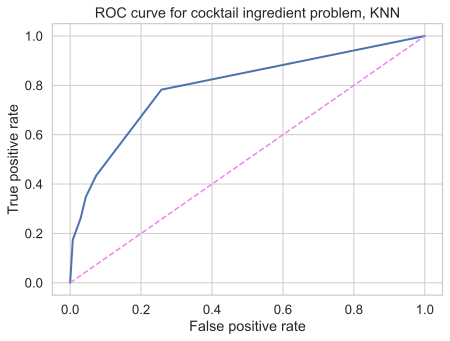

In [626]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_combo_val)[:,1]))

### Log Loss Cross-Entropy

In [627]:

log_loss_report(['logit','knn'], label_tr, X_combo_tr, label_val, X_combo_val)



Log-loss:	0.4111	0.4130		diff =	0.0020	logit

Log-loss:	0.7044	1.4949		diff =	0.7905	knn



### Consider just continuous features

### Logistic

In [628]:
X_scaled_tr= np.nan_to_num(X_scaled_tr)
X_scaled_val=np.nan_to_num(X_scaled_val)
X_scaled_test=np.nan_to_num(X_scaled_test)

In [629]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_scaled_tr, label_tr)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.0001, max_iter=10000)

In [630]:
print("The score for Logistic is")
print("Training: {:6.2f}%".format( 100*logit.score(np.array(X_scaled_tr), np.array(label_tr))))
print("Validation set: {:6.2f}%".format(100*logit.score(np.array(X_scaled_val), np.array(label_val))))

The score for Logistic is
Training:  85.65%
Validation set:  85.53%


### KNN

In [631]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_scaled_tr, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_scaled_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_scaled_val, label_val)))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


The score for kNN is
Training:  18.77%
Validation set:  13.84%


### Naive Bayes

In [632]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
nb = GaussianNB()


In [633]:
nb.fit(np.array(X_scaled_tr), np.array(label_tr))
print("The score for Naive Bayes is")
print("Training: {:6.2f}%".format( 100*nb.score(np.array(X_scaled_tr), np.array(label_tr))))
print("Validation set: {:6.2f}%".format(100*nb.score(np.array(X_scaled_val), np.array(label_val))))


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The score for Naive Bayes is
Training:  20.03%
Validation set:  13.84%


### Decision Tree

In [634]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

Might want to adjust tree depth

In [635]:
tree_depth = 3
d_tree = DecisionTreeClassifier(max_depth = tree_depth )
quick_test_afew_times(d_tree, X_scaled_tr, label_tr)

0.8596858638743455

In [636]:
quick_test_afew_times(d_tree, X_scaled_tr, label_tr)

0.8591623036649215

In [637]:
d_tree.fit(np.array(X_scaled_tr), np.array(label_tr))
print("The score for Decision Tree is")
print("Training: {:6.2f}%".format( 100*d_tree.score(np.array(X_scaled_tr), np.array(label_tr))))
print("Validation set: {:6.2f}%".format(100*d_tree.score(np.array(X_scaled_val), np.array(label_val))))


The score for Decision Tree is
Training:  86.44%
Validation set:  86.16%


### Random Forest

Might want to adjust the number of estimators

In [638]:
from sklearn.ensemble import RandomForestClassifier

n_estim = 2
randomforest = RandomForestClassifier(n_estimators = n_estim )
quick_test_afew_times(randomforest, X_scaled_tr, np.ravel(label_tr))


0.8523560209424084

In [639]:
randomforest.fit(np.array(X_scaled_tr), np.ravel(label_tr))
print("The score for Random Forest is")
print("Training: {:6.2f}%".format( 100*randomforest.score(np.array(X_scaled_tr), np.ravel(label_tr))))
print("Validation set: {:6.2f}%".format(100*randomforest.score(np.array(X_scaled_val), np.ravel(label_val))))


The score for Random Forest is
Training:  86.28%
Validation set:  86.16%


### XGBoost

**** Note: may be necessary to decrease the learning_rate and increase the min_child_weight to combat overfitting


In [640]:
#Evaluate models with Root Mean Squared Error
def rmse(actuals, preds):
    return np.sqrt(((actuals - preds) ** 2).mean())

In [641]:
from xgboost import XGBClassifier, plot_importance
import xgboost
#from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [642]:
gbm = xgboost.XGBRegressor( 
                       n_estimators=30000, #arbitrary large number
                       max_depth=3,
                       objective="reg:linear",
                       learning_rate=.1, 
                       subsample=1,
                       min_child_weight=1,
                       colsample_bytree=.8
                      )

In [643]:
eval_set=[(X_scaled_tr,label_tr),(X_scaled_val,label_val)] #tracking train/validation error as we go
fit_model = gbm.fit( 
                    X_scaled_tr, label_tr, 
                    eval_set=eval_set,
                    eval_metric='rmse',
                    early_stopping_rounds=20,
                    verbose=False # to True to gives output log as below
                   )

[16:26:53] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


In [644]:
# predict using n_estimators with lowest validation error
rmse(gbm.predict(X_scaled_test, ntree_limit=gbm.best_ntree_limit),np.ravel(label_test)) 

0.35860622

In [645]:
xgb = XGBClassifier()
#xgb = XGBClassifier(learning_rate=0.050000012, min_child_weight=25 )
xgb.fit(X_scaled_tr, np.ravel(label_tr))
#quick_test_afew_times(xgb, X_scaled_tr, np.ravel(label_tr))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:26:59] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [646]:
dump_list = xgb.get_booster().get_dump()
num_trees = len(dump_list)
dump_list
xgb.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [647]:
label_pred = xgb.predict(X_scaled_val)
accuracy = accuracy_score(label_val, label_pred)
print(f'XGBoost Model Accuracy: {round(accuracy, 4)*100}')

XGBoost Model Accuracy: 86.16


In [648]:
print("The score for XGBoost is")

print("Training: {:6.2f}%".format(100*xgb.score(X_scaled_tr, label_tr)))
print("Validation set: {:6.2f}%".format(100*xgb.score(X_scaled_val, label_val)))

The score for XGBoost is
Training:  86.44%
Validation set:  86.16%


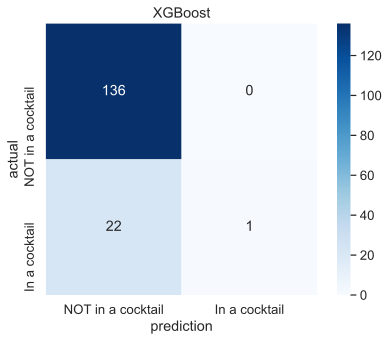

In [649]:
thresh = .2
make_confusion_matrix_custom(xgb, X_scaled_val, label_val, thresh, model_type="XGBoost")


In [650]:

compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-650-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


id                    name        name_scientific  \
326   332.0                 chervil  Anthriscus cerefolium   
936   969.0             almond milk                    NaN   
308   312.0              breadfruit     Artocarpus altilis   
168   169.0                     rye         Secale cereale   
689   712.0    milk (other mammals)                    NaN   
387   393.0                  jujube      Ziziphus zizyphus   
560   575.0                   wheat               Triticum   
753   779.0       nutritional drink                    NaN   
434   443.0     plains prickly pear     Opuntia macrorhiza   
435   444.0         french plantain     Musa X paradisiaca   
715   740.0           sweet custard                    NaN   
986  1019.0             white bread                    NaN   
206   207.0       arctic blackberry         Rubus arcticus   
821   851.0         vegetable juice                    NaN   
784   810.0          ice cream cone                    NaN   
862   893.0  milk and milk products                    NaN   
634   653.0                  toffee                    NaN   
179   180.0                tamarind      Tamarindus indica   
927   960.0       white grape juice                    NaN   
74     75.0         black crowberry        Empetrum nigrum   
226   227.0            summer grape       Vitis aestivalis   
193   194.0             lingonberry  Vaccinium vitis-idaea   
840   870.0               candy bar                    NaN   
980  1013.0                  pitaya     Hylocereus undatus   
208   209.0                bayberry                 Myrica   
982  1015.0              monk fruit   Siraitia grosvenorii   
722   748.0            hibiscus tea    Hibiscus sabbariffa   
204   205.0                    corn               Zea mays   
325   331.0               cherimoya       Annona cherimola   
218   219.0                 ginseng                  Panax   
183   184.0                  linden                  Tilia   
357   363.0              elderberry               Sambucus   
478   489.0                   spelt        Triticum spelta   
77     78.0               wax apple       Eugenia javanica   
642   662.0             chewing gum                    NaN   

                                           description   itis_id  \
326  Chervil (Anthriscus cerefolium), sometimes cal...   29587.0   
936  Almond milk is a plant milk manufactured from ...       NaN   
308  Breadfruit (Artocarpus altilis) is a species o...  184181.0   
168  Rye (Secale cereale) is a grass grown extensiv...   42090.0   
689  As an agricultural product, milk is extracted ...       NaN   
387  Ziziphus jujuba (from Greek ζίζυφον, zízyphon)...   28598.0   
560  Wheat (Triticum spp. ) is a cereal grain, orig...   42236.0   
753  An energy drink is a type of beverage containi...       NaN   
434  Opuntia macrorhiza Engelm. is a common and wid...   19718.0   
435  Musa × paradisiaca is the accepted name for th...   42391.0   
715  Custard is a variety of culinary preparations ...       NaN   
986  White bread typically refers to breads made fr...       NaN   
206  Rubus arcticus, the Arctic raspberry, (include...   24849.0   
821  Vegetable juice is a drink made primarily of b...       NaN   
784  An ice cream cone, poke or cornet is a dry, co...       NaN   
862  A dairy product is food produced from the milk...       NaN   
634  Toffee is a confection made by caramelizing su...       NaN   
179  Tamarind (Tamarindus indica) is a leguminous t...   26980.0   
927  White grape juice is typically manufactured fr...       NaN   
74   Empetrum nigrum is a species of crowberry know...   23743.0   
226  Vitis aestivalis (Summer Grape) is a species o...   28607.0   
193  Vaccinium vitis-idaea (lingonberry or cowberry...  505637.0   
840  A candy bar (called a chocolate bar in Austral...       NaN   
980   Pitaya or pitahaya is the fruit of several di...       NaN   
208  Myrica is a genus of about 35?50 species of sm...   19260.0   
982  Sir

In [651]:
false_pos.to_csv('data/XGBoost_cont_false_positives.csv')

In [652]:
cont_feature_columns = foods_df.iloc[:, foods_df.columns.get_loc('orig_food_common_name')+1: -1].columns
cont_feature_column_names = foods_df[cont_feature_columns].columns
cont_feature_column_names

Index(['(E)-2-HEPTENAL_in_Calyx', '(E)-2-HEXENAL_in_Calyx',
       '(Z)-3-HEXENOL_in_Calyx', '1,4-CINEOLE_in_Calyx',
       '1,8-CINEOLE_in_Calyx', '1-HEXANOL_in_Calyx',
       '2,2-DIMETHYL-HEXANAL_in_Calyx', '2-ETHYL-FURAN_in_Calyx',
       '2-PENTYL-FURAN_in_Calyx',
       '3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Fruit',
       ...
       'VIT-E_in_Sprout Seedling', 'ALLANTOIC-ACID_in_Sprout Seedling',
       'HOMOGENTISINIC-ACID_in_Sprout Seedling', 'PIPECOLIC-ACID_in_Stem',
       'NEOGLUCOBRASSICIN_in_Seed', 'TETRACOSANOIC-ACID_in_Seed Oil',
       'DIOSCIN_in_Root', 'ADENINE_in_Tuber', 'PHYTIN_in_Tuber',
       'SUGARS_in_Tuber'],
      dtype='object', length=15597)

In [653]:
im=pd.DataFrame({'importance':xgb.feature_importances_,'var':cont_feature_columns})
im=im.sort_values(by='importance',ascending=False)
im.head()

importance                     var
170    0.798669           IRON_in_Fruit
162    0.070301        CALCIUM_in_Fruit
750    0.044717     PHOSPHORUS_in_Fruit
29     0.043215  ASCORBIC-ACID_in_Fruit
75     0.041968             FAT_in_Seed

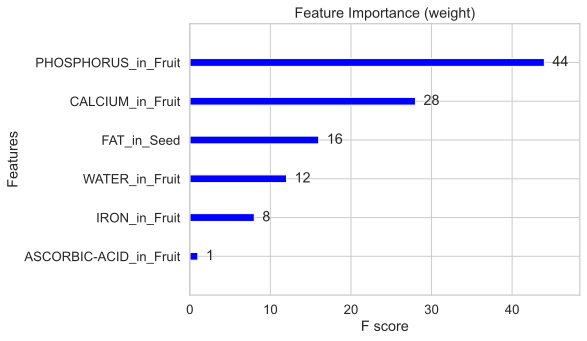

In [654]:
mapper = {'f{0}'.format(i): v for i, v in enumerate(cont_feature_column_names)}
#mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='weight').items()}
mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='weight').items()}
xgboost.plot_importance(mapped, color='blue', max_num_features=20, title='Feature Importance (weight)')
plt.savefig('graphs/xgb_weight.svg', bbox_inches='tight')

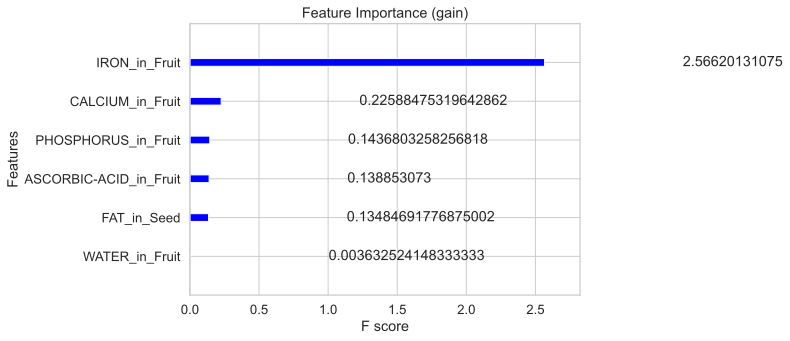

In [655]:
mapper = {'f{0}'.format(i): v for i, v in enumerate(cont_feature_column_names)}
mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='gain').items()}
xgboost.plot_importance(mapped, color='blue', max_num_features=20, title='Feature Importance (gain)')
plt.savefig('graphs/xgb_gain.svg', bbox_inches='tight')

In [656]:

foods_df.iloc[:, 24:40]

(E)-2-HEPTENAL_in_Calyx  (E)-2-HEXENAL_in_Calyx  (Z)-3-HEXENOL_in_Calyx  \
0                        NaN                     NaN                     NaN   
1                        NaN                     NaN                     NaN   
2                        NaN                     NaN                     NaN   
3                        NaN                     NaN                     NaN   
4                        NaN                     NaN                     NaN   
..                       ...                     ...                     ...   
987                      NaN                     NaN                     NaN   
988                      NaN                     NaN                     NaN   
989                      NaN                     NaN                     NaN   
990                      NaN                     NaN                     NaN   
991                      NaN                     NaN                     NaN   

     1,4-CINEOLE_in_Calyx  1,8-CINEOLE_in_Calyx  1-HEXANOL_in_Calyx  \
0                     NaN                   NaN                 NaN   
1                     NaN                   NaN                 NaN   
2                     NaN                   NaN                 NaN   
3                     NaN                   NaN                 NaN   
4                     NaN                   NaN                 NaN   
..                    ...                   ...                 ...   
987                   NaN                   NaN                 NaN   
988                   NaN                   NaN                 NaN   
989                   NaN                   NaN                 NaN   
990                   NaN                   NaN                 NaN   
991                   NaN                   NaN                 NaN   

     2,2-DIMETHYL-HEXANAL_in_Calyx  2-ETHYL-FURAN_in_Calyx  \
0                              NaN                     NaN   
1                              NaN                     NaN   
2                              NaN                     NaN   
3                              NaN                     NaN   
4                              NaN                     NaN   
..                             ...                     ...   
987                            NaN                     NaN   
988                            NaN                     NaN   
989                            NaN                     NaN   
990                            NaN                     NaN   
991                            NaN                     NaN   

     2-PENTYL-FURAN_in_Calyx  3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Fruit  \
0                        NaN                                          NaN   
1                        NaN                                          NaN   
2                        NaN                                          NaN   
3                        NaN                                          NaN   
4                        NaN                                          NaN   
..                       ...                                          ...   
987                      NaN                                          NaN   
988                      NaN                                          NaN   
989                      NaN                                          NaN   
990                      NaN                                          NaN   
991                      NaN                                          NaN   

     3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Leaf  \
0                                           NaN   
1                                           NaN   
2                                           NaN   
3                                           NaN   
4                                           NaN   
..                                          ...   
987                                         NaN   
988                                         NaN   
989                                         NaN   
990        

#### Logit coefficients

In [657]:

cont_feature_dict = dict(zip(cont_feature_column_names, *logit.coef_))
cont_coef_df = pd.DataFrame(pd.Series(cont_feature_dict).sort_values(ascending = False)).reset_index()
cont_coef_df.rename(columns ={'index':'Continuous features', 0: 'Coefficient'}, inplace = True)


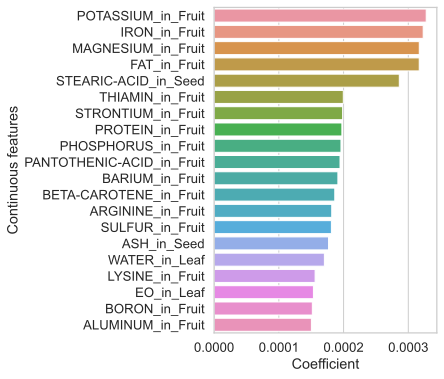

In [658]:
contributors = cont_coef_df[cont_coef_df['Coefficient'] > 0]
plt.rcParams['figure.figsize']=4,6
#plt.tight_layout(pad=3)
sns.barplot(data=contributors.head(20), x='Coefficient', y='Continuous features', ci=None)
plt.savefig('graphs/logit_cont_contributors.svg', bbox_inches='tight')

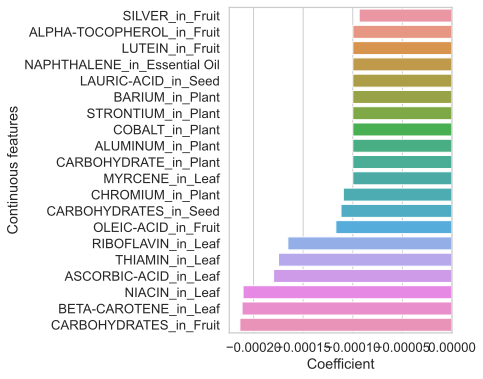

In [659]:
detractors = cont_coef_df[cont_coef_df['Coefficient'] < 0]
#fig = Figure()
plt.rcParams['figure.figsize']=4,6

sns.barplot(data=detractors.tail(20), x='Coefficient', y='Continuous features', ci=None)
plt.savefig('graphs/logit_cont_detractors.svg', bbox_inches='tight')

In [660]:
# all_coef = cont_coef_df
# #fig = Figure()
# plt.rcParams['figure.figsize']=4,6

# g =sns.barplot(data=all_coef , x='Coefficient', y='Continuous features', ci=None)
# g.set(ylabel=None)
# plt.savefig('graphs/logit_cont_all_coef.png', bbox_inches='tight')

### Log loss cross entropy

In [661]:
log_loss_report(['logit', 'knn', 'nb', 'd_tree', 'randomforest','xgb'], label_tr, X_scaled_tr, label_val, X_scaled_val )



Log-loss:	0.4113	0.4133		diff =	0.0020	logit

Log-loss:	0.8301	0.8639		diff =	0.0338	knn

Log-loss:	27.6201	29.7598		diff =	2.1397	nb

Log-loss:	0.3958	0.6049		diff =	0.2090	d_tree

Log-loss:	0.3923	0.6008		diff =	0.2085	randomforest

Log-loss:	0.3958	0.4038		diff =	0.0079	xgb



# PCA on 15000+ features

In [662]:
from sklearn.decomposition import PCA

In [663]:
#pca_ = PCA(n_components=200, random_state=2020)
pca_ = PCA(n_components=200)

pca_.fit(X_combo_tr)
X_combo_tr_pca = pca_.transform(X_combo_tr)

In [664]:
print('Variance explained by all principal components = ', sum(pca_.explained_variance_ratio_*100))

Variance explained by all principal components =  100.00000000000004


In [665]:
sns.set_style("whitegrid")
#plt.style.use('ggplot')

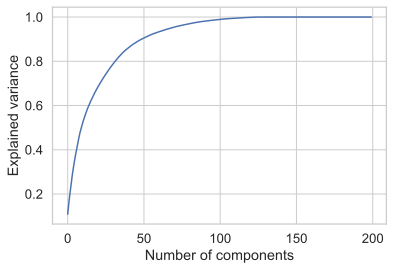

In [666]:
plt.rcParams['figure.figsize']=6,4
plt.plot(np.cumsum(pca_.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png', dpi=100)

In [667]:
components = 40

In [668]:
X_combo_tr_pca = X_combo_tr_pca[:, :components]

In [669]:
X_combo_val_pca = pca_.transform(X_combo_val)[:, :components]

In [670]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_combo_tr_pca, label_tr)




/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.0001, max_iter=10000)

In [671]:
select_df_columns = ['name','description','in_some_cocktail']

In [672]:
select_df_val = df_val[select_df_columns]

In [673]:
logit_combo_val_pca_predictions = logit.predict_proba(X_combo_val_pca)

In [674]:
logit_combo_val_pca_predictions_df = pd.DataFrame(logit_combo_val_pca_predictions)

In [675]:
X_combo_val_pca_df = pd.DataFrame(X_combo_val_pca[:,:3])

In [676]:
select_df_val.to_csv('data/'+'select_df_val.csv')
logit_combo_val_pca_predictions_df.to_csv('data/'+'logit_combo_val_pca_predictions_df.csv')
X_combo_val_pca_df.to_csv('data/'+'X_combo_val_pca_df.csv')

In [677]:
select_df_tr = df_tr[select_df_columns]
logit_combo_tr_pca_predictions = logit.predict_proba(X_combo_tr_pca)
logit_combo_tr_pca_predictions_df = pd.DataFrame(logit_combo_tr_pca_predictions)
X_combo_tr_pca_df = pd.DataFrame(X_combo_tr_pca[:,:3])

In [678]:
select_df_tr.to_csv('data/'+'select_df_tr.csv')
logit_combo_tr_pca_predictions_df.to_csv('data/'+'logit_combo_tr_pca_predictions_df.csv')
X_combo_tr_pca_df.to_csv('data/'+'X_combo_tr_pca_df.csv')

In [679]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_combo_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_combo_val_pca, label_val)))

The score for logistic regression is
Training:  85.65%
Validation set:  85.53%


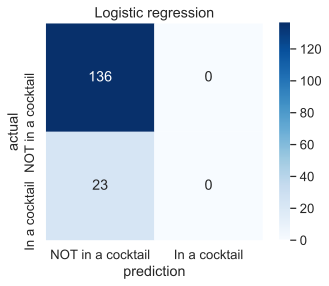

In [680]:
thresh = .2
make_confusion_matrix_custom(logit, X_combo_val_pca, label_val, thresh, model_type="Logistic regression")



In [681]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_combo_tr_pca, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_combo_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_combo_val_pca, label_val)))

The score for kNN is
Training:  91.17%
Validation set:  85.53%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


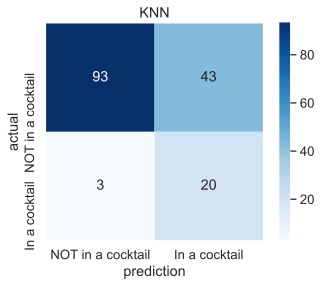

In [682]:
make_confusion_matrix_custom(knn, X_combo_val_pca, label_val, thresh, model_type="KNN")

In [683]:
label_predict = logit.predict(X_combo_val_pca)
f1_score(label_val, label_predict)

0.0

In [684]:
label_predict = (logit.predict_proba(X_combo_val_pca)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.0

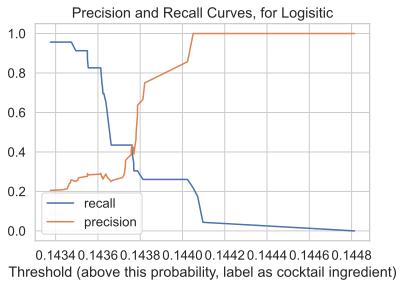

In [685]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_combo_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

In [686]:
label_predict = knn.predict(X_combo_val_pca)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.5000,   Recall: 0.3913


In [687]:
thresh = 0.1
label_predict = (knn.predict_proba(X_combo_val_pca)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.1
Precision: 0.3175,   Recall: 0.8696


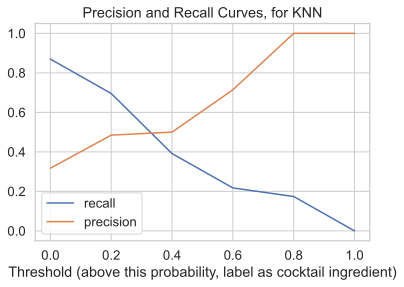

In [688]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_combo_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

In [689]:
label_predict = (knn.predict_proba(X_combo_val_pca)[:, 1] > 0.1)
f1_score(label_val, label_predict)

0.46511627906976744

In [690]:
fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_combo_val_pca)[:,1])

ROC AUC score, for Logistic =  0.7968350383631715


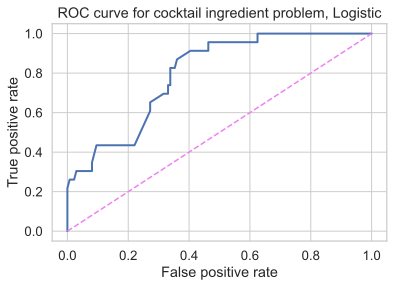

In [691]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_combo_val_pca)[:,1]))

In [692]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_combo_val_pca)[:,1])                                
                                

ROC AUC score, for KNN =  0.8393542199488491


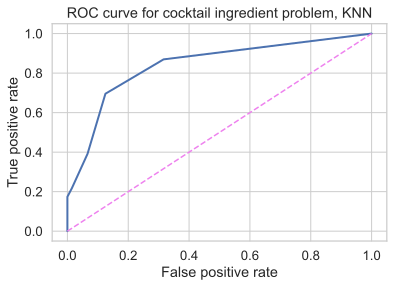

In [693]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_combo_val_pca)[:,1]))

### Log loss cross-entropy

In [694]:
log_loss_report(['logit', 'knn'], label_tr, X_combo_tr_pca, label_val, X_combo_val_pca)




Log-loss:	0.4111	0.4130		diff =	0.0020	logit

Log-loss:	0.3373	0.8695		diff =	0.5322	knn



### PCA on only the continuous features



In [695]:
X_scaled_tr= np.nan_to_num(X_scaled_tr)
X_scaled_val=np.nan_to_num(X_scaled_val)
X_scaled_test=np.nan_to_num(X_scaled_test)

In [696]:
#pca_ = PCA(n_components=components, random_state=2020)
pca_ = PCA(n_components=200)
pca_.fit(X_scaled_tr)
X_scaled_tr_pca = pca_.transform(X_scaled_tr)

In [697]:
print('Variance explained by all principal components = ', sum(pca_.explained_variance_ratio_*100))

Variance explained by all principal components =  100.00000000000001


In [698]:
plt.style.use('ggplot')
sns.set_style("whitegrid")

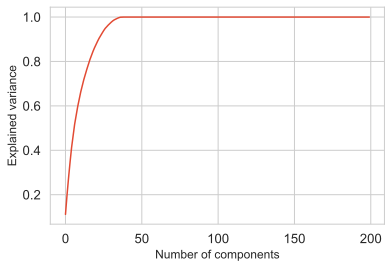

In [699]:
plt.plot(np.cumsum(pca_.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.savefig('elbow_plot.png', dpi=100)

In [700]:
components = 40

In [701]:
X_scaled_tr_pca = X_scaled_tr_pca[:, :components]

In [702]:
X_scaled_val_pca = pca_.transform(X_scaled_val)[:, :components]


In [703]:
X_scaled_test_pca = pca_.transform(X_scaled_test)[:, :components]

## Logistic

In [704]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_scaled_tr_pca, label_tr)

print("The score for Logistic is")
print("Training: {:6.2f}%".format(100*logit.score(X_scaled_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_scaled_val_pca, label_val)))

The score for Logistic is
Training:  85.65%
Validation set:  85.53%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [705]:
thresh = .2

In [706]:
label_predict = logit.predict(X_scaled_val_pca)> thresh

In [707]:
compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-707-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


Empty DataFrame
Columns: [id, name, name_scientific, description, itis_id, wikipedia_id, picture_file_name, picture_content_type, picture_file_size, picture_updated_at, legacy_id, food_group, food_subgroup, food_type, created_at, updated_at, creator_id, updater_id, export_to_afcdb, category, ncbi_taxonomy_id, export_to_foodb, public_id, orig_food_common_name, (E)-2-HEPTENAL_in_Calyx, (E)-2-HEXENAL_in_Calyx, (Z)-3-HEXENOL_in_Calyx, 1,4-CINEOLE_in_Calyx, 1,8-CINEOLE_in_Calyx, 1-HEXANOL_in_Calyx, 2,2-DIMETHYL-HEXANAL_in_Calyx, 2-ETHYL-FURAN_in_Calyx, 2-PENTYL-FURAN_in_Calyx, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Fruit, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Leaf, 3-METHYL-1-BUTANOL|ISOAMYL-ALCOHOL_in_Seed, 6,10,14-TRIMETHYL-2-PENTADECANONE_in_Calyx, ACETIC-ACID_in_Calyx, ACETIC-ACID_in_Fruit, ACETIC-ACID_in_Seed, ACIDS_in_Flower, ALPHA-FARNESENE_in_Calyx, ALPHA-TERPINEOL_in_Calyx, ALPHA-TERPINYL-ACETATE_in_Calyx, ALPHA-TERPINYL-ACETATE_in_Fruit, ALPHA-TERPINYL-ACETATE_in_Leaf, ALPHA-TERPINYL-ACETATE_in_Seed, ALPHA-TOCOPHEROL_in_Seed, ALUMINUM_in_Flower, ANISALDEHYDE_in_Fruit, ANISALDEHYDE_in_Leaf, ANTHOCYANINS_in_Calyx, ASCORBIC-ACID_in_Flower, ASCORBIC-ACID_in_Fruit, ASH_in_Flower, ASH_in_Leaf, ASPARTIC-ACID_in_Plant, BENZALDEHYDE_in_Fruit, BENZYL-ALCOHOL_in_Fruit, BENZYL-ALCOHOL_in_Leaf, BETA-CAROTENE_in_Flower, BETA-CAROTENE_in_Leaf, BETA-SITOSTEROL_in_Seed, BUTYRIC-ACID_in_Fruit, CALCIUM-OXALATE_in_Fruit, CALCIUM_in_Flower, CALCIUM_in_Leaf, CALCIUM_in_Seed, CAMPESTEROL_in_Seed, CAPRYLIC-ACID_in_Fruit, CAPRYLIC-ACID_in_Seed, CARBOHYDRATES_in_Flower, CARBOHYDRATES_in_Leaf, CARBOHYDRATES_in_Seed, CARYOPHYLLENE_in_Calyx, CELLULOSE_in_Seed, CHOLESTEROL_in_Seed, CHROMIUM_in_Flower, CITRIC-ACID_in_Flower, CITRIC-ACID_in_Fruit, CLEROSTEROL_in_Seed, COBALT_in_Flower, COPPER_in_Flower, CYANIDIN-3,5-DIGLUCOSIDE_in_Flower, CYANIDIN-3-GLUCOSIDE_in_Calyx, CYANIDIN-3-SAMBUBIOSIDE_in_Calyx, CYANIDIN-3-SAMBUBIOSIDE_in_Flower, DELPHINIDIN-3-GLUCOSIDE_in_Calyx, DELPHINIDIN_in_Calyx, DELPHININ_in_Flower, DELTA-5-AVENASTEROL_in_Seed, DELTA-TOCOPHEROL_in_Seed, ERGOSTEROL_in_Seed, ETHANOL_in_Fruit, ETHANOL_in_Leaf, ETHANOL_in_Seed, EUGENOL_in_Calyx, FAT_in_Flower, FAT_in_Leaf, FAT_in_Seed, ...]
Index: []

[0 rows x 15623 columns]

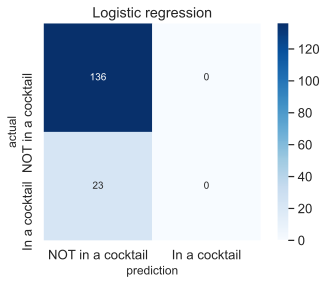

In [708]:
thresh=.17
make_confusion_matrix_custom(logit, X_scaled_val_pca, label_val, thresh, model_type="Logistic regression")


## KNN

In [709]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_scaled_tr_pca, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_scaled_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_scaled_val_pca, label_val)))

The score for kNN is
Training:  19.24%
Validation set:  28.93%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [710]:
thresh = .2

In [711]:
label_predict = knn.predict(X_scaled_val_pca)

In [712]:
compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-712-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


id             name            name_scientific  \
70    71.0  globe artichoke            Cynara scolymus   
114  115.0     bitter gourd        Momordica charantia   
285  287.0          alfalfa            Medicago sativa   
360  366.0    oregon yampah        Perideridia oregana   
807  836.0      wheat bread                        NaN   
..     ...              ...                        ...   
240  241.0      welsh onion          Allium fistulosum   
371  377.0          grouper                Epinephelus   
554  569.0          maitake           Grifola frondosa   
373  379.0          haddock   Melanogrammus aeglefinus   
185  186.0        fenugreek  Trigonella foenum-graecum   

                                           description   itis_id  \
70   The globe artichoke (Cynara cardunculus var. s...   37222.0   
114  Momordica charantia often called bitter melon,...   22399.0   
285  Alfalfa, Medicago sativa, also called lucerne,...  183623.0   
360  Perideridia oregana is a species of flowering ...   29811.0   
807  Brown bread is a designation often given to br...       NaN   
..                                                 ...       ...   
240  Allium fistulosum L. (Welsh onion, Japanese bu...  185463.0   
371  Groupers are fish of any of a number of genera...  167694.0   
554  Grifola frondosa is a polypore mushroom that g...       NaN   
373  The haddock (Melanogrammus aeglefinus) is a ma...  164744.0   
185  Fenugreek  (Trigonella foenum-graecum) is an a...  505590.0   

            wikipedia_id picture_file_name picture_content_type  \
70             Artichoke            71.jpg           image/jpeg   
114         Bitter melon           115.jpg           image/jpeg   
285              Alfalfa           287.jpg           image/jpeg   
360  Perideridia oregana           366.jpg           image/jpeg   
807          Wheat_bread           836.jpg           image/jpeg   
..                   ...               ...                  ...   
240          Welsh_onion           241.jpg           image/jpeg   
371              Grouper           377.jpg           image/jpeg   
554              Maitake           569.jpg           image/jpeg   
373              Haddock           379.jpg           image/jpeg   
185            Fenugreek           186.jpg           image/jpeg   

     picture_file_size       picture_updated_at  ...  \
70            287703.0  2012-04-23 10:27:37 UTC  ...   
114            72072.0  2012-04-20 09:39:26 UTC  ...   
285           145781.0  2012-04-20 09:42:00 UTC  ...   
360            24529.0  2012-04-20 09:40:33 UTC  ...   
807            52290.0  2012-04-20 09:43:44 UTC  ...   
..                 ...                      ...  ...   
240            15355.0  2012-04-20 09:33:35 UTC  ...   
371            62622.0  2012-04-20 09:30:40 UTC  ...   
554            67650.0  2012-04-20 09:42:40 UTC  ...   
373             5814.0  2012-04-20 09:31:17 UTC  ...   
185           149323.0  2012-04-20 09:44:26 UTC  ...   

     HOMOGENTISINIC-ACID_in_Sprout Seedling PIPECOLIC-ACID_in_Stem  \
70                                      NaN                    NaN   
114                                     NaN                    NaN   
285                                     NaN                    NaN   
360                                     NaN                    NaN   
807                                     NaN                    NaN   
..                                      ...                    ...   
240                                     NaN                    NaN   
371                                     NaN                    NaN   
554                                     NaN                    NaN   
373                                     NaN                    NaN   
185                                     NaN                    NaN   

    NEOGLUCOBRASSICIN_in_Seed TETRACOSANOIC-ACID_in_Seed Oil DIOSCIN_in_Root  \
70                        NaN                            NaN             NaN   
114            

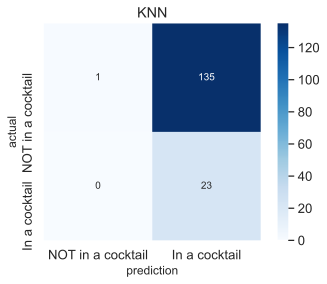

In [713]:
make_confusion_matrix_custom(knn, X_scaled_val_pca, label_val, thresh, model_type="KNN")

### Naive Bayes

In [714]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
nb = GaussianNB()

In [715]:
nb.fit(X_scaled_tr_pca, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*nb.score(X_scaled_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*nb.score(X_scaled_val_pca, label_val)))

The score for kNN is
Training:  19.87%
Validation set:  15.72%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Logistic 

In [716]:
label_predict = logit.predict(X_scaled_val_pca)
f1_score(label_val, label_predict)

0.0

In [717]:
label_predict = (logit.predict_proba(X_scaled_val_pca)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.0

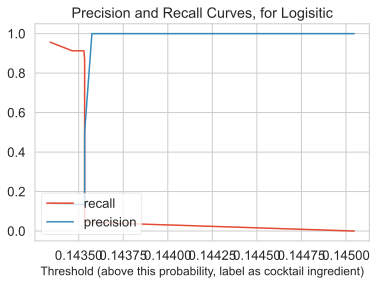

In [718]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_scaled_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

In [719]:
label_predict = knn.predict(X_scaled_val_pca)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.1371,   Recall: 0.7391


In [720]:
thresh = 0.2
label_predict = (knn.predict_proba(X_scaled_val_pca)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.2
Precision: 0.1355,   Recall: 0.9130


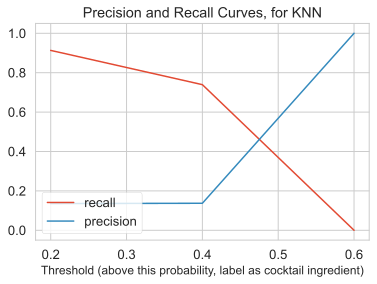

In [721]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_scaled_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

In [722]:
label_predict = (knn.predict_proba(X_scaled_val_pca)[:, 1] > 0.1)
f1_score(label_val, label_predict)

0.2541436464088398

In [723]:
fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_scaled_val_pca)[:,1])

ROC AUC score, for Logistic =  0.4641943734015345


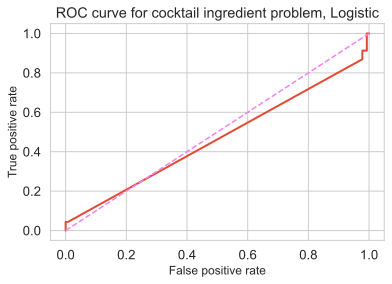

In [724]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_scaled_val_pca)[:,1]))

In [725]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_scaled_val_pca)[:,1])                                
                                

ROC AUC score, for KNN =  0.4691496163682864


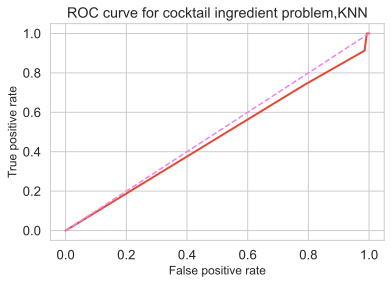

In [726]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem,KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_scaled_val_pca)[:,1]))

### Log loss cross entropy

In [727]:
log_loss_report(['logit', 'knn','nb'], label_tr, X_scaled_tr_pca, label_val, X_scaled_val_pca)

# print("Logistic")
# print("Log-loss on logit: {:6.4f}".format(log_loss(label_val, logit.predict_proba(X_scaled_val_pca)[:,1])))
# print("KNN")
# print("Log-loss on logit: {:6.4f}".format(log_loss(label_val, knn.predict_proba(X_scaled_val_pca)[:, 1])))



Log-loss:	0.4113	0.4133		diff =	0.0020	logit

Log-loss:	0.8275	0.8027		diff =	-0.0248	knn

Log-loss:	18.9232	20.0229		diff =	1.0997	nb



### Combine categorical with continuous PCA

In [728]:
#X_combined_tr_pca  = np.concatenate( X_cat X_scaled_tr_pca 

In [729]:
X_combined_tr_pca = pd.concat([pd.DataFrame(X_cat_tr), pd.DataFrame(X_scaled_tr_pca)], axis='columns')

X_combined_val_pca = pd.concat([pd.DataFrame(X_cat_val), pd.DataFrame(X_scaled_val_pca)], axis='columns')

X_combined_test_pca = pd.concat([pd.DataFrame(X_cat_test), pd.DataFrame(X_scaled_test_pca)], axis='columns')

#### Logistic 

In [730]:
logit = LogisticRegression(C = .0001,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_combined_tr_pca, label_tr)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression(C=0.0001, max_iter=10000)

In [731]:
X_combined_tr_pca.shape

(634, 149)

In [732]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_combined_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_combined_val_pca, label_val)))

The score for logistic regression is
Training:  85.65%
Validation set:  85.53%


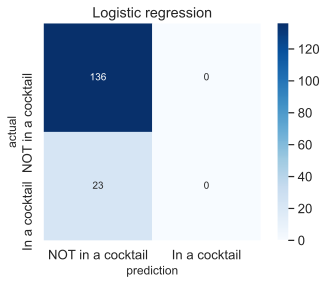

In [733]:
thresh = .2
make_confusion_matrix_custom(logit, X_combined_val_pca, label_val, thresh, model_type="Logistic regression")


#### KNN

In [734]:
knn = KNeighborsClassifier(n_neighbors=5) # set number of neighbors to 20
knn.fit(X_combined_tr_pca, label_tr)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_combined_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_combined_val_pca, label_val)))

The score for kNN is
Training:  91.17%
Validation set:  86.79%


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


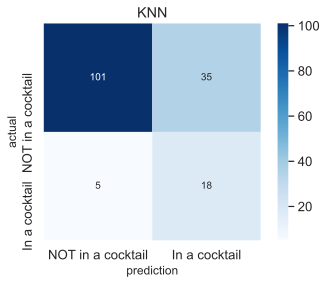

In [735]:
make_confusion_matrix_custom(knn, X_combined_val_pca, label_val, thresh, model_type="KNN")

#### XGBoost

In [736]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, confusion_matrix

Rename columns to avoid repeated column names that arose

In [737]:
X_combined_tr_pca.columns[100:]

Int64Index([100, 101, 102, 103, 104, 105, 106, 107, 108,   0,   1,   2,   3,
              4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,
             17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,
             30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
           dtype='int64')

In [738]:
num_cat_features = len(ohe_column_names)

In [739]:
pca_column_numbering = ['pca_' + str(n) for n in range(components)]
cat_column_numbering = ['f'+str(n) for n in range(num_cat_features)]
feature_column_names = cat_column_numbering + pca_column_numbering
len(feature_column_names) 

149

In [740]:
type(X_combined_tr_pca)

pandas.core.frame.DataFrame

In [741]:
X_combined_tr_pca.columns = feature_column_names 
X_combined_tr_pca.columns

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'pca_30', 'pca_31', 'pca_32', 'pca_33', 'pca_34', 'pca_35', 'pca_36',
       'pca_37', 'pca_38', 'pca_39'],
      dtype='object', length=149)

In [742]:
X_combined_val_pca.columns = feature_column_names 
X_combined_test_pca.columns = feature_column_names 


In [743]:
X_combined_test_pca.columns 

Index(['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'pca_30', 'pca_31', 'pca_32', 'pca_33', 'pca_34', 'pca_35', 'pca_36',
       'pca_37', 'pca_38', 'pca_39'],
      dtype='object', length=149)

 fit **XGBoost**

**** Note: it was necessary to _decrease_ the `learning_rate` and _increase_ the `min_child_weight` to combat overfitting

In [744]:

#clf = XGBClassifier()
xgb = XGBClassifier(learning_rate=0.050000012, min_child_weight=25 )
xgb.fit(X_combined_tr_pca, label_tr)

[16:27:12] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.050000012, max_delta_step=0, max_depth=6,
              min_child_weight=25, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [745]:
label_pred = xgb.predict(X_combined_val_pca)
accuracy = accuracy_score(label_val, label_pred)
print(f'XGBoost Model Accuracy: {round(accuracy, 4)*100}')

XGBoost Model Accuracy: 85.53


In [746]:
print("The score for XGBoost is")

print("Training: {:6.2f}%".format(100*xgb.score(X_combined_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*xgb.score(X_combined_val_pca, label_val)))

The score for XGBoost is
Training:  85.65%
Validation set:  85.53%


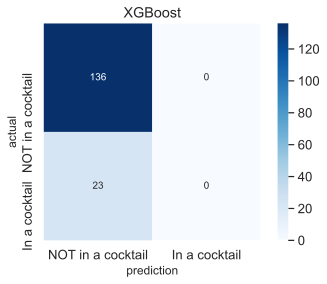

In [747]:
thresh = .4
make_confusion_matrix_custom(xgb, X_combined_val_pca, label_val, thresh, model_type="XGBoost")


In [748]:

compare = df_val
df_val['predicted'] = label_predict
misclassified = df_val[df_val['in_some_cocktail']!=df_val['predicted']]
false_pos = misclassified[misclassified['predicted'] == True]
false_pos

<ipython-input-748-40c5ff02703a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_val['predicted'] = label_predict


id             name            name_scientific  \
70    71.0  globe artichoke            Cynara scolymus   
114  115.0     bitter gourd        Momordica charantia   
285  287.0          alfalfa            Medicago sativa   
360  366.0    oregon yampah        Perideridia oregana   
810  839.0     potato bread                        NaN   
..     ...              ...                        ...   
642  662.0      chewing gum                        NaN   
371  377.0          grouper                Epinephelus   
554  569.0          maitake           Grifola frondosa   
373  379.0          haddock   Melanogrammus aeglefinus   
185  186.0        fenugreek  Trigonella foenum-graecum   

                                           description   itis_id  \
70   The globe artichoke (Cynara cardunculus var. s...   37222.0   
114  Momordica charantia often called bitter melon,...   22399.0   
285  Alfalfa, Medicago sativa, also called lucerne,...  183623.0   
360  Perideridia oregana is a species of flowering ...   29811.0   
810  Potato bread is a form of bread in which potat...       NaN   
..                                                 ...       ...   
642  Chewing gum is a soft, cohesive substance inte...       NaN   
371  Groupers are fish of any of a number of genera...  167694.0   
554  Grifola frondosa is a polypore mushroom that g...       NaN   
373  The haddock (Melanogrammus aeglefinus) is a ma...  164744.0   
185  Fenugreek  (Trigonella foenum-graecum) is an a...  505590.0   

            wikipedia_id picture_file_name picture_content_type  \
70             Artichoke            71.jpg           image/jpeg   
114         Bitter melon           115.jpg           image/jpeg   
285              Alfalfa           287.jpg           image/jpeg   
360  Perideridia oregana           366.jpg           image/jpeg   
810         Potato_bread           839.jpg           image/jpeg   
..                   ...               ...                  ...   
642          Chewing_gum           662.jpg           image/jpeg   
371              Grouper           377.jpg           image/jpeg   
554              Maitake           569.jpg           image/jpeg   
373              Haddock           379.jpg           image/jpeg   
185            Fenugreek           186.jpg           image/jpeg   

     picture_file_size       picture_updated_at  ...  \
70            287703.0  2012-04-23 10:27:37 UTC  ...   
114            72072.0  2012-04-20 09:39:26 UTC  ...   
285           145781.0  2012-04-20 09:42:00 UTC  ...   
360            24529.0  2012-04-20 09:40:33 UTC  ...   
810           125545.0  2012-04-20 09:39:21 UTC  ...   
..                 ...                      ...  ...   
642           105643.0  2012-04-20 09:38:17 UTC  ...   
371            62622.0  2012-04-20 09:30:40 UTC  ...   
554            67650.0  2012-04-20 09:42:40 UTC  ...   
373             5814.0  2012-04-20 09:31:17 UTC  ...   
185           149323.0  2012-04-20 09:44:26 UTC  ...   

     HOMOGENTISINIC-ACID_in_Sprout Seedling PIPECOLIC-ACID_in_Stem  \
70                                      NaN                    NaN   
114                                     NaN                    NaN   
285                                     NaN                    NaN   
360                                     NaN                    NaN   
810                                     NaN                    NaN   
..                                      ...                    ...   
642                                     NaN                    NaN   
371                                     NaN                    NaN   
554                                     NaN                    NaN   
373                                     NaN                    NaN   
185                                     NaN                    NaN   

    NEOGLUCOBRASSICIN_in_Seed TETRACOSANOIC-ACID_in_Seed Oil DIOSCIN_in_Root  \
70                        NaN                            NaN             NaN   
114            

In [749]:
false_pos.to_csv('data/XGBoost_cat_cont_false_positives.csv')

#### SVC (Support Vector Machines)

In [750]:
from sklearn.svm import LinearSVC, SVC

In [751]:
svt_clf = SVC().fit(np.array(X_combined_tr_pca), np.array(label_tr))

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [752]:
label_pred = svt_clf.predict(X_combined_val_pca)
accuracy = accuracy_score(label_val, label_pred)
print(f'SVctM Model Accuracy: {round(accuracy, 4)*100}')

SVctM Model Accuracy: 87.42


In [753]:
print("The score for SVCtM is")

print("Training: {:6.2f}%".format(100*svt_clf.score(X_combined_tr_pca, label_tr)))
print("Validation set: {:6.2f}%".format(100*svt_clf.score(X_combined_val_pca, label_val)))

The score for SVCtM is
Training:  91.32%
Validation set:  87.42%


In [754]:
# thresh = .2
# make_confusion_matrix_custom(svt_clf, X_combined_val_pca, label_val, thresh, model_type="SVCt")


### Logistic

In [755]:
label_predict = logit.predict(X_combined_val_pca)
f1_score(label_val, label_predict)

0.0

In [756]:
label_predict = (logit.predict_proba(X_combined_val_pca)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.0

In [757]:
label_predict = logit.predict(X_combined_val_pca)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))



Default threshold:
Precision: 0.0000,   Recall: 0.0000


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [758]:
thresh = 0.2
label_predict = (logit.predict_proba(X_combined_val_pca)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.2
Precision: 0.0000,   Recall: 0.0000


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


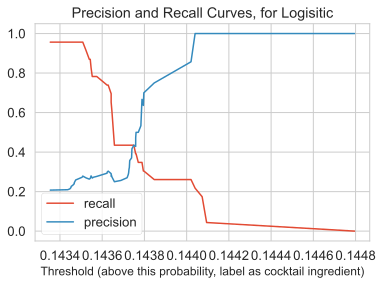

In [759]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(X_combined_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logisitic');

### KNN

In [760]:
label_predict = knn.predict(X_combined_val_pca)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Default threshold:
Precision: 0.5714,   Recall: 0.3478


In [761]:
thresh = 0.1
label_predict = (knn.predict_proba(X_combined_val_pca)[:,1] > thresh)
print("Threshold: ", thresh)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(label_val, label_predict), 
                                                     recall_score(label_val, label_predict)))

Threshold:  0.1
Precision: 0.3396,   Recall: 0.7826


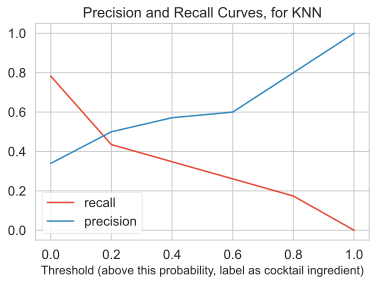

In [762]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(X_combined_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

### XGBoost

In [763]:
label_predict = xgb.predict(X_combined_val_pca)
f1_score(label_val, label_predict)


0.0

In [764]:
label_predict = (xgb.predict_proba(X_combined_val_pca)[:, 1] > 0.2)
f1_score(label_val, label_predict)

0.2857142857142857

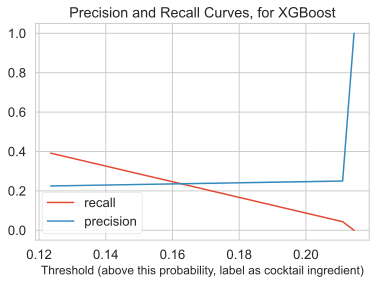

In [765]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, xgb.predict_proba(X_combined_val_pca)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for XGBoost');

### SVct M

In [766]:
X_combined_val_pca.shape

(159, 149)

In [767]:
# label_predict = svm.predict(np.array(X_combined_val_pca))
# f1_score(np.array(label_val), label_predict)

In [768]:
# label_predict = (svm.predict_proba(X_combined_val_pca)[:, 1] > 0.2)
# f1_score(label_val, label_predict)

In [769]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

# precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, svm.predict_proba(X_combined_val_pca)[:,1] )

# plt.figure(dpi=80)
# plt.plot(threshold_curve, recall_curve[1:], label='recall')
# plt.plot(threshold_curve, precision_curve[1:],label='precision')
# plt.legend(loc='lower left')
# plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
# plt.title('Precision and Recall Curves, for XGBoost');

### Logistic ROC

In [770]:
fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_combined_val_pca)[:,1])

ROC AUC score, for Logistic =  0.8019501278772379


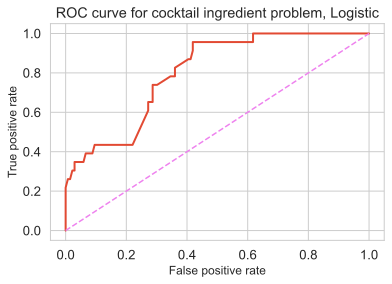

In [771]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_combined_val_pca)[:,1]))

### KNN

In [772]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_combined_val_pca)[:,1])      

ROC AUC score, for Logistic =  0.7952365728900256


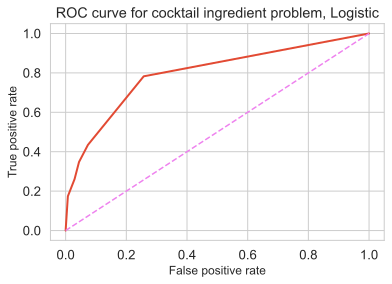

In [773]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, knn.predict_proba(X_combined_val_pca)[:,1]))

### XGBoost

In [774]:
fpr, tpr, thresholds = roc_curve(label_val, xgb.predict_proba(X_combined_val_pca)[:,1])

ROC AUC score, for XGBoost =  0.6360294117647058


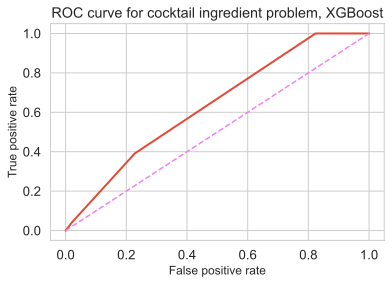

In [775]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, XGBoost');
print("ROC AUC score, for XGBoost = ", roc_auc_score(label_val, xgb.predict_proba(X_combined_val_pca)[:,1]))

### Log loss cross entropy

In [776]:
log_loss_report(['logit', 'knn','xgb'], label_tr, X_combined_tr_pca, label_val, X_combined_val_pca)# fpr, tpr, thresholds = roc_curve(label_val, svm.predict_proba(X_combined_val_pca)[:,1])



Log-loss:	0.4111	0.4130		diff =	0.0020	logit

Log-loss:	0.7044	1.4949		diff =	0.7905	knn

Log-loss:	0.4007	0.4024		diff =	0.0017	xgb



# Oversampling

In [777]:
# Now add some random oversampling of the minority classes
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=0)
X_resampled, label_resampled = ros.fit_sample(np.array(X_combined_tr_pca),np.array(label_tr))

In [778]:
# Yay, balanced classes!
Counter(label_resampled)

Counter({0: 543, 1: 543})

In [779]:
#X_resampled = pd.DataFrame(X_resampled)
#X_resampled.columns = feature_column_names 

### Logistic

In [780]:
logit = LogisticRegression(C = .0003,max_iter=10000)  # C = regularization strength; smaller numbers are stronger
logit.fit(X_resampled, label_resampled)


LogisticRegression(C=0.0003, max_iter=10000)

In [781]:
X_resampled.shape

(1086, 149)

In [782]:
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_resampled, label_resampled)))
print("Validation set: {:6.2f}%".format(100*logit.score(X_combined_val_pca, label_val)))


The score for logistic regression is
Training:  67.03%
Validation set:  71.70%


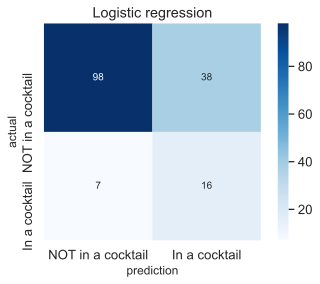

In [783]:
thresh = .5
make_confusion_matrix_custom(logit, X_combined_val_pca, label_val, thresh, model_type="Logistic regression")


### KNN

In [784]:
knn = KNeighborsClassifier(n_neighbors=8) # set number of neighbors to 20
knn.fit(X_resampled, label_resampled)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_resampled, label_resampled)))
print("Validation set: {:6.2f}%".format(100*knn.score(X_combined_val_pca, label_val)))

The score for kNN is
Training:  83.15%
Validation set:  80.50%


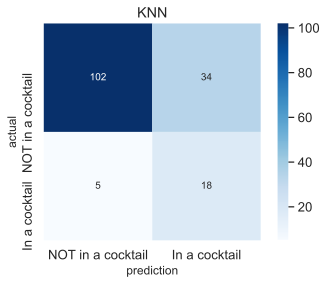

In [785]:
thresh = .5
make_confusion_matrix_custom(knn, X_combined_val_pca, label_val, thresh, model_type="KNN")



### XGBoost

In [786]:
#clf = XGBClassifier().fit(X_resampled, label_resampled)
xgb= XGBClassifier(learning_rate=0.001000012, min_child_weight=35 ).fit(X_resampled, label_resampled)
#clf = XGBClassifier(learning_rate=0.1000012, min_child_weight=17 ).fit(X_resampled, label_resampled)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:27:16] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [787]:
#X_combined_val_pca.columns 

In [788]:
label_pred = xgb.predict(np.array(X_combined_val_pca))
accuracy = accuracy_score(label_val, label_pred)

In [789]:
print(f'XGBoost Model Accuracy: {round(accuracy, 4)*100}')

print("The score for XGBoost is")

print("Training: {:6.2f}%".format(100*xgb.score(np.array(X_resampled), label_resampled)))
print("Validation set: {:6.2f}%".format(100*xgb.score(np.array(X_combined_val_pca), label_val)))


XGBoost Model Accuracy: 77.99000000000001
The score for XGBoost is
Training:  70.26%
Validation set:  77.99%


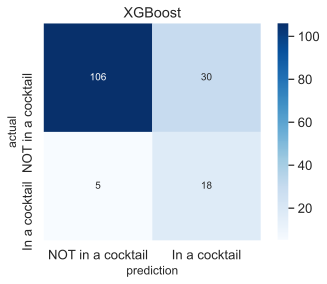

In [790]:
thresh = .5
make_confusion_matrix_custom(xgb, X_combined_val_pca, label_val, thresh, model_type="XGBoost")


### Logistic

In [791]:
label_predict = logit.predict(np.array(X_combined_val_pca))
f1_score(label_val, label_predict)


0.41558441558441556

In [792]:
label_predict = (logit.predict_proba(np.array(X_combined_val_pca))[:, 1] > 0.5)
f1_score(label_val, label_predict)

0.41558441558441556

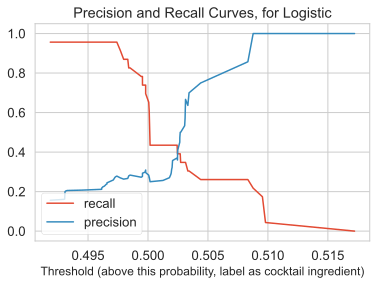

In [793]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, logit.predict_proba(np.array(X_combined_val_pca))[:,1] )
                                                                       
plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for Logistic');

### KNN

In [794]:
label_predict = knn.predict(np.array(X_combined_val_pca))
f1_score(label_val, label_predict)


0.507936507936508

In [795]:
label_predict = (knn.predict_proba(np.array(X_combined_val_pca))[:, 1] > 0.5)
f1_score(label_val, label_predict)

0.507936507936508

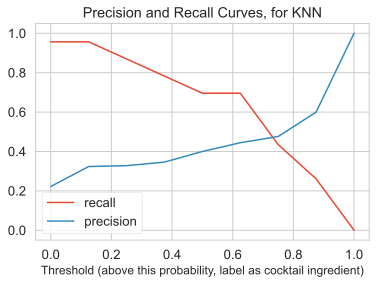

In [796]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, knn.predict_proba(np.array(X_combined_val_pca))[:,1] )
                                                                       
plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for KNN');

### XGBoost

In [797]:
label_predict = xgb.predict(np.array(X_combined_val_pca))
f1_score(label_val, label_predict)


0.5070422535211269

In [798]:
label_predict = (xgb.predict_proba(np.array(X_combined_val_pca))[:, 1] > 0.3)
f1_score(label_val, label_predict)


0.25274725274725274

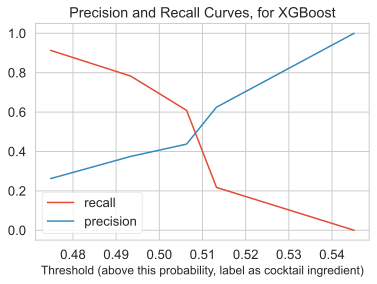

In [799]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(label_val, xgb.predict_proba(np.array(X_combined_val_pca))[:,1] )
                                                                       
plt.figure(dpi=80)
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as cocktail ingredient)');
plt.title('Precision and Recall Curves, for XGBoost');

### Logistic

In [800]:
fpr, tpr, thresholds = roc_curve(label_val, logit.predict_proba(X_combined_val_pca)[:,1])

ROC AUC score, for Logistic =  0.7901214833759591


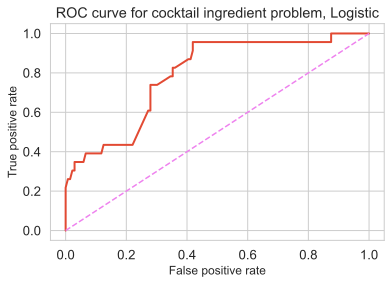

In [801]:


plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, Logistic');
print("ROC AUC score, for Logistic = ", roc_auc_score(label_val, logit.predict_proba(X_combined_val_pca)[:,1]))

### KNN

In [802]:
fpr, tpr, thresholds = roc_curve(label_val, knn.predict_proba(X_combined_val_pca)[:,1])

ROC AUC score, for KNN =  0.8524616368286445


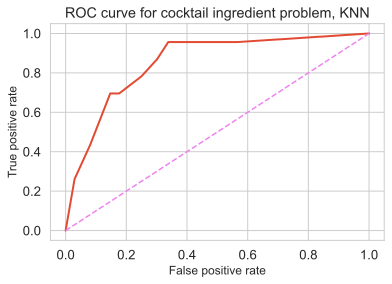

In [803]:

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, KNN');
print("ROC AUC score, for KNN = ", roc_auc_score(label_val, knn.predict_proba(X_combined_val_pca)[:,1]))

In [804]:
sns.set_style("whitegrid")

### XGBoost

In [805]:
fpr, tpr, thresholds = roc_curve(label_val, xgb.predict_proba(X_combined_val_pca)[:,1])

ROC AUC score, for XGBoost =  0.8316815856777494


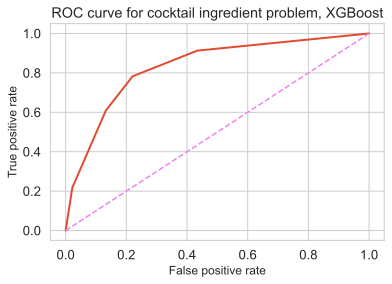

In [806]:

plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for cocktail ingredient problem, XGBoost');
print("ROC AUC score, for XGBoost = ", roc_auc_score(label_val, xgb.predict_proba(X_combined_val_pca)[:,1]))

In [807]:
ohe_column_names_list = list(ohe_column_names)
ohe_column_names_list = [w.replace('x1_Type 1', 'x1_Type 2 (Unprocessed food)') for w in ohe_column_names_list]
ohe_column_names_list = [w.replace('x1_Type 2', 'x1_Type 2 (Processed food)') for w in ohe_column_names_list]
ohe_column_names_list = [w.replace('x0_', '') for w in ohe_column_names_list]
ohe_column_names_list = [w.replace('x1_', '') for w in ohe_column_names_list]
ohe_column_names_list = [w.replace('x2_', '') for w in ohe_column_names_list]

                         
                         

In [808]:

all_feature_names = ohe_column_names_list
all_feature_names.extend(list(cont_feature_column_names))
all_feature_names

['Animal foods',
 'Aquatic foods',
 'Baking goods',
 'Beverages',
 'Cereals and cereal products',
 'Cocoa and cocoa products',
 'Coffee and coffee products',
 'Confectioneries',
 'Dishes',
 'Eggs',
 'Fats and oils',
 'Fruits',
 'Gourds',
 'Herbs and Spices',
 'Herbs and spices',
 'Milk and milk products',
 'Nuts',
 'Pulses',
 'Snack foods',
 'Soy',
 'Teas',
 'Vegetables',
 'Alcoholic beverages',
 'American cuisine',
 'Animal fats',
 'Asian cuisine',
 'Baking goods',
 'Beans',
 'Berries',
 'Beverages',
 'Bovines',
 'Bread products',
 'Candies',
 'Cereal products',
 'Cereals',
 'Cetaceans',
 'Citrus',
 'Cocoa',
 'Cocoa and cocoa products',
 'Cocoa products',
 'Coffee',
 'Condiments',
 'Crustaceans',
 'Desserts',
 'Distilled beverages',
 'Doughs',
 'Dressings',
 'Drupes',
 'Eggs',
 'Fats and oils',
 'Fermented beverages',
 'Fermented milk products',
 'Fermented milks',
 'Fishes',
 'Flat breads',
 'Fortified wines',
 'Frozen desserts',
 'Fruit products',
 'Fruits',
 'Gourds',
 'Ground meat

In [809]:
sns.set_style("whitegrid")

<AxesSubplot:title={'center':'Feature Importance (weight)'}, xlabel='F score', ylabel='Features'>

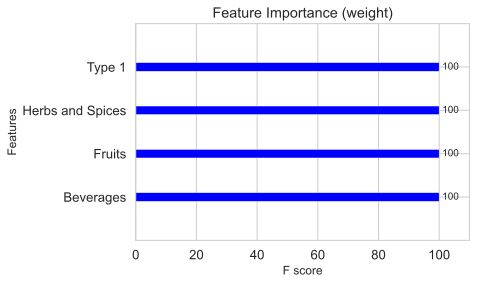

In [810]:
mapper = {'f{0}'.format(i): v for i, v in enumerate(all_feature_names)}
mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='weight').items()}
xgboost.plot_importance(mapped, color='blue', max_num_features=20, title='Feature Importance (weight)')

<AxesSubplot:title={'center':'Feature Importance (gain)'}, xlabel='F score', ylabel='Features'>

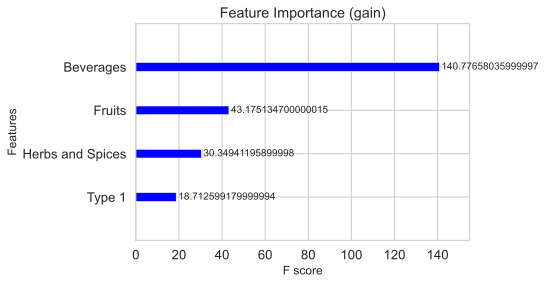

In [811]:
mapper = {'f{0}'.format(i): v for i, v in enumerate(all_feature_names)}
mapped = {mapper[k]: v for k, v in xgb.get_booster().get_score(importance_type='gain').items()}
xgboost.plot_importance(mapped, color='blue', max_num_features=20, title = 'Feature Importance (gain)')

In [812]:
# def log_loss_report(model_names, lab_tr, X_tr, lab_val, X_val):
#     print('\n')
#     for m in model_names:
#         tr_log_loss =  log_loss(lab_tr,  eval(m).predict_proba(X_tr))
#         val_log_loss = log_loss(lab_val, eval(m).predict_proba(X_val))
#         diff = val_log_loss - tr_log_loss 
#         print("Log-loss: {0:6.4f}  {1:6.4f}  diff=  {2:6.4f}    {3}\n".format(tr_log_loss, val_log_loss, diff, m))


In [813]:
log_loss_report(['logit','knn','xgb'],label_tr, X_combined_tr_pca, label_val, X_combined_val_pca  )




Log-loss:	0.6875	0.6870		diff =	-0.0005	logit

Log-loss:	0.6493	1.4329		diff =	0.7836	knn

Log-loss:	0.6713	0.6686		diff =	-0.0027	xgb



## SVct m

In [814]:
# thresh = .2
# make_confusion_matrix_custom(svt_clf, X_combined_val_pca, label_val, thresh, model_type="SVCt")